# <center>Script base - relatório unificado

## Importações

In [1]:
# Importando as bibliotecas utilizadas
import os # trabalhar com arquivos e diretórios
import pandas as pd  # daframes
import numpy as np  # operações com dataframes
import copy  # copiar um dataframe mudando a alocação na memória
import json  # gerar/importar arquivos com informações entre os scripts
from datetime import datetime, timedelta
import copy

import matplotlib.pyplot as plt

In [2]:
# Absolute path para o diretório atual
dir_atual = os.getcwd()
# Absolute path para o diretório irmão onde os arquivos serão lidos
dir_cleaned_data = os.path.abspath(os.path.join(dir_atual, 'cleaned_data'))
dir_raw_data = os.path.abspath(os.path.join(dir_atual, 'raw_data'))
print(dir_atual)
print(dir_cleaned_data)
print(dir_raw_data)

C:\Users\d850398\Documents\GitHub\relatorio_unificado
C:\Users\d850398\Documents\GitHub\relatorio_unificado\cleaned_data
C:\Users\d850398\Documents\GitHub\relatorio_unificado\raw_data


In [3]:
# Teste - deve retornar informações sobre uma das tabelas csv do repositório
for file in os.listdir(dir_cleaned_data):
    print(file)

ad_comuniqueses.csv
ad_despachos.csv
ad_principal.csv
portal_comuniqueses.csv
portal_despachos.csv
sissel_comuniqueses.csv
sissel_despachos.csv
slce_comuniqueses.csv
slce_despachos.csv
slce_principal.csv


## Leitura dos dados

### Aprova Digital

In [4]:
# Tabela de processos
ad_main = pd.read_csv(f'{dir_cleaned_data}/ad_principal.csv', encoding='latin-1', sep=';')
ad_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30156 entries, 0 to 30155
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   n_processo     30156 non-null  object
 1   data_autuacao  30147 non-null  object
 2   assunto        30156 non-null  object
 3   coord_atual    30156 non-null  object
 4   status         30156 non-null  object
 5   data_extracao  30156 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [5]:
# Tabela de despachos
ad_despachos = pd.read_csv(f'{dir_cleaned_data}/ad_despachos.csv', encoding='latin-1', sep=';')
ad_despachos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   n_processo      20279 non-null    object
 1   assunto         20279 non-null    object
 2   despacho        20279 non-null    object
 3   data_despacho   20279 non-null    object
 4   coord_despacho  1044400 non-null  object
 5   quem_despachou  20279 non-null    object
 6   data_extracao   20279 non-null    object
dtypes: object(7)
memory usage: 56.0+ MB


C:\Users\d850398\AppData\Local\Temp\ipykernel_33332\3338407183.py:2: DtypeWarning: Columns (0,1,2,3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  ad_despachos = pd.read_csv(f'{dir_cleaned_data}/ad_despachos.csv', encoding='latin-1', sep=';')


In [6]:
# Tabela de comuniqueses
ad_comuniqueses = pd.read_csv(f'{dir_cleaned_data}/ad_comuniqueses.csv', encoding='latin-1', sep=';')
ad_comuniqueses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27121 entries, 0 to 27120
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   n_processo         27121 non-null  object
 1   data_comuniquese   27121 non-null  object
 2   coord_comuniquese  26120 non-null  object
 3   quem_comunicou     27121 non-null  object
dtypes: object(4)
memory usage: 847.7+ KB


In [7]:
# Processamento extra - ADICIONAR NO ARQUIVO DE LIMPEZA
# Criando colunas para valores de coordenadoria e divisão
ad_despachos['coord'] = ad_despachos['coord_despacho'].apply(lambda x: str(x).split('/')[1] if '/' in str(x) else None)
ad_despachos['divisao'] = ad_despachos['coord_despacho'].apply(lambda x: str(x).split('/')[-1] if '/' in str(x) else None)
ad_comuniqueses['coord'] = ad_comuniqueses['coord_comuniquese'].apply(lambda x: str(x).split('/')[1] if '/' in str(x) else None)

In [8]:
# Acertando os meses de CAEPP - inserindo dados falsos para acertar os meses - DESPACHOS
fake_def = pd.DataFrame({'n_processo': None , 'assunto': None, 'despacho': 'Processo Deferido', 'data_despacho': '07/12/2018 20:18:43', 'coor_despacho': None, 
                 'quem_despachou': None, 'data_extracao': None, 'coord': 'CAEPP', 'divisao': 'CAEPP'}, index=[1])
fake_indef = pd.DataFrame({'n_processo': None , 'assunto': None, 'despacho': 'Processo Indeferido', 'data_despacho': '07/12/2018 20:19:43', 'coor_despacho': None, 
                 'quem_despachou': None, 'data_extracao': None, 'coord': 'CAEPP', 'divisao': 'CAEPP'}, index=[2])
fake_encerrado = pd.DataFrame({'n_processo': None , 'assunto': None, 'despacho': 'Processo Indeferido e Encerrado', 'data_despacho': datetime.strftime(datetime.now(), '%d/%m/%Y %H:%M:%S'),
                               'coor_despacho': None, 'quem_despachou': None, 'data_extracao': None, 'coord': 'CAEPP', 'divisao': 'COMIN'}, index=[2])

ad_despachos = pd.concat([ad_despachos, fake_def, fake_indef, fake_encerrado])

ad_despachos.reset_index(drop=True, inplace=True)
ad_despachos.tail()

,n_processo,assunto,despacho,data_despacho,coord_despacho,quem_despachou,data_extracao,coord,divisao,coor_despacho
1048573,NaN,NaN,NaN,NaN,DECLARATÓRIO,NaN,NaN,None,None,NaN
1048574,NaN,NaN,NaN,NaN,DECLARATÓRIO,NaN,NaN,None,None,NaN
1048575,None,None,Processo Deferido,07/12/2018 20:18:43,NaN,None,None,CAEPP,CAEPP,None
1048576,None,None,Processo Indeferido,07/12/2018 20:19:43,NaN,None,None,CAEPP,CAEPP,None
1048577,None,None,Processo Indeferido e Encerrado,17/01/2024 16:57:12,NaN,None,None,CAEPP,COMIN,None


In [9]:
# Acertando os meses de CAEPP - inserindo dados falsos para acertar os meses - COMUNIQUESES
fake_comun = pd.DataFrame({'n_processo': None, 'data_comuniquese': '01/12/2018 15:50:35', 'coor_comuniquese': None, 
                 'quem_comunicou': None, 'coord': 'CAEPP'}, index=[1])

ad_comuniqueses = pd.concat([ad_comuniqueses, fake_comun])

ad_comuniqueses.reset_index(drop=True, inplace=True)
ad_comuniqueses.tail()

,n_processo,data_comuniquese,coord_comuniquese,quem_comunicou,coord,coor_comuniquese
27117,1020.2023/0026457-8,20/12/2023 16:28:51,DHIS,Luis Fernando Cato,None,NaN
27118,1020.2023/0026471-3,03/01/2024 12:15:40,DHIS,Luis Fernando Cato,None,NaN
27119,1020.2023/0028146-4,22/12/2023 13:57:10,SMUL/COMIN,Milena Satie Shikasho,COMIN,NaN
27120,1020.2023/0028550-8,04/01/2024 12:27:28,SMUL/RESID/DRGP,Luiz Fernando Nuno Malvezi Pedrosa,RESID,NaN
27121,None,01/12/2018 15:50:35,NaN,None,CAEPP,None


In [10]:
# Processamento extra - ADICIONAR NO ARQUIVO DE LIMPEZA
# Padronizando despachos
ad_despachos.loc[ad_despachos.despacho == 'Processo Indeferido e Finalizado', 'despacho'] = 'Processo Indeferido e Encerrado'

In [11]:
# Processamento extra
# Transformando colunas para datetime
ad_main['data_autuacao'] = pd.to_datetime(ad_main['data_autuacao'], dayfirst=True)
ad_despachos['data_despacho'] = pd.to_datetime(ad_despachos['data_despacho'], dayfirst=True)
ad_comuniqueses['data_comuniquese'] = pd.to_datetime(ad_comuniqueses['data_comuniquese'], dayfirst=True)

ad_main.info()
print()
ad_despachos.info()
print()
ad_comuniqueses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30156 entries, 0 to 30155
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   n_processo     30156 non-null  object        
 1   data_autuacao  30147 non-null  datetime64[ns]
 2   assunto        30156 non-null  object        
 3   coord_atual    30156 non-null  object        
 4   status         30156 non-null  object        
 5   data_extracao  30156 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 1.4+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048578 entries, 0 to 1048577
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   n_processo      20279 non-null    object        
 1   assunto         20279 non-null    object        
 2   despacho        20282 non-null    object        
 3   data_despacho   20282 non-null    da

### SLCe

In [12]:
# Tabela de processos
slce_main = pd.read_csv(f'{dir_cleaned_data}/slce_principal.csv', encoding='latin-1', sep=';')
slce_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38230 entries, 0 to 38229
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   n_processo     38230 non-null  object
 1   data_autuacao  38230 non-null  object
 2   assunto        38230 non-null  object
 3   coord_atual    38230 non-null  object
 4   status         38230 non-null  object
 5   n_protocolo    38230 non-null  object
 6   data_extracao  38230 non-null  object
dtypes: object(7)
memory usage: 2.0+ MB


In [13]:
# Tabela de despachos
slce_despachos = pd.read_csv(f'{dir_cleaned_data}/slce_despachos.csv', encoding='latin-1', sep=';')
slce_despachos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31392 entries, 0 to 31391
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   n_processo      31392 non-null  object
 1   assunto         31392 non-null  object
 2   deferido        31392 non-null  object
 3   data_despacho   31392 non-null  object
 4   coord_despacho  31392 non-null  object
 5   situacao        31392 non-null  object
 6   n_protocolo     31392 non-null  object
 7   data_extracao   31392 non-null  object
dtypes: object(8)
memory usage: 1.9+ MB


In [14]:
# Tabela de comuniqueses
slce_comuniqueses = pd.read_csv(f'{dir_cleaned_data}/slce_comuniqueses.csv', encoding='latin-1', sep=';')
slce_comuniqueses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29574 entries, 0 to 29573
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   n_processo         29574 non-null  object
 1   data_comuniquese   29574 non-null  object
 2   coord_comuniquese  29574 non-null  object
 3   n_protocolo        29574 non-null  object
 4   data_extracao      29574 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [15]:
# Processamento extra
# Transformando colunas para datetime
slce_main['data_autuacao'] = pd.to_datetime(slce_main['data_autuacao'], dayfirst=True)
slce_despachos['data_despacho'] = pd.to_datetime(slce_despachos['data_despacho'], dayfirst=True)
slce_comuniqueses['data_comuniquese'] = pd.to_datetime(slce_comuniqueses['data_comuniquese'], dayfirst=True)

slce_main.info()
print()
slce_despachos.info()
print()
slce_comuniqueses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38230 entries, 0 to 38229
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   n_processo     38230 non-null  object        
 1   data_autuacao  38230 non-null  datetime64[ns]
 2   assunto        38230 non-null  object        
 3   coord_atual    38230 non-null  object        
 4   status         38230 non-null  object        
 5   n_protocolo    38230 non-null  object        
 6   data_extracao  38230 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 2.0+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31392 entries, 0 to 31391
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   n_processo      31392 non-null  object        
 1   assunto         31392 non-null  object        
 2   deferido        31392 non-null  object        
 3   

### SISSEL

In [16]:
# Tabela de despachos
sissel_despachos = pd.read_csv(f'{dir_cleaned_data}/sissel_despachos.csv', sep=';')
sissel_despachos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77332 entries, 0 to 77331
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   assunto         77327 non-null  object
 1   situacao        77327 non-null  object
 2   data_despacho   77327 non-null  object
 3   coord_despacho  77327 non-null  object
 4   n_processo      77327 non-null  object
 5   data_extracao   77327 non-null  object
dtypes: object(6)
memory usage: 3.5+ MB


In [17]:
# Tabela comunique-ses
sissel_comuniqueses = pd.read_csv(f'{dir_cleaned_data}/sissel_comuniqueses.csv', sep=';')
sissel_comuniqueses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185254 entries, 0 to 185253
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   data_comuniquese   185254 non-null  object
 1   coord_comuniquese  185254 non-null  object
 2   n_processo         185254 non-null  object
 3   data_extracao      185254 non-null  object
dtypes: object(4)
memory usage: 5.7+ MB


In [18]:
# Processamento extra - ADICIONAR NO ARQUIVO DE LIMPEZA
# Criando colunas para valores de coordenadoria e divisão
sissel_despachos['coord'] = sissel_despachos['coord_despacho'].apply(lambda x: str(x).split('/')[1] if '/' in str(x) else None)
sissel_despachos['divisao'] = sissel_despachos['coord_despacho'].apply(lambda x: str(x).split('/')[-1] if '/' in str(x) else None)
sissel_comuniqueses['coord'] = sissel_comuniqueses['coord_comuniquese'].apply(lambda x: str(x).split('/')[1] if '/' in str(x) else None)
sissel_comuniqueses['divisao'] = sissel_comuniqueses['coord_comuniquese'].apply(lambda x: str(x).split('/')[-1] if '/' in str(x) else None)

In [19]:
# Acertando os meses de CAEPP - inserindo dados falsos para acertar os meses - DESPACHOS
fake_def = pd.DataFrame({'assunto': None, 'situacao': 'COM PROPOSTA DE DEFERIMENTO', 'data_despacho': '2000-11-30', 'coord_despacho': None, 'n_processo': None,
                        'data_extracao': None, 'coord': 'CAEPP', 'divisao': 'CAEPP'}, index=[1])
fake_indef = pd.DataFrame({'assunto': None, 'situacao': 'COM PROPOSTA DE INDEFERIMENTO', 'data_despacho': '2000-11-30', 'coord_despacho': None, 'n_processo': None,
                        'data_extracao': None, 'coord': 'CAEPP', 'divisao': 'CAEPP'}, index=[1])
fake_indef2 = pd.DataFrame({'assunto': None, 'situacao': 'COM PROPOSTA DE INDEFERIMENTO', 'data_despacho': '2023-11-30', 'coord_despacho': None, 'n_processo': None,
                        'data_extracao': None, 'coord': 'CAEPP', 'divisao': 'CAEPP'}, index=[1])

sissel_despachos = pd.concat([sissel_despachos, fake_def, fake_indef, fake_indef2])

sissel_despachos.reset_index(drop=True, inplace=True)
sissel_despachos.tail()

,assunto,situacao,data_despacho,coord_despacho,n_processo,data_extracao,coord,divisao
77330,NaN,NaN,NaN,NaN,NaN,NaN,None,None
77331,NaN,NaN,NaN,NaN,NaN,NaN,None,None
77332,None,COM PROPOSTA DE DEFERIMENTO,2000-11-30,None,None,None,CAEPP,CAEPP
77333,None,COM PROPOSTA DE INDEFERIMENTO,2000-11-30,None,None,None,CAEPP,CAEPP
77334,None,COM PROPOSTA DE INDEFERIMENTO,2023-11-30,None,None,None,CAEPP,CAEPP


In [20]:
# Acertando os meses de CAEPP - inserindo dados falsos para acertar os meses - Comuniqueses
fake_comun = pd.DataFrame({'data_comuniquese': '04/12/2000 00:00:00', 'coord_comuniquese': None, 'n_processo': 'filler',
                        'data_extracao': None, 'coord': 'CAEPP', 'divisao': 'CAEPP'}, index=[1])


sissel_comuniqueses = pd.concat([sissel_comuniqueses, fake_comun])

sissel_comuniqueses.reset_index(drop=True, inplace=True)
sissel_comuniqueses.tail()

,data_comuniquese,coord_comuniquese,n_processo,data_extracao,coord,divisao
185250,29/12/2023 00:00:00,SMUL/CONTRU/DACESS,2020-0004841-7,2024.01.09,CONTRU,DACESS
185251,29/12/2023 00:00:00,SMUL/CONTRU/DLR,2023-0009244-6,2024.01.09,CONTRU,DLR
185252,02/01/2024 00:00:00,SMUL/CONTRU/DLR,2022-0001556-3,2024.01.09,CONTRU,DLR
185253,02/01/2024 00:00:00,SMUL/CONTRU/DLR,2023-0010114-3,2024.01.09,CONTRU,DLR
185254,04/12/2000 00:00:00,None,filler,None,CAEPP,CAEPP


In [21]:
# Processamento extra - datetime
sissel_despachos['data_despacho'] = pd.to_datetime(sissel_despachos['data_despacho'])
sissel_comuniqueses['data_comuniquese'] = pd.to_datetime(sissel_comuniqueses['data_comuniquese'], dayfirst=True)

sissel_despachos.info()
print()
sissel_comuniqueses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77335 entries, 0 to 77334
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   assunto         77327 non-null  object        
 1   situacao        77330 non-null  object        
 2   data_despacho   77330 non-null  datetime64[ns]
 3   coord_despacho  77327 non-null  object        
 4   n_processo      77327 non-null  object        
 5   data_extracao   77327 non-null  object        
 6   coord           77330 non-null  object        
 7   divisao         77330 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 4.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185255 entries, 0 to 185254
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   data_comuniquese   185255 non-null  datetime64[ns]
 1   coord_comuniquese  185254 non

### Portal do Licenciamento

In [22]:
# Tabela de despachos
portal_despachos = pd.read_csv(f'{dir_cleaned_data}/portal_despachos.csv', sep=';', encoding='latin-1')
portal_despachos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8395 entries, 0 to 8394
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   n_protocolo     8395 non-null   object
 1   n_processo      8395 non-null   object
 2   despacho        8395 non-null   object
 3   data_despacho   8395 non-null   object
 4   coord_despacho  8395 non-null   object
 5   data_extracao   8395 non-null   object
dtypes: object(6)
memory usage: 393.6+ KB


In [23]:
# Tabela de comunique-ses
portal_comuniqueses = pd.read_csv(f'{dir_cleaned_data}/portal_comuniqueses.csv', sep=';', encoding='latin-1')
portal_comuniqueses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14512 entries, 0 to 14511
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   n_protocolo        14512 non-null  object
 1   n_processo         14512 non-null  object
 2   data_comuniquese   14512 non-null  object
 3   coord_comuniquese  14512 non-null  object
 4   data_extracao      14512 non-null  object
dtypes: object(5)
memory usage: 567.0+ KB


In [24]:
# Tabela autuados
for i in os.listdir(dir_raw_data):
    if i.startswith('portal_card-quantidade'):
        aut_file = i

portal_autuados = pd.read_excel(f'{dir_raw_data}/{aut_file}')
portal_autuados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ProcessoAnoAutuacao         97 non-null     int64
 1   ProcessoMesAutuacao         97 non-null     int64
 2   ProcessoQuinzenaAutuacao    97 non-null     int64
 3   CodigoRequerimentoOperacao  97 non-null     int64
dtypes: int64(4)
memory usage: 3.2 KB


In [25]:
# Processamento extra - ADICIONAR NO ARQUIVO DE LIMPEZA
# Ajustando nomes de colunas
portal_autuados.columns = ['ano', 'mes', 'quinzena', 'quantidade']

In [26]:
# Processamento extra - datetime
portal_despachos['data_despacho'] = pd.to_datetime(portal_despachos['data_despacho'], dayfirst=True)
portal_comuniqueses['data_comuniquese'] = pd.to_datetime(portal_comuniqueses['data_comuniquese'], dayfirst=True)

portal_despachos.info()
print()
portal_comuniqueses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8395 entries, 0 to 8394
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   n_protocolo     8395 non-null   object        
 1   n_processo      8395 non-null   object        
 2   despacho        8395 non-null   object        
 3   data_despacho   8395 non-null   datetime64[ns]
 4   coord_despacho  8395 non-null   object        
 5   data_extracao   8395 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 393.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14512 entries, 0 to 14511
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   n_protocolo        14512 non-null  object        
 1   n_processo         14512 non-null  object        
 2   data_comuniquese   14512 non-null  datetime64[ns]
 3   coord_comuniquese  14512 non

## Análise por sistema

### Datas e Agrupadores

In [27]:
# Extração de data de referência: A data de referência é sempre o ultimo mês completo. Como os processos são extraídos
# sempre no mês seguinte ao mês de referência, são usados os dados do dia subtraindo 1 mês (30 dias)
# e para o mês anterior volta-se 2 meses (60 dias)

data_atual = datetime.now()
data_input = None#'01-11-2023' # Mês e que o relatório deve ser gerado

if not data_input:
    data_referencia = data_atual - timedelta(days=30)
    data_anterior = data_atual - timedelta(days=60)
    data_ano_referencia = data_atual - timedelta(days=30)
else:
    data_referencia = datetime.strptime(data_input, '%d-%m-%Y')
    data_anterior = data_referencia - timedelta(days=30)
    

month_starter = lambda date: f'{date.year}-{date.month}-01'
year_starter = lambda date: f'{date.year}-01-01'

In [28]:
# Declarando datas de referência 
data_referencia = month_starter(data_referencia)
data_anterior = month_starter(data_anterior)
data_corrente = month_starter(data_atual)
data_ano_referencia = year_starter(data_ano_referencia)

data_referencia, data_anterior, data_corrente, data_ano_referencia

('2023-12-01', '2023-11-01', '2024-1-01', '2023-01-01')

In [29]:
### Defiindo agrupadores por data
# Agrupador para a coluna 'data_autucao'
grouper_aut = pd.Grouper(key='data_autuacao', freq='MS', label='left')

# Agrupador para a coluna 'data_despacho'
grouper_desp = pd.Grouper(key='data_despacho', freq='MS', label='left')

# Agrupador para a coluna 'data_despacho' ANUAL
grouper_desp_yr = pd.Grouper(key='data_despacho', freq='YS', label='left')

# Agrupador para a coluna 'data_comuniquese'
grouper_comun = pd.Grouper(key='data_comuniquese', freq='MS', label='left')

### Aprova Digital

In [30]:
def get_ad_despachos(coord):
    # Data cointainer
    data_container = {}
    
    # Filtrando despachos para coordenadoria
    coord = ad_despachos.query("(coord == @coord)")
    coord_grouped = coord.groupby(grouper_desp)

    try:
        data_container['despachos_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    except KeyError:
        data_container['despachos_mes_referencia'] = 0
        
    try:
        data_container['despachos_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())
    except KeyError:
        data_container['despachos_mes_anterior'] = 0

    # Filtrando deferidos
    deferidos = coord.query("despacho == 'Processo Deferido'")
    deferidos_grouped = deferidos.groupby(grouper_desp)

    try:
        data_container['deferidos_mes_referencia'] = int(deferidos_grouped.get_group(data_referencia)['n_processo'].count())
    except KeyError:
        data_container['deferidos_mes_referencia'] = 0
    
    try:
        data_container['deferidos_mes_anterior'] = int(deferidos_grouped.get_group(data_anterior)['n_processo'].count())
    except KeyError:
        data_container['deferidos_mes_anterior'] = 0

    # Filtrando indeferidos
    indeferidos = coord.query("despacho == 'Processo Indeferido'")
    indeferidos_grouped = indeferidos.groupby(grouper_desp)

    try:
        data_container['indeferidos_mes_referencia'] = int(indeferidos_grouped.get_group(data_referencia)['n_processo'].count())
    except KeyError:
        data_container['indeferidos_mes_referencia'] = 0

    try:
        data_container['indeferidos_mes_anterior'] = int(indeferidos_grouped.get_group(data_anterior)['n_processo'].count())
    except KeyError:
        data_container['indeferidos_mes_anterior'] = 0

    # Filtrando indeferidos e encerrados
    encerrados = coord.query("despacho == 'Processo Indeferido e Encerrado'")
    encerrados_grouped = encerrados.groupby(grouper_desp)

    try:
        data_container['encerrados_mes_referencia'] = int(encerrados_grouped.get_group(data_referencia)['n_processo'].count())
    except:
        data_container['encerrados_mes_referencia'] = 0
        
    try:
        data_container['encerrados_mes_anterior'] = int(encerrados_grouped.get_group(data_anterior)['n_processo'].count())
    except KeyError:
        data_container['encerrados_mes_anterior'] = 0
        
        

    return data_container

get_ad_despachos('SERVIN')

{'despachos_mes_referencia': 18,
 'despachos_mes_anterior': 18,
 'deferidos_mes_referencia': 12,
 'deferidos_mes_anterior': 12,
 'indeferidos_mes_referencia': 6,
 'indeferidos_mes_anterior': 6,
 'encerrados_mes_referencia': 0,
 'encerrados_mes_anterior': 0}

In [31]:
def get_ad_divisoes(coord):
    # Data cointainer
    data_container = {}

    # Filtrando despachos para coordenadoria
    coord = ad_despachos.query("(coord == @coord) & ~(quem_despachou == 'Desconhecido/Evento Automático')")
    coord_grouped = coord.groupby(grouper_desp)
    
    mes_referencia = coord_grouped.get_group(data_referencia)
    return mes_referencia['divisao'].value_counts()
    
get_ad_divisoes('RESID')

divisao
DRGP     51
DRPM     21
DRU       7
RESID     6
Name: count, dtype: int64

In [32]:
def get_ad_divisoes_ano(coord):
    # Data cointainer
    data_container = {}

    # Filtrando despachos para coordenadoria
    coord = ad_despachos.query("(coord == @coord) & ~(quem_despachou == 'Desconhecido/Evento Automático')")
    coord_grouped = coord.groupby(grouper_desp_yr)
    
    ano = coord_grouped.get_group(data_ano_referencia)
    return ano['divisao'].value_counts()
    
get_ad_divisoes_ano('RESID')

divisao
DRGP     1073
DRPM      668
DRU       197
RESID     121
Name: count, dtype: int64

In [33]:
def get_ad_divisao_list(coord):
    # Recebe um objeto Series contendo algumas divisões e retorna o nome de cada uma
    
    series = get_ad_divisoes(coord)
    div_list = [i.split('/')[-1] for i in series.index]

    return div_list

get_ad_divisao_list('CAEPP')

['CAEPP']

In [34]:
def get_ad_comuniqueses(coord):
    # Data cointainer
    data_container = {}

    # Filtrando comunique-ses para coordenadoria
    coord = ad_comuniqueses.query("coord == @coord")
    coord_grouped = coord.groupby(grouper_comun)
    
    try:
        data_container['comuniq_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    except KeyError:
        data_container['comuniq_mes_referencia'] = 0
        
    try:
        data_container['comuniq_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())
    except KeyError:
        data_container['comuniq_mes_anterior'] = 0
    

    return data_container

get_ad_comuniqueses('CAEPP')

{'comuniq_mes_referencia': 22, 'comuniq_mes_anterior': 22}

In [35]:
def get_ad_autuados(coord):
    # Data cointainer
    data_container = {}

    # Filtrando comunique-ses para coordenadoria
    coord = ad_main.query("(data_autuacao >= @data_anterior) & (data_autuacao < @data_corrente) & (coord_atual == @coord)")
    coord_grouped = coord.groupby(grouper_aut)
    
    data_container['aut_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['aut_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())

    return data_container

get_ad_autuados('CAEPP')

{'aut_mes_referencia': 225, 'aut_mes_anterior': 263}

In [36]:
def get_ad_last_12_despachos(coord):
    # Data cointainer
    data_container = {}

    # Filtrando despachos para coordenadoria
    coord = ad_despachos.query("(coord == @coord) & ~(quem_despachou == 'Desconhecido/Evento Automático')")
    coord_grouped = coord.groupby(grouper_desp)
    
    # Ultimos 12 meses de despachos
    data_container['despachos'] = coord_grouped['despacho'].count().loc[:data_referencia][-12:]

    # Filtrando e extraindo deferidos
    deferidos = coord.query("despacho == 'Processo Deferido'").groupby(grouper_desp)
    data_container['deferidos'] = deferidos['despacho'].count().loc[:data_referencia][-12:]

    # Filtrando e extraindo indeferidos
    indeferidos = coord.query("despacho == 'Processo Indeferido'").groupby(grouper_desp)
    data_container['indeferidos'] = indeferidos['despacho'].count().loc[:data_referencia][-12:]
    
    # Indeferidos e encerrados
    encerrados = coord.query("despacho == 'Processo Indeferido e Encerrado'").groupby(grouper_desp)
    data_container['encerrados'] = encerrados['despacho'].count().loc[:data_referencia][-12:]



    return data_container

get_ad_last_12_despachos('COMIN')

{'despachos': data_despacho
 2023-01-01    51
 2023-02-01    44
 2023-03-01    60
 2023-04-01    32
 2023-05-01    96
 2023-06-01    29
 2023-07-01    49
 2023-08-01    27
 2023-09-01     9
 2023-10-01    19
 2023-11-01    28
 2023-12-01    17
 Freq: MS, Name: despacho, dtype: int64,
 'deferidos': data_despacho
 2023-01-01    13
 2023-02-01     8
 2023-03-01    26
 2023-04-01    14
 2023-05-01    27
 2023-06-01    14
 2023-07-01    21
 2023-08-01     7
 2023-09-01     7
 2023-10-01     9
 2023-11-01    12
 2023-12-01     6
 Freq: MS, Name: despacho, dtype: int64,
 'indeferidos': data_despacho
 2023-01-01    38
 2023-02-01    36
 2023-03-01    34
 2023-04-01    18
 2023-05-01    69
 2023-06-01    15
 2023-07-01    28
 2023-08-01    20
 2023-09-01     2
 2023-10-01    10
 2023-11-01    16
 2023-12-01    11
 Freq: MS, Name: despacho, dtype: int64,
 'encerrados': data_despacho
 2021-10-01    0
 2021-11-01    0
 2021-12-01    0
 2022-01-01    0
 2022-02-01    0
 2022-03-01    0
 2022-04-01 

In [37]:
def get_ad_last_12_comuniq(coord):

    # Filtrando despachos para coordenadoria
    coord = ad_comuniqueses.query("(coord == @coord)")
    coord_grouped = coord.groupby(grouper_comun)
    
    # Ultimos 12 meses de despachos
    comuniq_12 = coord_grouped['n_processo'].count().loc[:data_referencia][-12:]

   
    return comuniq_12

get_ad_last_12_comuniq('CAEPP')

data_comuniquese
2023-01-01     0
2023-02-01     0
2023-03-01     0
2023-04-01     0
2023-05-01     0
2023-06-01     0
2023-07-01     0
2023-08-01     6
2023-09-01    15
2023-10-01    28
2023-11-01    22
2023-12-01    22
Freq: MS, Name: n_processo, dtype: int64

In [38]:
def get_ad_last_12_autuados(coord):

    # Filtrando despachos para coordenadoria
    coord = ad_main.query("(coord_atual == @coord)")
    coord_grouped = coord.groupby(grouper_aut)
    
    # Ultimos 12 meses de despachos
    aut_12 = coord_grouped['n_processo'].count().loc[:data_referencia][-12:]
   
    return aut_12

get_ad_last_12_autuados('CAEPP')

data_autuacao
2023-01-01    104
2023-02-01    148
2023-03-01    186
2023-04-01    217
2023-05-01    215
2023-06-01    292
2023-07-01    301
2023-08-01    363
2023-09-01    266
2023-10-01    254
2023-11-01    263
2023-12-01    225
Freq: MS, Name: n_processo, dtype: int64

In [39]:
def get_ad_assuntos(coord):

    # Filtrando despachos deferidos para coordenadoria
    coord_desp = ad_despachos.query("(coord == @coord) & (despacho == 'Processo Deferido')")
    
    # Filtro para o período
    coord_desp_mes = coord_desp.query("(data_despacho >= @data_referencia) & (data_despacho < @data_corrente)")[:]
    
    # Fazendo um left merge com a planilha principal para adcionar a coluna assunto à tabela de despachos
    coord_desp_mes['assunto'] = coord_desp_mes['assunto'].apply(lambda x: x[:60])
    #return assuntos.head()
    return coord_desp_mes['assunto'].value_counts()


get_ad_assuntos('RESID')

assunto
Apostilamento                                                   24
Alvará de Aprovação de Edificação Nova (Exceto HIS/ HMP)        14
Certificado de Conclusão                                        13
Alvará de Execução de Edificação Nova (Exceto HIS/ HMP)         11
Alvará de Aprovação e Execução de Edificação Nova (Exceto HI     4
Projeto Modificativo de Alvará de Aprovação e Execução de Ed     2
Alvará de Aprovação e Execução de Reforma (Exceto HIS e HMP)     1
Name: count, dtype: int64

In [40]:
def get_ad_assuntos_ano(coord):

    # Filtrando despachos deferidos para coordenadoria
    coord_desp = ad_despachos.query("(coord == @coord) & (despacho == 'Processo Deferido')")
    
    # Filtro para o período
    coord_desp_ano = coord_desp.query("(data_despacho >= @data_ano_referencia) & (data_despacho < @data_corrente)")[:]
    
    coord_desp_ano['assunto'] = coord_desp_ano['assunto'].apply(lambda x: x[:50])
    #return assuntos.head()
    return coord_desp_ano['assunto'].value_counts()

get_ad_assuntos_ano('RESID')

assunto
Alvará de Aprovação e Execução de Edificação Nova     383
Alvará para Desmembramento/ Remembramento/ Reparce    329
Certificado de Conclusão                              305
Apostilamento                                         212
Alvará de Execução de Edificação Nova (Exceto HIS/    178
Alvará de Aprovação de Edificação Nova (Exceto HIS    130
Alvará de Aprovação e Execução de Reforma (Exceto      26
Alvará de Autorização de Avanço de Grua Sobre o Es     19
Projeto Modificativo de Alvará de Aprovação e Exec     12
Alvará de Autorização de Implantação e/ou Utilizaç      8
Alvará de Execução de Demolição Total                   5
Alvará de Autorização de Avanço do Tapume Sobre Pa      5
Alvará de Execução de Reforma (Exceto HIS/ HMP)         4
Alvará de Aprovação de Reforma (Exceto HIS/ HMP)        3
Pedido de Isenção de Taxa                               3
Alvará de Aprovação de Edificação Nova (HIS/ HMP)       1
Name: count, dtype: int64

In [41]:
def get_ad_acumulado(coord):

    data_container = {}

    # Filtrando despachos para coordenadoria
    coord_desp = ad_despachos.query("(coord == @coord) & ~(quem_despachou == 'Desconhecido/Evento Automático') & (data_despacho < @data_corrente)")
    
    # Despachos
    data_container['Despachos'] = coord_desp.shape[0]
    data_container['Deferidos'] = coord_desp.query("(despacho == 'Processo Deferido')").shape[0]
    data_container['Indeferidos'] = coord_desp.query("(despacho == 'Processo Indeferido')").shape[0]
    data_container['Indef e Encerrados'] = coord_desp.query("(despacho == 'Processo Indeferido e Encerrado')").shape[0]

    # Divisões
    #for i in get_ad_divisao_list(coord):
        #data_container[i] = coord_desp.query('divisao == @i').shape[0]

    # Comunique-ses
    data_container['Comunique-ses'] = ad_comuniqueses.query("(coord == @coord) & (data_comuniquese < @data_corrente)").shape[0]

    # Autuados
    data_container['Autuados'] = ad_main.query("(coord_atual == @coord) & (data_autuacao < @data_corrente)").shape[0]
    
    # Estoque
    coord_main = ad_main.query("(coord_atual == @coord) & ((status == 'em análise') | (status == 'indeferido') | (status == 'desconhecido'))")
    data_container['Estoque'] = coord_main.shape[0]

    return data_container


get_ad_acumulado('CAEPP')

{'Despachos': 660,
 'Deferidos': 640,
 'Indeferidos': 15,
 'Indef e Encerrados': 5,
 'Comunique-ses': 94,
 'Autuados': 5222,
 'Estoque': 4596}

### SLCe

In [42]:
def get_slce_despachos():  # parametro coord retirado
    # Data cointainer
    data_container = {}

    # Filtrando despachos para coordenadoria
    #coord = slce_despachos.query("(coord_despacho == @coord)")
    coord_grouped = slce_despachos.groupby(grouper_desp) # coord foi trocado pelo tabela original - slce_despachos
    
    data_container['despachos_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['despachos_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())

    # Filtrando deferidos
    deferidos = slce_despachos.query("deferido == 'Sim'")  # coord foi trocado pelo tabela original - slce_despachos
    deferidos_grouped = deferidos.groupby(grouper_desp)

    data_container['deferidos_mes_referencia'] = int(deferidos_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['deferidos_mes_anterior'] = int(deferidos_grouped.get_group(data_anterior)['n_processo'].count())


    # Filtrando indeferidos
    indeferidos = slce_despachos.query("deferido == 'Não'")  # coord foi trocado pelo tabela original - slce_despachos
    indeferidos_grouped = indeferidos.groupby(grouper_desp)

    data_container['indeferidos_mes_referencia'] = int(indeferidos_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['indeferidos_mes_anterior'] = int(indeferidos_grouped.get_group(data_anterior)['n_processo'].count())


    # Filtrando indeferidos e encerrados
    encerrados = slce_despachos.query("(deferido == 'Não') & (situacao == 'Indeferido - Encerrado')")  # coord foi trocado pelo tabela original - slce_despachos
    encerrados_grouped = encerrados.groupby(grouper_desp)

    try:
        data_container['encerrados_mes_referencia'] = int(encerrados_grouped.get_group(data_referencia)['n_processo'].count())
        data_container['encerrados_mes_anterior'] = int(encerrados_grouped.get_group(data_anterior)['n_processo'].count())
    
    except KeyError:
        data_container['encerrados_mes_referencia'] = 0
        data_container['encerrados_mes_anterior'] = 0


    return data_container

get_slce_despachos()

{'despachos_mes_referencia': 414,
 'despachos_mes_anterior': 449,
 'deferidos_mes_referencia': 348,
 'deferidos_mes_anterior': 423,
 'indeferidos_mes_referencia': 66,
 'indeferidos_mes_anterior': 26,
 'encerrados_mes_referencia': 1,
 'encerrados_mes_anterior': 14}

In [43]:
def get_slce_comuniqueses():
    # Data cointainer
    data_container = {}

    # Filtrando comunique-ses para coordenadoria
    #coord = slce_comuniqueses.query("(coord_comuniquese == @coord)")
    coord_grouped = slce_comuniqueses.groupby(grouper_comun) # coord foi trocado pelo tabela original - slce_despachos
    
    data_container['comuniq_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['comuniq_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())


    return data_container

get_slce_comuniqueses()

{'comuniq_mes_referencia': 222, 'comuniq_mes_anterior': 281}

In [44]:
def get_slce_autuados():
    # Data cointainer
    data_container = {}

    # Filtrando comunique-ses para coordenadoria
    #coord = slce_main.query("(data_autuacao >= @data_anterior) & (data_autuacao < @data_corrente) & (coord_atual == @coord)")
    coord_grouped = slce_main.groupby(grouper_aut) # coord foi trocado pelo tabela original - slce_main
    
    data_container['aut_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['aut_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())


    return data_container

get_slce_autuados()

{'aut_mes_referencia': 473, 'aut_mes_anterior': 584}

In [45]:
def get_slce_last_12_despachos():
    # Data cointainer
    data_container = {}

    # Filtrando despachos para coordenadoria
    #coord = slce_despachos.query("(coord_despacho == @coord)")
    coord_grouped = slce_despachos.groupby(grouper_desp) # coord foi trocado pelo tabela original - slce_despachos
    
    # Ultimos 12 meses de despachos
    data_container['despachos'] = coord_grouped['deferido'].count().loc[:data_referencia][-12:]

    # Fiitrando e extraindo deferidos
    deferidos = slce_despachos.query("deferido == 'Sim'").groupby(grouper_desp) # coord foi trocado pelo tabela original - slce_despachos
    data_container['deferidos'] = deferidos['deferido'].count().loc[:data_referencia][-12:]

    # Fiitrando e extraindo indeferidos
    indeferidos = slce_despachos.query("deferido == 'Não'").groupby(grouper_desp) # coord foi trocado pelo tabela original - slce_despachos
    data_container['indeferidos'] = indeferidos['deferido'].count().loc[:data_referencia][-12:]
    
        # Indeferidos e encerrados
    encerrados = slce_despachos.query("(deferido == 'Não') & (situacao == 'Indeferido - Encerrado')").groupby(grouper_desp)
    data_container['encerrados'] = encerrados['deferido'].count().loc[:data_referencia][-12:]


    return data_container

get_slce_last_12_despachos()

{'despachos': data_despacho
 2023-01-01    578
 2023-02-01    517
 2023-03-01    703
 2023-04-01    800
 2023-05-01    939
 2023-06-01    615
 2023-07-01    668
 2023-08-01    463
 2023-09-01    412
 2023-10-01    457
 2023-11-01    449
 2023-12-01    414
 Freq: MS, Name: deferido, dtype: int64,
 'deferidos': data_despacho
 2023-01-01    416
 2023-02-01    414
 2023-03-01    560
 2023-04-01    579
 2023-05-01    712
 2023-06-01    442
 2023-07-01    512
 2023-08-01    334
 2023-09-01    363
 2023-10-01    419
 2023-11-01    423
 2023-12-01    348
 Freq: MS, Name: deferido, dtype: int64,
 'indeferidos': data_despacho
 2023-01-01    162
 2023-02-01    103
 2023-03-01    143
 2023-04-01    221
 2023-05-01    227
 2023-06-01    173
 2023-07-01    156
 2023-08-01    129
 2023-09-01     49
 2023-10-01     38
 2023-11-01     26
 2023-12-01     66
 Freq: MS, Name: deferido, dtype: int64,
 'encerrados': data_despacho
 2023-01-01    100
 2023-02-01     77
 2023-03-01     99
 2023-04-01    148
 2

In [46]:
def get_slce_last_12_comuniq():

    # Filtrando despachos para coordenadoria
    #coord = slce_comuniqueses.query("(coord_comuniquese == @coord)") # coord foi trocado pelo tabela original - slce_comuniqueses
    coord_grouped = slce_comuniqueses.groupby(grouper_comun)
    
    # Ultimos 12 meses de despachos
    comuniq_12 = coord_grouped['n_processo'].count().loc[:data_referencia][-12:]

    return comuniq_12

get_slce_last_12_comuniq()

data_comuniquese
2023-01-01    540
2023-02-01    416
2023-03-01    590
2023-04-01    497
2023-05-01    580
2023-06-01    418
2023-07-01    353
2023-08-01    163
2023-09-01    112
2023-10-01    222
2023-11-01    281
2023-12-01    222
Freq: MS, Name: n_processo, dtype: int64

In [47]:
def get_slce_last_12_autuados():

    # Filtrando despachos para coordenadoria
    #coord = slce_main.query("(coord_atual == @coord)")
    coord_grouped = slce_main.groupby(grouper_aut) # coord foi trocado pelo tabela original - slce_despachos
    
    # Ultimos 12 meses de despachos
    aut_12 = coord_grouped['n_processo'].count().loc[:data_referencia][-12:]
   
    return aut_12

get_slce_last_12_autuados()

data_autuacao
2023-01-01    518
2023-02-01    602
2023-03-01    684
2023-04-01    598
2023-05-01    682
2023-06-01    644
2023-07-01    603
2023-08-01    625
2023-09-01    556
2023-10-01    566
2023-11-01    584
2023-12-01    473
Freq: MS, Name: n_processo, dtype: int64

In [48]:
def get_slce_assuntos():

    # Filtrando despachos deferidos para coordenadoria
    coord_desp = slce_despachos.query("(deferido == 'Sim')") # retirado: (coord_despacho == @coord) & 
    # Filtro para o período
    coord_desp_mes = coord_desp.query("(data_despacho >= @data_referencia) & (data_despacho < @data_corrente)")

    # Fazendo um left merge com a planilha principal para adcionar a coluna assunto à tabela de despachos
    assuntos = coord_desp_mes.merge(slce_main[['n_processo', 'assunto']].drop_duplicates(subset=['n_processo']), on='n_processo', how='left')
    assuntos['assunto'] = assuntos['assunto_x'].apply(lambda x: x[:50])
    return assuntos['assunto'].value_counts()


get_slce_assuntos()

assunto
Alvará de Autorização para avanço de Tapume sobre     115
Alvará de Execução de Demolição                        85
Alvará de Autorização de Implantação e/ou Utilizaç     47
Alvará de Aprovação e Execução para Residência Uni     40
Certificado de Conclusão                               33
Certificado de Conclusão de Demolição                  18
Alvará de Execução de Edificação Nova                   3
Alvará de Desmembramento de Lote                        3
Alvará de Aprovação de Reforma                          2
Alvará de Aprovação de Edificação Nova                  2
Name: count, dtype: int64

In [49]:
# Para valores históricos, devemos misturar GTEL com CAEPP? POr equanto será usado apenas GTEL
def get_slce_acumulado():

    data_container = {}

    # Filtrando despachos para coordenadoria
    coord_desp = slce_despachos.query("(data_despacho < @data_corrente)") # Retirado: (coord_despacho == @coord) &
    
    # Despachos
    data_container['Despachos'] = coord_desp.shape[0]
    data_container['Deferidos'] = coord_desp.query("(deferido == 'Sim')").shape[0]
    data_container['Indeferidos'] = coord_desp.query("(deferido == 'Não')").shape[0]
    data_container['Indef. Encerrados'] = coord_desp.query("(deferido == 'Não') & (situacao == 'Indeferido - Encerrado')").shape[0]

    # Divisões
    for i in coord_desp['coord_despacho'].value_counts().index:
        div_name = i.split('/')[-1]
        data_container[div_name] = coord_desp.query('coord_despacho == @i').shape[0]

    # Comunique-ses
    data_container['Comunique-ses'] = slce_comuniqueses.query("(data_comuniquese < @data_corrente)").shape[0] # Retirado: (coord_comuniquese == @coord) & 

    # Autuados
    data_container['Autuados'] = slce_main.query("(data_autuacao < @data_corrente)").shape[0] # Retirado: (coord_atual == @coord) & 
    
    # Estoque
    status_ativos = ['Processo Físico', 'Indeferido', 'Em Análise', 'Processando Despacho', 'Solicitação Enviada', 'Em Comunique-se', 'Processando Comunique-se', 'Aguardando Pagamento', 'Aguardando Aceite']
    coord_main = slce_main.query("status.isin(@status_ativos)") # Retirado: (coord_atual == @coord) & 
    data_container['Estoque'] = coord_main.shape[0]
    
    del data_container['CAEPP']
    del data_container['COMIN']
    del data_container['Processo Eletrônico']
    del data_container['PARHIS-G']
    del data_container['SERVIN']
    del data_container['GAB']
    del data_container['CONTRU-G']
    del data_container['PARHIS-3']
    del data_container['COMIN-GTEA']
    del data_container['CAEPP-DERPP']
    del data_container['RESID']
    del data_container['PARHIS-DPS']

    return data_container


get_slce_acumulado()

{'Despachos': 31362,
 'Deferidos': 18296,
 'Indeferidos': 13066,
 'Indef. Encerrados': 4317,
 'Comunique-ses': 29513,
 'Autuados': 38198,
 'Estoque': 15640}

### SISSEL

In [50]:
def get_sissel_despachos(coord):
    # Data cointainer
    data_container = {}
    
    # Filtrando despachos para coordenadoria
    coord = sissel_despachos.query("(coord == @coord)")
    coord_grouped = coord.groupby(grouper_desp)

    try:
        data_container['despachos_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    except KeyError:
        data_container['despachos_mes_referencia'] = 0
    try:
        data_container['despachos_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())
    except KeyError:
        ontainer['despachos_mes_anterior'] = 0

    # Filtrando deferidos
    deferidos = coord.query("situacao == 'COM PROPOSTA DE DEFERIMENTO'")
    deferidos_grouped = deferidos.groupby(grouper_desp)

    try:
        data_container['deferidos_mes_referencia'] = int(deferidos_grouped.get_group(data_referencia)['n_processo'].count())
    except KeyError:
        data_container['deferidos_mes_referencia'] = 0
    try:
        data_container['deferidos_mes_anterior'] = int(deferidos_grouped.get_group(data_anterior)['n_processo'].count())
    except KeyError:
        data_container['deferidos_mes_anterior'] = 0

    # Filtrando indeferidos
    indeferidos = coord.query("situacao == 'COM PROPOSTA DE INDEFERIMENTO'")
    indeferidos_grouped = indeferidos.groupby(grouper_desp)

    try:
        data_container['indeferidos_mes_referencia'] = int(indeferidos_grouped.get_group(data_referencia)['n_processo'].count())
    except KeyError:
        data_container['indeferidos_mes_referencia'] = 0
    try:
        data_container['indeferidos_mes_anterior'] = int(indeferidos_grouped.get_group(data_anterior)['n_processo'].count())
    except KeyError:
        data_container['indeferidos_mes_anterior'] = 0

    return data_container

get_sissel_despachos('CAEPP')

{'despachos_mes_referencia': 6,
 'despachos_mes_anterior': 6,
 'deferidos_mes_referencia': 6,
 'deferidos_mes_anterior': 6,
 'indeferidos_mes_referencia': 0,
 'indeferidos_mes_anterior': 0}

In [51]:
def get_sissel_divisoes(coord):
    # Data cointainer
    data_container = {}

    # Filtrando despachos para coordenadoria
    coord = sissel_despachos.query("(coord == @coord)")
    coord_grouped = coord.groupby(grouper_desp)
    
    mes_referencia = coord_grouped.get_group(data_referencia)
    
    return mes_referencia['divisao'].value_counts()
    
get_sissel_divisoes('CAEPP')

divisao
CAEPP    6
Name: count, dtype: int64

In [52]:
def get_sissel_divisoes_ano(coord):
    # Data cointainer
    data_container = {}

    # Filtrando despachos para coordenadoria
    coord = sissel_despachos.query("(coord == @coord)")
    coord_grouped = coord.groupby(grouper_desp_yr)
    
    ano = coord_grouped.get_group(data_ano_referencia)
    return ano['divisao'].value_counts()
    
get_sissel_divisoes_ano('RESID')

divisao
DRGP     200
RESID     96
DRPM      77
DRVE      47
DRU        3
Name: count, dtype: int64

In [53]:
def get_sissel_divisao_list(coord):
    # Recebe um objeto Series contendo algumas divisões e retorna o nome de cada uma
    
    series = get_sissel_divisoes(coord)
    div_list = [i.split('/')[-1] for i in series.index]

    return div_list

print(get_sissel_divisao_list('CAEPP'))

['CAEPP']


In [54]:
def get_sissel_comuniqueses(coord):
    # Data cointainer
    data_container = {}

    # Filtrando comunique-ses para coordenadoria
    coord = sissel_comuniqueses.query("coord == @coord")
    coord_grouped = coord.groupby(grouper_comun)
    
    try:
        data_container['comuniq_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    except KeyError:
        data_container['comuniq_mes_referencia'] = 0
    try:
        data_container['comuniq_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())
    except KeyError:
        data_container['comuniq_mes_anterior'] = 0

    return data_container

get_sissel_comuniqueses('CAEPP')

{'comuniq_mes_referencia': 0, 'comuniq_mes_anterior': 0}

In [55]:
# Dados incompletos impedem a implementação
"""
def get_ad_autuados(coord):
    # Data cointainer
    data_container = {}

    # Filtrando comunique-ses para coordenadoria
    coord = ad_main.query("(data_autuacao >= @data_anterior) & (data_autuacao < @data_corrente) & (coord_autuacao == @coord)")
    coord_grouped = coord.groupby(grouper_aut)
    
    data_container['aut_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['aut_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())

    return data_container

get_ad_autuados('CAEPP')
"""


'\ndef get_ad_autuados(coord):\n    # Data cointainer\n    data_container = {}\n\n    # Filtrando comunique-ses para coordenadoria\n    coord = ad_main.query("(data_autuacao >= @data_anterior) & (data_autuacao < @data_corrente) & (coord_autuacao == @coord)")\n    coord_grouped = coord.groupby(grouper_aut)\n    \n    data_container[\'aut_mes_referencia\'] = int(coord_grouped.get_group(data_referencia)[\'n_processo\'].count())\n    data_container[\'aut_mes_anterior\'] = int(coord_grouped.get_group(data_anterior)[\'n_processo\'].count())\n\n    return data_container\n\nget_ad_autuados(\'CAEPP\')\n'

In [56]:
def get_sissel_last_12_despachos(coord):
    # Data cointainer
    data_container = {}

    # Filtrando despachos para coordenadoria
    coord = sissel_despachos.query("(coord == @coord)")
    coord_grouped = coord.groupby(grouper_desp)
    
    # Ultimos 12 meses de despachos
    data_container['despachos'] = coord_grouped['situacao'].count().loc[:data_referencia][-12:]

    # Fiitrando e extraindo deferidos
    deferidos = coord.query("situacao == 'COM PROPOSTA DE DEFERIMENTO'").groupby(grouper_desp)
    data_container['deferidos'] = deferidos['situacao'].count().loc[:data_referencia][-12:]

    # Fiitrando e extraindo indeferidos
    indeferidos = coord.query("situacao == 'COM PROPOSTA DE INDEFERIMENTO'").groupby(grouper_desp)
    data_container['indeferidos'] = indeferidos['situacao'].count().loc[:data_referencia][-12:]


    return data_container

get_sissel_last_12_despachos('CAEPP')

{'despachos': data_despacho
 2023-01-01    0
 2023-02-01    0
 2023-03-01    0
 2023-04-01    0
 2023-05-01    0
 2023-06-01    0
 2023-07-01    0
 2023-08-01    0
 2023-09-01    1
 2023-10-01    5
 2023-11-01    7
 2023-12-01    6
 Freq: MS, Name: situacao, dtype: int64,
 'deferidos': data_despacho
 2023-01-01    0
 2023-02-01    0
 2023-03-01    0
 2023-04-01    0
 2023-05-01    0
 2023-06-01    0
 2023-07-01    0
 2023-08-01    0
 2023-09-01    1
 2023-10-01    5
 2023-11-01    6
 2023-12-01    6
 Freq: MS, Name: situacao, dtype: int64,
 'indeferidos': data_despacho
 2022-12-01    0
 2023-01-01    0
 2023-02-01    0
 2023-03-01    0
 2023-04-01    0
 2023-05-01    0
 2023-06-01    0
 2023-07-01    0
 2023-08-01    0
 2023-09-01    0
 2023-10-01    0
 2023-11-01    1
 Freq: MS, Name: situacao, dtype: int64}

In [57]:
def get_sissel_last_12_comuniq(coord):

    # Filtrando despachos para coordenadoria
    coord = sissel_comuniqueses.query("(coord == @coord)")
    coord_grouped = coord.groupby(grouper_comun)
    
    # Ultimos 12 meses de despachos
    comuniq_12 = coord_grouped['n_processo'].count().loc[:data_referencia][-12:]
    
    if len(comuniq_12) == 1:
        fake_comun = pd.DataFrame({'data_comuniquese': data_atual, 'coord_comuniquese': None, 'n_processo': 'filler',
                        'data_extracao': None, 'coord': 'CAEPP', 'divisao': 'CAEPP'}, index=[1])
        
        coord = pd.concat([coord, fake_comun])
        coord.reset_index(drop=True, inplace=True)
        
        coord_grouped = coord.groupby(grouper_comun)
        
        # Ultimos 12 meses de despachos
        comuniq_12 = coord_grouped['n_processo'].count().loc[:data_referencia][-12:]
        
        

    return comuniq_12

get_sissel_last_12_comuniq('CAEPP')

data_comuniquese
2023-01-01    0
2023-02-01    0
2023-03-01    0
2023-04-01    0
2023-05-01    0
2023-06-01    0
2023-07-01    0
2023-08-01    0
2023-09-01    0
2023-10-01    0
2023-11-01    0
2023-12-01    0
Freq: MS, Name: n_processo, dtype: int64

In [58]:
# Dados incompletos impedem a implementação
"""
def get_ad_last_12_autuados(coord):

    # Filtrando despachos para coordenadoria
    coord = ad_main.query("(coord_autuacao == @coord)")
    coord_grouped = coord.groupby(grouper_aut)
    
    # Ultimos 12 meses de despachos
    aut_12 = coord_grouped['n_processo'].count().loc[:data_referencia][-12:]
   
    return aut_12

get_ad_last_12_autuados('CAEPP')
"""

'\ndef get_ad_last_12_autuados(coord):\n\n    # Filtrando despachos para coordenadoria\n    coord = ad_main.query("(coord_autuacao == @coord)")\n    coord_grouped = coord.groupby(grouper_aut)\n    \n    # Ultimos 12 meses de despachos\n    aut_12 = coord_grouped[\'n_processo\'].count().loc[:data_referencia][-12:]\n   \n    return aut_12\n\nget_ad_last_12_autuados(\'CAEPP\')\n'

In [59]:
def get_sissel_assuntos(coord):

    # Filtrando despachos deferidos para coordenadoria
    coord_desp = sissel_despachos.query("(coord == @coord) & (situacao == 'COM PROPOSTA DE DEFERIMENTO')")
    
    # Filtro para o período
    assuntos = coord_desp.query("(data_despacho >= @data_referencia) & (data_despacho < @data_corrente)")[:]
    assuntos['assunto_x'] = assuntos['assunto'].apply(lambda x: x[:50])

    return assuntos['assunto_x'].value_counts()

get_sissel_assuntos('CAEPP')

assunto_x
CERTIFICADO DE REGULARIZACAO                          2
ALVARA DE AUTORIZACAO PARA AVANCO DE TAPUME SOBRE     1
APOSTILAMENTO DE CERTIFICADO DE CONCLUSAO DE DEMOL    1
ALVARA DE AUTORIZACAO                                 1
ALVARA DE EXECUCAO DE MURO DE ARRIMO                  1
Name: count, dtype: int64

In [60]:
def get_sissel_assuntos_ano(coord):

    # Filtrando despachos deferidos para coordenadoria
    coord_desp = sissel_despachos.query("(coord == @coord) & (situacao == 'COM PROPOSTA DE DEFERIMENTO')")
    
    # Filtro para o período
    coord_desp_ano = coord_desp.query("(data_despacho >= @data_ano_referencia) & (data_despacho < @data_corrente)")[:]
    
    coord_desp_ano['assunto'] = coord_desp_ano['assunto'].apply(lambda x: x[:50])
    #return assuntos.head()
    return coord_desp_ano['assunto'].value_counts()

get_sissel_assuntos_ano('RESID')

assunto
APOSTILAMENTO DE ALVARA DE APROVACAO DE EDIFICACAO    48
ALVARA DE APROVACAO DE EDIFICACAO NOVA                34
APOSTILAMENTO DE ALVARA DE APROVACAO E EXECUCAO DE    32
APOSTILAMENTO DE ALVARA DE EXECUCAO DE EDIFICACAO     22
RECONSIDERACAO DE DESPACHO DE ALVARA DE APROVACAO     20
ALVARA DE EXECUCAO DE EDIFICACAO NOVA                 20
PROJETO MODIFICATIVO DE ALVARA DE APROVACAO E EXEC    13
RECONSIDERACAO DESPACHO DE ALVARA DE APROVACAO E E    10
ALVARA DE APROVACAO E EXECUCAO DE EDIFICACAO NOVA     10
ALVARA DE APROVACAO E EXECUCAO DE REQUALIFICACAO       6
APOSTILAMENTO DE ALVARA DE APROVACAO DE REFORMA        3
APOSTILAMENTO DE ALVARA DE APROVACAO E DE EXECUCAO     3
APOSTILAMENTO DO CERTIFICADO DE CONCLUSAO              3
ALVARA DE EXECUCAO DE REQUALIFICACAO                   3
ALVARA DE APROVACAO DE REQUALIFICACAO                  2
RECONSIDERACAO DE DESPACHO DE ALVARA DE EXECUCAO D     2
RECONSIDERACAO DE ALVARA DE APROVACAO DE REQUALIFI     1
ALVARA DE DESMEMBRAMENT

In [61]:
def get_sissel_acumulado(coord):

    data_container = {}

    # Filtrando despachos para coordenadoria
    coord_desp = sissel_despachos.query("(coord == @coord) & (data_despacho < @data_corrente)")
    
    # Despachos
    data_container['Despachos'] = coord_desp.shape[0]
    data_container['Deferidos'] = coord_desp.query("(situacao == 'COM PROPOSTA DE DEFERIMENTO')").shape[0]
    data_container['Indeferidos'] = coord_desp.query("(situacao == 'COM PROPOSTA DE INDEFERIMENTO')").shape[0]
    
    data_container['Indef. Encerrados'] = '-'

    # Divisões
    #for i in get_sissel_divisao_list(coord):
        #data_container[i] = coord_desp.query('divisao == @i').shape[0]

    # Comunique-ses
    data_container['Comunique-ses'] = sissel_comuniqueses.query("(coord == @coord) & (data_comuniquese < @data_corrente)").shape[0]

    # Autuados
    #data_container['Autuados'] = sissel_main.query("(coord_atual == @coord) & (data_autuacao < @data_corrente)").shape[0]
    data_container['autuados'] = '-'
    # Estoque
    #coord_main = sissel_main.query("(coord_atual == @coord) & ((status == 'em análise') | (status == 'indeferido') | (status == 'desconhecido'))")
    #data_container['Estoque'] = coord_main.shape[0]
    data_container['estoque'] = '-'

    return data_container


get_sissel_acumulado('CAEPP')

{'Despachos': 21,
 'Deferidos': 19,
 'Indeferidos': 2,
 'Indef. Encerrados': '-',
 'Comunique-ses': 1,
 'autuados': '-',
 'estoque': '-'}

### Portal do Licencimento

In [62]:
def get_portal_despachos(coord):
    # Data cointainer
    data_container = {}
    
    # Filtrando despachos para coordenadoria
    coord = portal_despachos.query("(coord_despacho == @coord)")
    coord_grouped = coord.groupby(grouper_desp)

    data_container['despachos_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['despachos_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())

    # Filtrando deferidos
    deferidos = coord.query("despacho == 'Despacho de Deferimento Comum'")
    deferidos_grouped = deferidos.groupby(grouper_desp)

    data_container['deferidos_mes_referencia'] = int(deferidos_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['deferidos_mes_anterior'] = int(deferidos_grouped.get_group(data_anterior)['n_processo'].count())#

    # Filtrando indeferidos
    indeferidos = coord.query("despacho == 'Despacho de Indeferimento Comum'")
    indeferidos_grouped = indeferidos.groupby(grouper_desp)

    data_container['indeferidos_mes_referencia'] = int(indeferidos_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['indeferidos_mes_anterior'] = int(indeferidos_grouped.get_group(data_anterior)['n_processo'].count())


    return data_container

get_portal_despachos('GTEC')

{'despachos_mes_referencia': 277,
 'despachos_mes_anterior': 404,
 'deferidos_mes_referencia': 211,
 'deferidos_mes_anterior': 276,
 'indeferidos_mes_referencia': 66,
 'indeferidos_mes_anterior': 128}

In [63]:
def get_portal_comuniqueses(coord):
    # Data cointainer
    data_container = {}

    # Filtrando comunique-ses para coordenadoria
    coord = portal_comuniqueses.query("coord_comuniquese == @coord")
    coord_grouped = coord.groupby(grouper_comun)
    
    data_container['comuniq_mes_referencia'] = int(coord_grouped.get_group(data_referencia)['n_processo'].count())
    data_container['comuniq_mes_anterior'] = int(coord_grouped.get_group(data_anterior)['n_processo'].count())

    return data_container

get_portal_comuniqueses('GTEC')

{'comuniq_mes_referencia': 347, 'comuniq_mes_anterior': 364}

In [64]:
data_referencia, data_anterior

('2023-12-01', '2023-11-01')

In [65]:
# Lidando com a tabela de autuações - ATUALIZAR ISSO
ano_referencia = int(data_referencia[:data_referencia.find('-')])
ano_anterior = int(data_anterior[:data_anterior.find('-')])
ano_corrente = int(data_corrente[:data_corrente.find('-')])

mes_referencia = int(data_referencia[data_referencia.find('-') + 1: -3])
mes_anterior = int(data_anterior[data_anterior.find('-') + 1: -3])
mes_corrente = int(data_corrente[data_corrente.find('-') + 1: -3])

In [66]:
def get_portal_autuados():
    # Data cointainer
    data_container = {}
    
    data_container['aut_mes_referencia'] = int(portal_autuados.query("(ano == @ano_referencia) & (mes == @mes_referencia)").quantidade.sum())
    data_container['aut_mes_anterior'] = int(portal_autuados.query("(ano == @ano_anterior) & (mes == @mes_anterior)").quantidade.sum())

    return data_container

get_portal_autuados()

{'aut_mes_referencia': 4149, 'aut_mes_anterior': 1786}

In [67]:
def get_portal_last_12_despachos(coord):
    # Data cointainer
    data_container = {}

    # Filtrando despachos para coordenadoria
    coord = portal_despachos.query("(coord_despacho == @coord)")
    coord_grouped = coord.groupby(grouper_desp)
    
    # Ultimos 12 meses de despachos
    data_container['despachos'] = coord_grouped['despacho'].count().loc[:data_referencia][-12:]

    # Fiitrando e extraindo deferidos
    deferidos = coord.query("despacho == 'Despacho de Deferimento Comum'").groupby(grouper_desp)
    data_container['deferidos'] = deferidos['despacho'].count().loc[:data_referencia][-12:]

    # Fiitrando e extraindo indeferidos
    indeferidos = coord.query("despacho == 'Despacho de Indeferimento Comum'").groupby(grouper_desp)
    data_container['indeferidos'] = indeferidos['despacho'].count().loc[:data_referencia][-12:]


    return data_container

get_portal_last_12_despachos('GTEC')

{'despachos': data_despacho
 2023-01-01    127
 2023-02-01    232
 2023-03-01    248
 2023-04-01    243
 2023-05-01    293
 2023-06-01    270
 2023-07-01    303
 2023-08-01    314
 2023-09-01    217
 2023-10-01    476
 2023-11-01    404
 2023-12-01    277
 Freq: MS, Name: despacho, dtype: int64,
 'deferidos': data_despacho
 2023-01-01     86
 2023-02-01    173
 2023-03-01    190
 2023-04-01    183
 2023-05-01    217
 2023-06-01    208
 2023-07-01    202
 2023-08-01    241
 2023-09-01    179
 2023-10-01    290
 2023-11-01    276
 2023-12-01    211
 Freq: MS, Name: despacho, dtype: int64,
 'indeferidos': data_despacho
 2023-01-01     41
 2023-02-01     59
 2023-03-01     58
 2023-04-01     60
 2023-05-01     76
 2023-06-01     62
 2023-07-01    101
 2023-08-01     73
 2023-09-01     38
 2023-10-01    186
 2023-11-01    128
 2023-12-01     66
 Freq: MS, Name: despacho, dtype: int64}

In [68]:
def get_portal_last_12_comuniq(coord):

    # Filtrando despachos para coordenadoria
    coord = portal_comuniqueses.query("(coord_comuniquese == @coord)")
    coord_grouped = coord.groupby(grouper_comun)
    
    # Ultimos 12 meses de despachos
    comuniq_12 = coord_grouped['n_processo'].count().loc[:data_referencia][-12:]

    return comuniq_12

get_portal_last_12_comuniq('GTEC')

data_comuniquese
2023-01-01    437
2023-02-01    498
2023-03-01    574
2023-04-01    516
2023-05-01    570
2023-06-01    536
2023-07-01    650
2023-08-01    529
2023-09-01    377
2023-10-01    488
2023-11-01    364
2023-12-01    347
Freq: MS, Name: n_processo, dtype: int64

In [69]:
# Dados incompletos impedem a implementação
def get_portal_last_12_autuados():
    
    # Ultimos 12 meses de despachos
    aut_12 = portal_autuados.query("~((ano == @ano_corrente) & (mes ==@mes_corrente))")[-24:]
    
    aut_12 = aut_12.groupby(['ano', 'mes'])['quantidade'].sum().reset_index()
    return aut_12['quantidade']

get_portal_last_12_autuados()

0      876
1     1055
2     1322
3     1156
4     1336
5     1365
6     1299
7     1519
8     1286
9     1485
10    1786
11    4149
Name: quantidade, dtype: int64

In [70]:
def get_portal_acumulado(coord):

    data_container = {}

    # Filtrando despachos para coordenadoria
    coord_desp = portal_despachos.query("(coord_despacho == @coord) & (data_despacho < @data_corrente)")
    
    # Despachos
    data_container['Despachos'] = int(coord_desp.shape[0])
    data_container['Deferidos'] = int(coord_desp.query("(despacho == 'Despacho de Deferimento Comum')").shape[0])
    data_container['Indeferidos'] = int(coord_desp.query("(despacho == 'Despacho de Indeferimento Comum')").shape[0])
    data_container['Encerrados'] = '-'

    # Comunique-ses
    data_container['Comunique-ses'] = int(portal_comuniqueses.query("(coord_comuniquese == @coord) & (data_comuniquese < @data_corrente)").shape[0])

    # Autuados
    data_container['Autuados'] = int(portal_autuados.query("~((ano == @ano_corrente) & (mes ==@mes_corrente))").quantidade.sum())
    
    # Estoque
    #data_container['Estoque'] = data_container['Autuados'] - data_container['Despachos']

    return data_container


get_portal_acumulado('GTEC')

{'Despachos': 8383,
 'Deferidos': 5480,
 'Indeferidos': 2903,
 'Encerrados': '-',
 'Comunique-ses': 14448,
 'Autuados': 56507}

## Escrevendo dados no relatório

In [71]:
dict_mes_abrev = {
    1: 'jan',
    2: 'fev',
    3: 'mar',
    4: 'abr',
    5: 'mai',
    6: 'jun',
    7: 'jul',
    8: 'ago',
    9: 'set',
    10: 'out',
    11: 'nov',
    12: 'dez'
}

dict_meses = {
    '1': 'Janeiro',
    '2': 'Fevereiro',
    '3': 'Março',
    '4': 'Abril',
    '5': 'Maio',
    '6': 'Junho',
    '7': 'Julho',
    '8': 'Agosto',
    '9': 'Setembro',
    '10': 'Outubro',
    '11': 'Novembro',
    '12': 'Dezembro'
}

# Ferramentas para formatar data de referência
mes = lambda x: dict_meses[x[5:x.find('-', 5)]]
ano = lambda y: y[:4]

In [72]:
# Mês referência
mes_ref = mes(data_referencia)
ano_ref = ano(data_referencia)

# Mês anterior
mes_ant = mes(data_anterior)
ano_ant = ano(data_anterior)

# Tranformando o index de 12_despachos para nomes de meses
lista_meses = [dict_mes_abrev[i.month] for i in get_ad_last_12_despachos('RESID')['despachos'].index]

In [73]:
# Apgando arquivos anterioes
print(os.getcwd())
files = os.listdir(r'C:\Users\d850398\Documents\GitHub\relatorio_unificado\rel_parametrizacao')
for i in files:
    os.remove(f'C:\\Users\\d850398\\Documents\\GitHub\\relatorio_unificado\\rel_parametrizacao\\{i}')

C:\Users\d850398\Documents\GitHub\relatorio_unificado


In [74]:
# Apgando imagens anterioes
files = os.listdir(r'C:\Users\d850398\Documents\GitHub\relatorio_unificado\pdf_test\img')
files
for file in files:
    os.remove(f'C:\\Users\\d850398\\Documents\\GitHub\\relatorio_unificado\\pdf_test\\img\\{file}')

### RESID

In [75]:
# Funções Aprova Digital
f_ad_despachos = get_ad_despachos('RESID')
f_ad_divisoes = get_ad_divisoes('RESID')
f_ad_divisoes_ano = get_ad_divisoes_ano('RESID')
f_ad_div_list = get_ad_divisao_list('RESID')
f_ad_comun = get_ad_comuniqueses('RESID')
f_ad_autuados = get_ad_autuados('RESID')
f_ad_12_despachos = get_ad_last_12_despachos('RESID')
f_ad_12_comun = get_ad_last_12_comuniq('RESID')
f_ad_12_autuados = get_ad_last_12_autuados('RESID')
f_ad_assuntos = get_ad_assuntos('RESID')
f_ad_assuntos_ano = get_ad_assuntos_ano('RESID')
f_ad_acumulado = get_ad_acumulado('RESID')

# Funções Sissel
f_sissel_despachos = get_sissel_despachos('RESID')
f_sissel_divisoes = get_sissel_divisoes('RESID')
f_sissel_divisoes_ano = get_sissel_divisoes_ano('RESID')
f_sissel_div_list = get_sissel_divisao_list('RESID')
f_sissel_comun = get_sissel_comuniqueses('RESID')
sissel_autuados = 0
f_sissel_12_despachos = get_sissel_last_12_despachos('RESID')
f_sissel_12_comun = get_sissel_last_12_comuniq('RESID')
sissel_12_autuados = 0
f_sissel_assuntos = get_sissel_assuntos('RESID')
f_sissel_assuntos_ano = get_sissel_assuntos_ano('RESID')
f_sissel_acumulado = get_sissel_acumulado('RESID')

ad_comp_mes = copy.deepcopy(f_ad_despachos)
ad_comp_mes.update(f_ad_comun)
ad_comp_mes.pop('encerrados_mes_referencia')
ad_comp_mes.pop('encerrados_mes_anterior')
ad_comp_mes

sissel_comp_mes = copy.deepcopy(f_sissel_despachos)
sissel_comp_mes.update(f_sissel_comun)
sissel_comp_mes


coord = 'RESID'

In [76]:
resid_param = {
    'metadata': {
        'coord': coord,
        'created_at': str(datetime.now()).replace(':', '-'),
    },
    'block_placement': {
        'bloco_main_titulo': {
            'block_name': 'bloco_titulo',
            'tamanho_base': 'bloco_titulo',
            'titulo': 'RELATÓRIO DE DESPACHOS PUBLICADOS',
            'coord': coord,
            'mes': 'Relatório Anual',
            'ano': ano_ref,
            'sistemas': 'Aprova Digital e Sissel'
        },
        'bloco_main_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'blue_pallete',
            'titulo': 'Visão para todos os sistemas',
            'subtitulo': f'Resumo {ano_ref}',
            'data': {
                # Soma despachos totais ad para o mês + total despachos sissel
                'total_despachos': int(f_ad_12_despachos['despachos'].sum()) + int(f_sissel_12_despachos['despachos'].sum()),
                # Soma deferidos para o mês do AD e sissel
                'deferidos': int(f_ad_12_despachos['deferidos'].sum()) + int(f_sissel_12_despachos['deferidos'].sum()),
                # Soma indeferidos para o mês do AD e sissel
                'indeferidos': int(f_ad_12_despachos['indeferidos'].sum()) + int(f_sissel_12_despachos['indeferidos'].sum()),
                # Soma encerrados para o mês apenas AD
                'indef_encerrados': int(f_ad_12_despachos['encerrados'].sum()),
                # Comunicados para o mês AS e sissem
                'comunicados': int(f_ad_12_comun.sum()) + int(f_sissel_12_comun.sum()),
                # Autuados apenas para o AD
                'autuados': int(f_ad_12_autuados.sum())
            }
        },
        'bloco_main_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'blue_pallete',
            'titulo': 'Despachos Deferidos e indeferidos x fontes',
            'img': 'img/resid_main_fontes.png',
            'padding': 6,  # Distancia entre as informçãoes - 6 para 2 linhas, 3 para 4 linhas
            'data': {
                'Aprova Digital': int(f_ad_12_despachos['despachos'].sum()),
                'SisSEL': int(f_sissel_12_despachos['despachos'].sum())
            },
        },
        'bloco_main_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/resid_main_comparativo.png',
            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_despachos['despachos']),
                'Aprova Digital': list(f_ad_12_despachos['despachos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['despachos']), list(f_ad_12_despachos['despachos']))],
            },
            'grapf_pallete': ['#9fc5e8', '#073763']
        },
        'bloco_main_comparativo_comun': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/resid_main_comparativo_comun.png',

            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_comun),
                'Aprova Digital': list(f_ad_12_comun),
                'Total': [x + y for x, y in zip(list(f_sissel_12_comun), list(f_ad_12_comun))],
            }
        },
        'bloco_main_comuniqueses': {
            'block_name': 'bloco_comuniqueses',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'blue_pallete',
            'titulo': 'Comunique-ses emitidos em ',
            'mes': ano_ref,
            'img': 'img/resid_main_comun.png',
            'data': {
                'Aprova Digital': int(f_ad_12_comun.sum()),
                'SisSEL': int(f_sissel_12_comun.sum())
            },
        },
        'bloco_main_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'blue_pallete',
            'titulo': 'Autuações de processos - 12 meses',
            'img': 'img/resid_main_autuados.png',
            'data': {
                'Aprova Digital': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
            }
        },

        'page_turner': {'tamanho_base': 'bloco_final'},
        
        # Aprova Digital
        'bloco_ad_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'green_pallete',
            'titulo': 'Aprova Digital',
            'subtitulo': f'{coord} - Resumo {ano_ref}',
            'data': {
                'total_despachos': int(f_ad_12_despachos['despachos'].sum()),
                'deferidos': int(f_ad_12_despachos['deferidos'].sum()),
                'indeferidos': int(f_ad_12_despachos['indeferidos'].sum()),
                'indef_encerrados': int(f_ad_12_despachos['encerrados'].sum()),
                'comunicados': int(f_ad_12_comun.sum()),
                'autuados': int(f_ad_12_autuados.sum())
            },
        },
        'bloco_ad_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'green_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'img/resid_ad_fontes.png',
            'padding': 3,
            'data': f_ad_divisoes_ano.to_dict(),
        },
        'bloco_ad_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'green_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/resid_ad_comparativo.png',
            'data': {
                'Deferidos': list(f_ad_12_despachos['deferidos']),
                'Indeferidos': list(f_ad_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_ad_12_despachos['deferidos']), list(f_ad_12_despachos['indeferidos']))]
            }
        },
        'bloco_ad_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': 'bloco_ad_assunto',
            'pallete': 'green_pallete',
            'titulo': f'Deferimentos por assunto em {ano_ref}',
            'data': f_ad_assuntos_ano.to_dict()
        },
        'bloco_ad_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'green_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'img/resid_ad_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_comun.to_dict().items()},
        },
        'bloco_ad_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'green_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': 'img/resid_ad_autuados.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
        },

        'page_turner2': {'tamanho_base': 'bloco_final'},
        # SISSEL
        'bloco_sissel_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'pink_pallete',
            'titulo': 'SisSEL',
            'subtitulo': f'{coord} - Resumo {ano_ref}',
            'data': {
                'total_despachos': int(f_sissel_12_despachos['despachos'].sum()),
                'deferidos': int(f_sissel_12_despachos['deferidos'].sum()),
                'indeferidos': int(f_sissel_12_despachos['indeferidos'].sum()),
                'indef_encerrados': '-',
                'comunicados': int(f_sissel_12_comun.sum()),
                'autuados': '-'
            },
        },
        'bloco_sissel_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'pink_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'img/resid_sissel_fontes.png',
            'padding': 3,
            'data': f_sissel_divisoes_ano.to_dict(),
        },
        'bloco_sissel_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'pink_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/resid_sissel_comparativo.png',
            'data': {
                'Deferidos': list(f_sissel_12_despachos['deferidos']),
                'Indeferidos': list(f_sissel_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['deferidos']), list(f_sissel_12_despachos['indeferidos']))]
            }
        },
        'bloco_sissel_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': 'bloco_sissel_assunto',
            'pallete': 'pink_pallete',
            'titulo': f'Deferimentos por assunto em {ano_ref}',
            'data': f_sissel_assuntos_ano.to_dict(),
        },
        'bloco_sissel_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'pink_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'img/resid_sissel_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_sissel_12_comun.to_dict().items()},
            
        },

        'bloco_final': {'tamanho_base': 'bloco_final'},
    },
    'assuntos': {
        'aprova_digital': {
            'data': f_ad_assuntos_ano.to_dict()
        },
        'sissel': {
            'data': f_sissel_assuntos_ano.to_dict()
        },
    },
}

In [77]:
path_json_resid = f"rel_parametrizacao\\{coord}-{datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}.json"

with open(path_json_resid, 'w') as json_file:
    json.dump(resid_param, json_file)
path_json_resid

'rel_parametrizacao\\RESID-2024-01-17T16-57-14.json'

### SERVIN

In [78]:
# Funções Aprova Digital
f_ad_despachos = get_ad_despachos('SERVIN')
f_ad_divisoes = get_ad_divisoes('SERVIN')
f_ad_divisoes_ano = get_ad_divisoes_ano('SERVIN')
f_ad_div_list = get_ad_divisao_list('SERVIN')
f_ad_comun = get_ad_comuniqueses('SERVIN')
f_ad_autuados = get_ad_autuados('SERVIN')
f_ad_12_despachos = get_ad_last_12_despachos('SERVIN')
f_ad_12_comun = get_ad_last_12_comuniq('SERVIN')
f_ad_12_autuados = get_ad_last_12_autuados('SERVIN')
f_ad_assuntos = get_ad_assuntos('SERVIN')
f_ad_assuntos_ano = get_ad_assuntos_ano('SERVIN')
f_ad_acumulado = get_ad_acumulado('SERVIN')

# Funções Sissel
f_sissel_despachos = get_sissel_despachos('SERVIN')
f_sissel_divisoes = get_sissel_divisoes('SERVIN')
f_sissel_divisoes_ano = get_sissel_divisoes_ano('SERVIN')
f_sissel_div_list = get_sissel_divisao_list('SERVIN')
f_sissel_comun = get_sissel_comuniqueses('SERVIN')
sissel_autuados = 0
f_sissel_12_despachos = get_sissel_last_12_despachos('SERVIN')
f_sissel_12_comun = get_sissel_last_12_comuniq('SERVIN')
sissel_12_autuados = 0
f_sissel_assuntos = get_sissel_assuntos('SERVIN')
f_sissel_assuntos_ano = get_sissel_assuntos_ano('SERVIN')
f_sissel_acumulado = get_sissel_acumulado('SERVIN')

ad_comp_mes = copy.deepcopy(f_ad_despachos)
ad_comp_mes.update(f_ad_comun)
ad_comp_mes.pop('encerrados_mes_referencia')
ad_comp_mes.pop('encerrados_mes_anterior')
ad_comp_mes

sissel_comp_mes = copy.deepcopy(f_sissel_despachos)
sissel_comp_mes.update(f_sissel_comun)
sissel_comp_mes


coord = 'SERVIN'

In [79]:
servin_param = {
    'metadata': {
        'coord': coord,
        'created_at': str(datetime.now()).replace(':', '-'),
    },
    'block_placement': {
        'bloco_main_titulo': {
            'block_name': 'bloco_titulo',
            'tamanho_base': 'bloco_titulo',
            'titulo': 'RELATÓRIO DE DESPACHOS PUBLICADOS',
            'coord': coord,
            'mes': 'Relatório Anual',
            'ano': ano_ref,
            'sistemas': 'Aprova Digital e Sissel'
        },
        'bloco_main_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'blue_pallete',
            'titulo': 'Visão para todos os sistemas',
            'subtitulo': f'Resumo {ano_ref}',
            'data': {
                # Soma despachos totais ad para o mês + total despachos sissel
                'total_despachos': int(f_ad_12_despachos['despachos'].sum()) + int(f_sissel_12_despachos['despachos'].sum()),
                # Soma deferidos para o mês do AD e sissel
                'deferidos': int(f_ad_12_despachos['deferidos'].sum()) + int(f_sissel_12_despachos['deferidos'].sum()),
                # Soma indeferidos para o mês do AD e sissel
                'indeferidos': int(f_ad_12_despachos['indeferidos'].sum()) + int(f_sissel_12_despachos['indeferidos'].sum()),
                # Soma encerrados para o mês apenas AD
                'indef_encerrados': int(f_ad_12_despachos['encerrados'].sum()),
                # Comunicados para o mês AS e sissem
                'comunicados': int(f_ad_12_comun.sum()) + int(f_sissel_12_comun.sum()),
                # Autuados apenas para o AD
                'autuados': int(f_ad_12_autuados.sum())
            }
        },
        'bloco_main_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'blue_pallete',
            'titulo': 'Despachos Deferidos e indeferidos x fontes',
            'img': 'img/servin_main_fontes.png',
            'padding': 6,  # Distancia entre as informçãoes - 6 para 2 linhas, 3 para 4 linhas
            'data': {
                'Aprova Digital': int(f_ad_12_despachos['despachos'].sum()),
                'SisSEL': int(f_sissel_12_despachos['despachos'].sum())
            },
            'grapf_pallete': ['#073763', '#9fc5e8', '#3d85c6']  # Blue pallete
        },
        'bloco_main_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/servin_main_comparativo.png',
            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_despachos['despachos']),
                'Aprova Digital': list(f_ad_12_despachos['despachos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['despachos']), list(f_ad_12_despachos['despachos']))],
            },
            'grapf_pallete': ['#9fc5e8', '#073763']
        },
        'bloco_main_comparativo_comun': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/servin_main_comparativo_comun.png',

            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_comun),
                'Aprova Digital': list(f_ad_12_comun),
                'Total': [x + y for x, y in zip(list(f_sissel_12_comun), list(f_ad_12_comun))],
            }
        },
        'bloco_main_comuniqueses': {
            'block_name': 'bloco_comuniqueses',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'blue_pallete',
            'titulo': 'Comunique-ses emitidos em ',
            'mes': ano_ref,
            'img': 'img/servin_main_comun.png',
            'data': {
                'Aprova Digital': int(f_ad_12_comun.sum()),
                'SisSEL': int(f_sissel_12_comun.sum())
            },
        },
        'bloco_main_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'blue_pallete',
            'titulo': 'Autuações de processos - 12 meses',
            'img': 'img/servin_main_autuados.png',
            'data': {
                'Aprova Digital': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
            }
        },

        'page_turner': {'tamanho_base': 'bloco_final'},
        
        # Aprova Digital
        'bloco_ad_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'green_pallete',
            'titulo': 'Aprova Digital',
            'subtitulo': f'{coord} - Resumo {ano_ref}',
            'data': {
                'total_despachos': int(f_ad_12_despachos['despachos'].sum()),
                'deferidos': int(f_ad_12_despachos['deferidos'].sum()),
                'indeferidos': int(f_ad_12_despachos['indeferidos'].sum()),
                'indef_encerrados': int(f_ad_12_despachos['encerrados'].sum()),
                'comunicados': int(f_ad_12_comun.sum()),
                'autuados': int(f_ad_12_autuados.sum())
            },
        },
        'bloco_ad_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'green_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'img/servin_ad_fontes.png',
            'padding': 3,
            'data': f_ad_divisoes_ano.to_dict(),
        },
        'bloco_ad_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'green_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/servin_ad_comparativo.png',
            'data': {
                'Deferidos': list(f_ad_12_despachos['deferidos']),
                'Indeferidos': list(f_ad_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_ad_12_despachos['deferidos']), list(f_ad_12_despachos['indeferidos']))]
            }
        },
        'bloco_ad_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': 'bloco_ad_assunto',
            'pallete': 'green_pallete',
            'titulo': f'Deferimentos por assunto em {ano_ref}',
            'data': f_ad_assuntos_ano.to_dict()
        },
        'bloco_ad_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'green_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'img/servin_ad_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_comun.to_dict().items()},
        },
        'bloco_ad_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'green_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': 'img/servin_ad_autuados.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
        },

        'page_turner2': {'tamanho_base': 'bloco_final'},
        # SISSEL
        'bloco_sissel_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'pink_pallete',
            'titulo': 'SisSEL',
            'subtitulo': f'{coord} - Resumo {ano_ref}',
            'data': {
                'total_despachos': int(f_sissel_12_despachos['despachos'].sum()),
                'deferidos': int(f_sissel_12_despachos['deferidos'].sum()),
                'indeferidos': int(f_sissel_12_despachos['indeferidos'].sum()),
                'indef_encerrados': '-',
                'comunicados': int(f_sissel_12_comun.sum()),
                'autuados': '-'
            },
        },
        'bloco_sissel_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'pink_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'img/servin_sissel_fontes.png',
            'padding': 3,
            'data': f_sissel_divisoes_ano.to_dict(),
        },
        'bloco_sissel_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'pink_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/servin_sissel_comparativo.png',
            'data': {
                'Deferidos': list(f_sissel_12_despachos['deferidos']),
                'Indeferidos': list(f_sissel_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['deferidos']), list(f_sissel_12_despachos['indeferidos']))]
            }
        },
        'bloco_sissel_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': 'bloco_sissel_assunto',
            'pallete': 'pink_pallete',
            'titulo': f'Deferimentos por assunto em {ano_ref}',
            'data': f_sissel_assuntos_ano.to_dict(),
        },
        'bloco_sissel_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'pink_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'img/servin_sissel_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_sissel_12_comun.to_dict().items()},
            
        },
        
        'bloco_final': {'tamanho_base': 'bloco_final'},
    },
    'assuntos': {
        'aprova_digital': {
            'data': f_ad_assuntos_ano.to_dict()
        },
        'sissel': {
            'data': f_sissel_assuntos_ano.to_dict()
        },
    },
}

In [80]:
path_json_servin = f"rel_parametrizacao\\{coord}-{datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}.json"

with open(path_json_servin, 'w') as json_file:
    json.dump(servin_param, json_file)

### COMIN

In [81]:
# Funções Aprova Digital
f_ad_despachos = get_ad_despachos('COMIN')
f_ad_divisoes = get_ad_divisoes('COMIN')
f_ad_divisoes_ano = get_ad_divisoes_ano('COMIN')
f_ad_div_list = get_ad_divisao_list('COMIN')
f_ad_comun = get_ad_comuniqueses('COMIN')
f_ad_autuados = get_ad_autuados('COMIN')
f_ad_12_despachos = get_ad_last_12_despachos('COMIN')
f_ad_12_comun = get_ad_last_12_comuniq('COMIN')
f_ad_12_autuados = get_ad_last_12_autuados('COMIN')
f_ad_assuntos = get_ad_assuntos('COMIN')
f_ad_assuntos_ano = get_ad_assuntos_ano('COMIN')
f_ad_acumulado = get_ad_acumulado('COMIN')

# Funções Sissel
f_sissel_despachos = get_sissel_despachos('COMIN')
f_sissel_divisoes = get_sissel_divisoes('COMIN')
f_sissel_divisoes_ano = get_sissel_divisoes_ano('COMIN')
f_sissel_div_list = get_sissel_divisao_list('COMIN')
f_sissel_comun = get_sissel_comuniqueses('COMIN')
sissel_autuados = 0
f_sissel_12_despachos = get_sissel_last_12_despachos('COMIN')
f_sissel_12_comun = get_sissel_last_12_comuniq('COMIN')
sissel_12_autuados = 0
f_sissel_assuntos = get_sissel_assuntos('COMIN')
f_sissel_assuntos_ano = get_sissel_assuntos_ano('COMIN')
f_sissel_acumulado = get_sissel_acumulado('COMIN')

ad_comp_mes = copy.deepcopy(f_ad_despachos)
ad_comp_mes.update(f_ad_comun)
ad_comp_mes.pop('encerrados_mes_referencia')
ad_comp_mes.pop('encerrados_mes_anterior')
ad_comp_mes

sissel_comp_mes = copy.deepcopy(f_sissel_despachos)
sissel_comp_mes.update(f_sissel_comun)
sissel_comp_mes

coord = 'COMIN'

In [82]:
comin_param = {
    'metadata': {
        'coord': coord,
        'created_at': str(datetime.now()).replace(':', '-'),
    },
    'block_placement': {
        'bloco_main_titulo': {
            'block_name': 'bloco_titulo',
            'tamanho_base': 'bloco_titulo',
            'titulo': 'RELATÓRIO DE DESPACHOS PUBLICADOS',
            'coord': coord,
            'mes': 'Relatório Anual',
            'ano': ano_ref,
            'sistemas': 'Aprova Digital e Sissel'
        },
        'bloco_main_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'blue_pallete',
            'titulo': 'Visão para todos os sistemas',
            'subtitulo': f'Resumo {ano_ref}',
            'data': {
                # Soma despachos totais ad para o mês + total despachos sissel
                'total_despachos': int(f_ad_12_despachos['despachos'].sum()) + int(f_sissel_12_despachos['despachos'].sum()),
                # Soma deferidos para o mês do AD e sissel
                'deferidos': int(f_ad_12_despachos['deferidos'].sum()) + int(f_sissel_12_despachos['deferidos'].sum()),
                # Soma indeferidos para o mês do AD e sissel
                'indeferidos': int(f_ad_12_despachos['indeferidos'].sum()) + int(f_sissel_12_despachos['indeferidos'].sum()),
                # Soma encerrados para o mês apenas AD
                'indef_encerrados': int(f_ad_12_despachos['encerrados'].sum()),
                # Comunicados para o mês AS e sissem
                'comunicados': int(f_ad_12_comun.sum()) + int(f_sissel_12_comun.sum()),
                # Autuados apenas para o AD
                'autuados':int(f_ad_12_autuados.sum())
            }
        },
        'bloco_main_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'blue_pallete',
            'titulo': 'Despachos Deferidos e indeferidos x fontes',
            'img': 'img/comin_main_fontes.png',
            'padding': 6,  # Distancia entre as informçãoes - 6 para 2 linhas, 3 para 4 linhas
            'data': {
                'Aprova Digital': int(f_ad_12_despachos['despachos'].sum()),
                'SisSEL': int(f_sissel_12_despachos['despachos'].sum())
            },
            'grapf_pallete': ['#073763', '#9fc5e8', '#3d85c6']  # Blue pallete
        },
        'bloco_main_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/comin_main_comparativo.png',
            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_despachos['despachos']),
                'Aprova Digital': list(f_ad_12_despachos['despachos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['despachos']), list(f_ad_12_despachos['despachos']))],
            },
            'grapf_pallete': ['#9fc5e8', '#073763']
        },
        'bloco_main_comparativo_comun': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/comin_main_comparativo_comun.png',

            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_comun),
                'Aprova Digital': list(f_ad_12_comun),
                'Total': [x + y for x, y in zip(list(f_sissel_12_comun), list(f_ad_12_comun))],
            }
        },
        'bloco_main_comuniqueses': {
            'block_name': 'bloco_comuniqueses',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'blue_pallete',
            'titulo': 'Comunique-ses emitidos em ',
            'mes': ano_ref,
            'img': 'img/comin_main_comun.png',
            'data': {
                'Aprova Digital': int(f_ad_12_comun.sum()),
                'SisSEL': int(f_sissel_12_comun.sum())
            },
        },
        'bloco_main_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'blue_pallete',
            'titulo': 'Autuações de processos - 12 meses',
            'img': 'img/comin_main_autuados.png',
            'data': {
                'Aprova Digital': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
            }
        },

        'page_turner': {'tamanho_base': 'bloco_final'},
        
        # Aprova Digital
        'bloco_ad_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'green_pallete',
            'titulo': 'Aprova Digital',
            'subtitulo': f'{coord} - Resumo {ano_ref}',
            'data': {
                'total_despachos': int(f_ad_12_despachos['despachos'].sum()),
                'deferidos': int(f_ad_12_despachos['deferidos'].sum()),
                'indeferidos': int(f_ad_12_despachos['indeferidos'].sum()),
                'indef_encerrados': 0,
                'comunicados': int(f_ad_12_comun.sum()),
                'autuados': int(f_ad_12_autuados.sum())
            },
        },
        'bloco_ad_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'green_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'img/comin_ad_fontes.png',
            'padding': 3,
            'data': f_ad_divisoes_ano.to_dict(),
        },
        'bloco_ad_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'green_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/comin_ad_comparativo.png',
            'data': {
                'Deferidos': list(f_ad_12_despachos['deferidos']),
                'Indeferidos': list(f_ad_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_ad_12_despachos['deferidos']), list(f_ad_12_despachos['indeferidos']))]
            }
        },
        'bloco_ad_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': 'bloco_ad_assunto',
            'pallete': 'green_pallete',
            'titulo': f'Deferimentos por assunto em {ano_ref}',
            'data': f_ad_assuntos_ano.to_dict()
        },
        'bloco_ad_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'green_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'img/comin_ad_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_comun.to_dict().items()},
        },
        'bloco_ad_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'green_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': 'img/comin_ad_autuados.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
        },

        'page_turner2': {'tamanho_base': 'bloco_final'},
        # SISSEL
        'bloco_sissel_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'pink_pallete',
            'titulo': 'SisSEL',
            'subtitulo': f'{coord} - Resumo {ano_ref}',
            'data': {
                'total_despachos': int(f_sissel_12_despachos['despachos'].sum()),
                'deferidos': int(f_sissel_12_despachos['deferidos'].sum()),
                'indeferidos': int(f_sissel_12_despachos['indeferidos'].sum()),
                'indef_encerrados': '-',
                'comunicados': int(f_sissel_12_comun.sum()),
                'autuados': '-'
            },
        },
        'bloco_sissel_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'pink_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'img/comin_sissel_fontes.png',
            'padding': 3,
            'data': f_sissel_divisoes_ano.to_dict(),
        },
        'bloco_sissel_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'pink_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/comin_sissel_comparativo.png',
            'data': {
                'Deferidos': list(f_sissel_12_despachos['deferidos']),
                'Indeferidos': list(f_sissel_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['deferidos']), list(f_sissel_12_despachos['indeferidos']))]
            }
        },
        'bloco_sissel_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': 'bloco_sissel_assunto',
            'pallete': 'pink_pallete',
            'titulo': f'Deferimentos por assunto em {ano_ref}',
            'data': f_sissel_assuntos_ano.to_dict(),
        },
        'bloco_sissel_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'pink_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'img/comin_sissel_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_sissel_12_comun.to_dict().items()},
            
        },
        
        'bloco_final': {'tamanho_base': 'bloco_final'},
    },
    'assuntos': {
        'aprova_digital': {
            'data': f_ad_assuntos_ano.to_dict()
        },
        'sissel': {
            'data': f_sissel_assuntos_ano.to_dict()
        },
    },
}

In [83]:
path_json_comin = f"rel_parametrizacao\\{coord}-{datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}.json"

with open(path_json_comin, 'w') as json_file:
    json.dump(comin_param, json_file)

path_json_comin    

'rel_parametrizacao\\COMIN-2024-01-17T16-57-15.json'

### PARHIS

In [84]:
# Funções Aprova Digital
f_ad_despachos = get_ad_despachos('PARHIS')
f_ad_divisoes = get_ad_divisoes('PARHIS')
f_ad_divisoes_ano = get_ad_divisoes_ano('PARHIS')
f_ad_div_list = get_ad_divisao_list('PARHIS')
f_ad_comun = get_ad_comuniqueses('PARHIS')
f_ad_autuados = get_ad_autuados('PARHIS')
f_ad_12_despachos = get_ad_last_12_despachos('PARHIS')
f_ad_12_comun = get_ad_last_12_comuniq('PARHIS')
f_ad_12_autuados = get_ad_last_12_autuados('PARHIS')
f_ad_assuntos = get_ad_assuntos('PARHIS')
f_ad_assuntos_ano = get_ad_assuntos_ano('PARHIS')
f_ad_acumulado = get_ad_acumulado('PARHIS')

# Funções Sissel
f_sissel_despachos = get_sissel_despachos('PARHIS')
f_sissel_divisoes = get_sissel_divisoes('PARHIS')
f_sissel_divisoes_ano = get_sissel_divisoes_ano('PARHIS')
f_sissel_div_list = get_sissel_divisao_list('PARHIS')
f_sissel_comun = get_sissel_comuniqueses('PARHIS')
sissel_autuados = 0
f_sissel_12_despachos = get_sissel_last_12_despachos('PARHIS')
f_sissel_12_comun = get_sissel_last_12_comuniq('PARHIS')
sissel_12_autuados = 0
f_sissel_assuntos = get_sissel_assuntos('PARHIS')
f_sissel_assuntos_ano = get_sissel_assuntos_ano('PARHIS')
f_sissel_acumulado = get_sissel_acumulado('PARHIS')

ad_comp_mes = copy.deepcopy(f_ad_despachos)
ad_comp_mes.update(f_ad_comun)
ad_comp_mes.pop('encerrados_mes_referencia')
ad_comp_mes.pop('encerrados_mes_anterior')
ad_comp_mes

sissel_comp_mes = copy.deepcopy(f_sissel_despachos)
sissel_comp_mes.update(f_sissel_comun)
sissel_comp_mes


coord = 'PARHIS'

In [85]:
parhis_param = {
    'metadata': {
        'coord': coord,
        'created_at': str(datetime.now()).replace(':', '-'),
    },
    'block_placement': {
        'bloco_main_titulo': {
            'block_name': 'bloco_titulo',
            'tamanho_base': 'bloco_titulo',
            'titulo': 'RELATÓRIO DE DESPACHOS PUBLICADOS',
            'coord': coord,
            'mes': 'Relatório Anual',
            'ano': ano_ref,
            'sistemas': 'Aprova Digital e Sissel'
        },
        'bloco_main_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'blue_pallete',
            'titulo': 'Visão para todos os sistemas',
            'subtitulo': f'Resumo {ano_ref}',
            'data': {
                # Soma despachos totais ad para o mês + total despachos sissel
                'total_despachos': int(f_ad_12_despachos['despachos'].sum()) + int(f_sissel_12_despachos['despachos'].sum()),
                # Soma deferidos para o mês do AD e sissel
                'deferidos': int(f_ad_12_despachos['deferidos'].sum()) + int(f_sissel_12_despachos['deferidos'].sum()),
                # Soma indeferidos para o mês do AD e sissel
                'indeferidos': int(f_ad_12_despachos['indeferidos'].sum()) + int(f_sissel_12_despachos['indeferidos'].sum()),
                # Soma encerrados para o mês apenas AD
                'indef_encerrados': int(f_ad_12_despachos['encerrados'].sum()),
                # Comunicados para o mês AS e sissem
                'comunicados': int(f_ad_12_comun.sum()) + int(f_sissel_12_comun.sum()),
                # Autuados apenas para o AD
                'autuados': int(f_ad_12_autuados.sum())
            }
        },
        'bloco_main_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'blue_pallete',
            'titulo': 'Despachos Deferidos e indeferidos x fontes',
            'img': 'img/parhis_main_fontes.png',
            'padding': 6,  # Distancia entre as informçãoes - 6 para 2 linhas, 3 para 4 linhas
            'data': {
                'Aprova Digital': int(f_ad_12_despachos['despachos'].sum()),
                'SisSEL': int(f_sissel_12_despachos['despachos'].sum())
            },
            'grapf_pallete': ['#073763', '#9fc5e8', '#3d85c6']  # Blue pallete
        },
        'bloco_main_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/parhis_main_comparativo.png',
            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_despachos['despachos']),
                'Aprova Digital': list(f_ad_12_despachos['despachos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['despachos']), list(f_ad_12_despachos['despachos']))],
            },
            'grapf_pallete': ['#9fc5e8', '#073763']
        },
        'bloco_main_comparativo_comun': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/parhis_main_comparativo_comun.png',

            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_comun),
                'Aprova Digital': list(f_ad_12_comun),
                'Total': [x + y for x, y in zip(list(f_sissel_12_comun), list(f_ad_12_comun))],
            }
        },
        'bloco_main_comuniqueses': {
            'block_name': 'bloco_comuniqueses',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'blue_pallete',
            'titulo': 'Comunique-ses emitidos em ',
            'mes': ano_ref,
            'img': 'img/parhis_main_comun.png',
            'data': {
                'Aprova Digital': int(f_ad_12_comun.sum()),
                'SisSEL': int(f_sissel_12_comun.sum())
            },
        },
        'bloco_main_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'blue_pallete',
            'titulo': 'Autuações de processos - 12 meses',
            'img': 'img/parhis_main_autuados.png',
            'data': {
                'Aprova Digital': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
            }
        },

        'page_turner': {'tamanho_base': 'bloco_final'},
        
        # Aprova Digital
        'bloco_ad_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'green_pallete',
            'titulo': 'Aprova Digital',
            'subtitulo': f'{coord} - Resumo {ano_ref}',
            'data': {
                'total_despachos': int(f_ad_12_despachos['despachos'].sum()),
                'deferidos': int(f_ad_12_despachos['deferidos'].sum()),
                'indeferidos': int(f_ad_12_despachos['indeferidos'].sum()),
                'indef_encerrados': int(f_ad_12_despachos['encerrados'].sum()),
                'comunicados': int(f_ad_12_comun.sum()),
                'autuados': int(f_ad_12_autuados.sum())
            },
        },
        'bloco_ad_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'green_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'img/parhis_ad_fontes.png',
            'padding': 3,
            'data': f_ad_divisoes_ano.to_dict(),
        },
        'bloco_ad_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'green_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/parhis_ad_comparativo.png',
            'data': {
                'Deferidos': list(f_ad_12_despachos['deferidos']),
                'Indeferidos': list(f_ad_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_ad_12_despachos['deferidos']), list(f_ad_12_despachos['indeferidos']))]
            }
        },
        'bloco_ad_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': 'bloco_ad_assunto',
            'pallete': 'green_pallete',
            'titulo': f'Deferimentos por assunto em {ano_ref}',
            'data': f_ad_assuntos_ano.to_dict()
        },
        'bloco_ad_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'green_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'img/parhis_ad_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_comun.to_dict().items()},
        },
        'bloco_ad_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'green_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': 'img/parhis_ad_autuados.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
        },

        'page_turner2': {'tamanho_base': 'bloco_final'},
        # SISSEL
        'bloco_sissel_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'pink_pallete',
            'titulo': 'SisSEL',
            'subtitulo': f'{coord} - Resumo {ano_ref}',
            'data': {
                'total_despachos': int(f_sissel_12_despachos['despachos'].sum()),
                'deferidos': int(f_sissel_12_despachos['deferidos'].sum()),
                'indeferidos': int(f_sissel_12_despachos['indeferidos'].sum()),
                'indef_encerrados': '-',
                'comunicados': int(f_sissel_12_comun.sum()),
                'autuados': '-'
            },
        },
        'bloco_sissel_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'pink_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'img/parhis_sissel_fontes.png',
            'padding': 2,
            'data': f_sissel_divisoes_ano.to_dict(),
        },
        'bloco_sissel_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'pink_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/parhis_sissel_comparativo.png',
            'data': {
                'Deferidos': list(f_sissel_12_despachos['deferidos']),
                'Indeferidos': list(f_sissel_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['deferidos']), list(f_sissel_12_despachos['indeferidos']))]
            }
        },
        'bloco_sissel_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': 'bloco_sissel_assunto',
            'pallete': 'pink_pallete',
            'titulo': f'Deferimentos por assunto em {ano_ref}',
            'data': f_sissel_assuntos_ano.to_dict(),
        },
        'bloco_sissel_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'pink_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'img/parhis_sissel_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_sissel_12_comun.to_dict().items()},
            
        },

        'bloco_final': {'tamanho_base': 'bloco_final'},
    },
    'assuntos': {
        'aprova_digital': {
            'data': f_ad_assuntos_ano.to_dict()
        },
        'sissel': {
            'data': f_sissel_assuntos_ano.to_dict()
        },
    },
}

In [86]:
path_json_parhis = f"rel_parametrizacao\\{coord}-{datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}.json"

with open(path_json_parhis, 'w') as json_file:
    json.dump(parhis_param, json_file)

path_json_parhis    

'rel_parametrizacao\\PARHIS-2024-01-17T16-57-15.json'

### CONTRU

In [87]:
# Funções Aprova Digital
f_ad_despachos = get_ad_despachos('CONTRU')
f_ad_divisoes = get_ad_divisoes('CONTRU')
f_ad_divisoes_ano = get_ad_divisoes_ano('CONTRU')
f_ad_div_list = get_ad_divisao_list('CONTRU')
f_ad_comun = get_ad_comuniqueses('CONTRU')
f_ad_autuados = get_ad_autuados('CONTRU')
f_ad_12_despachos = get_ad_last_12_despachos('CONTRU')
f_ad_12_comun = get_ad_last_12_comuniq('CONTRU')
f_ad_12_autuados = get_ad_last_12_autuados('CONTRU')
f_ad_assuntos = get_ad_assuntos('CONTRU')
f_ad_assuntos_ano = get_ad_assuntos_ano('CONTRU')
f_ad_acumulado = get_ad_acumulado('CONTRU')

# Funções Sissel
f_sissel_despachos = get_sissel_despachos('CONTRU')
f_sissel_divisoes = get_sissel_divisoes('CONTRU')
f_sissel_divisoes_ano = get_sissel_divisoes_ano('CONTRU')
f_sissel_div_list = get_sissel_divisao_list('CONTRU')
f_sissel_comun = get_sissel_comuniqueses('CONTRU')
sissel_autuados = 0
f_sissel_12_despachos = get_sissel_last_12_despachos('CONTRU')
f_sissel_12_comun = get_sissel_last_12_comuniq('CONTRU')
sissel_12_autuados = 0
f_sissel_assuntos = get_sissel_assuntos('CONTRU')
f_sissel_assuntos_ano = get_sissel_assuntos_ano('CONTRU')
f_sissel_acumulado = get_sissel_acumulado('CONTRU')

ad_comp_mes = copy.deepcopy(f_ad_despachos)
ad_comp_mes.update(f_ad_comun)
ad_comp_mes.pop('encerrados_mes_referencia')
ad_comp_mes.pop('encerrados_mes_anterior')
ad_comp_mes

sissel_comp_mes = copy.deepcopy(f_sissel_despachos)
sissel_comp_mes.update(f_sissel_comun)
sissel_comp_mes


coord = 'CONTRU'

In [88]:
contru_param = {
    'metadata': {
        'coord': coord,
        'created_at': str(datetime.now()).replace(':', '-'),
    },
    'block_placement': {
        'bloco_main_titulo': {
            'block_name': 'bloco_titulo',
            'tamanho_base': 'bloco_titulo',
            'titulo': 'RELATÓRIO DE DESPACHOS PUBLICADOS',
            'coord': coord,
            'mes': 'Relatório Anual',
            'ano': ano_ref,
            'sistemas': 'Aprova Digital e Sissel'
        },
        'bloco_main_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'blue_pallete',
            'titulo': 'Visão para todos os sistemas',
            'subtitulo': f'Resumo {ano_ref}',
            'data': {
                # Soma despachos totais ad para o mês + total despachos sissel
                'total_despachos': int(f_ad_12_despachos['despachos'].sum()) + int(f_sissel_12_despachos['despachos'].sum()),
                # Soma deferidos para o mês do AD e sissel
                'deferidos': int(f_ad_12_despachos['deferidos'].sum()) + int(f_sissel_12_despachos['deferidos'].sum()),
                # Soma indeferidos para o mês do AD e sissel
                'indeferidos': int(f_ad_12_despachos['indeferidos'].sum()) + int(f_sissel_12_despachos['indeferidos'].sum()),
                # Soma encerrados para o mês apenas AD
                'indef_encerrados': int(f_ad_12_despachos['encerrados'].sum()),
                # Comunicados para o mês AS e sissem
                'comunicados': int(f_ad_12_comun.sum()) + int(f_sissel_12_comun.sum()),
                # Autuados apenas para o AD
                'autuados': int(f_ad_12_autuados.sum())
            }
        },
        'bloco_main_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'blue_pallete',
            'titulo': 'Despachos Deferidos e indeferidos x fontes',
            'img': 'img/contru_main_fontes.png',
            'padding': 6,  # Distancia entre as informçãoes - 6 para 2 linhas, 3 para 4 linhas
            'data': {
                'Aprova Digital': int(f_ad_12_despachos['despachos'].sum()),
                'SisSEL': int(f_sissel_12_despachos['despachos'].sum())
            },
            'grapf_pallete': ['#073763', '#9fc5e8', '#3d85c6']  # Blue pallete
        },
        'bloco_main_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/contru_main_comparativo.png',
            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_despachos['despachos']),
                'Aprova Digital': list(f_ad_12_despachos['despachos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['despachos']), list(f_ad_12_despachos['despachos']))],
            },
            'grapf_pallete': ['#9fc5e8', '#073763']
        },
        'bloco_main_comparativo_comun': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/contru_main_comparativo_comun.png',

            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_comun),
                'Aprova Digital': list(f_ad_12_comun),
                'Total': [x + y for x, y in zip(list(f_sissel_12_comun), list(f_ad_12_comun))],
            }
        },
        'bloco_main_comuniqueses': {
            'block_name': 'bloco_comuniqueses',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'blue_pallete',
            'titulo': 'Comunique-ses emitidos em ',
            'mes': ano_ref,
            'img': 'img/contru_main_comun.png',
            'data': {
                'Aprova Digital': int(f_ad_12_comun.sum()),
                'SisSEL': int(f_sissel_12_comun.sum())
            },
        },
        'bloco_main_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'blue_pallete',
            'titulo': 'Autuações de processos - 12 meses',
            'img': 'img/contru_main_autuados.png',
            'data': {
                'Aprova Digital': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
            }
        },

        'page_turner': {'tamanho_base': 'bloco_final'},
        
        # Aprova Digital
        'bloco_ad_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'green_pallete',
            'titulo': 'Aprova Digital',
            'subtitulo': f'{coord} - Resumo {ano_ref}',
            'data': {
                'total_despachos': int(f_ad_12_despachos['despachos'].sum()),
                'deferidos': int(f_ad_12_despachos['deferidos'].sum()),
                'indeferidos': int(f_ad_12_despachos['indeferidos'].sum()),
                'indef_encerrados': int(f_ad_12_despachos['encerrados'].sum()),
                'comunicados': int(f_ad_12_comun.sum()),
                'autuados': int(f_ad_12_autuados.sum())
            },
        },
        'bloco_ad_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'green_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'img/contru_ad_fontes.png',
            'padding': 3,
            'data': f_ad_divisoes_ano.to_dict(),
        },
        'bloco_ad_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'green_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/contru_ad_comparativo.png',
            'data': {
                'Deferidos': list(f_ad_12_despachos['deferidos']),
                'Indeferidos': list(f_ad_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_ad_12_despachos['deferidos']), list(f_ad_12_despachos['indeferidos']))]
            }
        },
        'bloco_ad_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': 'bloco_ad_assunto',
            'pallete': 'green_pallete',
            'titulo': f'Deferimentos por assunto em {ano_ref}',
            'data': f_ad_assuntos_ano.to_dict()
        },
        'bloco_ad_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'green_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'img/contru_ad_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_comun.to_dict().items()},
        },
        'bloco_ad_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'green_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': 'img/contru_ad_autuados.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
        },

        'page_turner2': {'tamanho_base': 'bloco_final'},
        
        # SISSEL
        'bloco_sissel_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'pink_pallete',
            'titulo': 'SisSEL',
            'subtitulo': f'{coord} - Resumo {ano_ref}',
            'data': {
                'total_despachos': int(f_sissel_12_despachos['despachos'].sum()),
                'deferidos': int(f_sissel_12_despachos['deferidos'].sum()),
                'indeferidos': int(f_sissel_12_despachos['indeferidos'].sum()),
                'indef_encerrados': '-',
                'comunicados': int(f_sissel_12_comun.sum()),
                'autuados': '-'
            },
        },
        'bloco_sissel_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'pink_pallete',
            'titulo': 'Despachos por divisão',
            'img': 'img/contru_sissel_fontes.png',
            'padding': 3,
            'data': f_sissel_divisoes_ano.to_dict(),
        },
        'bloco_sissel_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'pink_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/contru_sissel_comparativo.png',
            'data': {
                'Deferidos': list(f_sissel_12_despachos['deferidos']),
                'Indeferidos': list(f_sissel_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['deferidos']), list(f_sissel_12_despachos['indeferidos']))]
            }
        },
        'bloco_sissel_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': 'bloco_sissel_assunto',
            'pallete': 'pink_pallete',
            'titulo': f'Deferimentos por assunto em {ano_ref}',
            'data': f_sissel_assuntos_ano.to_dict(),
        },
        'bloco_sissel_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'pink_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'img/contru_sissel_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_sissel_12_comun.to_dict().items()},           
        },

        'bloco_final': {'tamanho_base': 'bloco_final'},
    },
    'assuntos': {
        'aprova_digital': {
            'data': f_ad_assuntos_ano.to_dict()
        },
        'sissel': {
            'data': f_sissel_assuntos_ano.to_dict()
        },
    },
}

In [89]:
path_json_contru = f"rel_parametrizacao\\{coord}-{datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}.json"

with open(path_json_contru, 'w') as json_file:
    json.dump(contru_param, json_file)

path_json_contru    

'rel_parametrizacao\\CONTRU-2024-01-17T16-57-15.json'

### CAEPP

In [90]:
# Funções Aprova Digital
f_ad_despachos = get_ad_despachos('CAEPP')
f_ad_divisoes = get_ad_divisoes('CAEPP')
f_ad_divisoes_ano = get_ad_divisoes_ano('CAEPP')
f_ad_div_list = get_ad_divisao_list('CAEPP')
f_ad_comun = get_ad_comuniqueses('CAEPP')
f_ad_autuados = get_ad_autuados('CAEPP')
f_ad_12_despachos = get_ad_last_12_despachos('CAEPP')
f_ad_12_comun = get_ad_last_12_comuniq('CAEPP')
f_ad_12_autuados = get_ad_last_12_autuados('CAEPP')
f_ad_assuntos = get_ad_assuntos('CAEPP')
f_ad_assuntos_ano = get_ad_assuntos_ano('CAEPP')
f_ad_acumulado = get_ad_acumulado('CAEPP')

# Funções Sissel
f_sissel_despachos = get_sissel_despachos('CAEPP')
f_sissel_divisoes = get_sissel_divisoes('CAEPP')
f_sissel_divisoes_ano = get_sissel_divisoes_ano('CAEPP')
f_sissel_div_list = get_sissel_divisao_list('CAEPP')
f_sissel_comun = get_sissel_comuniqueses('CAEPP')
sissel_autuados = 0
f_sissel_12_despachos = get_sissel_last_12_despachos('CAEPP')
f_sissel_12_comun = get_sissel_last_12_comuniq('CAEPP')
sissel_12_autuados = 0
f_sissel_assuntos = get_sissel_assuntos('CAEPP')
f_sissel_assuntos_ano = get_sissel_assuntos_ano('CAEPP')
f_sissel_acumulado = get_sissel_acumulado('CAEPP')

# Funções SLCe
f_slce_despachos = get_slce_despachos()
f_slce_comun = get_slce_comuniqueses()
f_slce_autuados = get_slce_autuados()
f_slce_12_despachos = get_slce_last_12_despachos()
f_slce_12_comun = get_slce_last_12_comuniq()
f_slce_12_autuados = get_slce_last_12_autuados()
f_slce_assuntos = get_slce_assuntos()
f_slce_acumulado = get_slce_acumulado()

ad_comp_mes = copy.deepcopy(f_ad_despachos)
ad_comp_mes.update(f_ad_comun)
ad_comp_mes.pop('encerrados_mes_referencia')
ad_comp_mes.pop('encerrados_mes_anterior')
ad_comp_mes

sissel_comp_mes = copy.deepcopy(f_sissel_despachos)
sissel_comp_mes.update(f_sissel_comun)
sissel_comp_mes

slce_comp_mes = copy.deepcopy(f_slce_despachos)
slce_comp_mes.update(f_slce_comun)
slce_comp_mes.pop('encerrados_mes_referencia')
slce_comp_mes.pop('encerrados_mes_anterior')
slce_comp_mes


coord = 'CAEPP'

In [91]:
caepp_param = {
    'metadata': {
        'coord': coord,
        'created_at': str(datetime.now()).replace(':', '-'),
    },
    'block_placement': {
        'bloco_main_titulo': {
            'block_name': 'bloco_titulo',
            'tamanho_base': 'bloco_titulo',
            'titulo': 'RELATÓRIO DE DESPACHOS PUBLICADOS',
            'coord': coord,
            'mes': 'Relatório Anual',
            'ano': ano_ref,
            'sistemas': 'Aprova Digital, Sissel e SLCe'
        },
        'bloco_main_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'blue_pallete',
            'titulo': 'Visão para todos os sistemas',
            'subtitulo': f'Resumo {ano_ref}',
            'data': {
                # Soma despachos totais ad para o mês + total despachos sissel
                'total_despachos': int(f_ad_12_despachos['despachos'].sum()) + int(f_sissel_12_despachos['despachos'].sum()) + int(f_slce_12_despachos['despachos'].sum()),
                # Soma deferidos para o mês do AD e sissel
                'deferidos': int(f_ad_12_despachos['deferidos'].sum()) + int(f_sissel_12_despachos['deferidos'].sum()) + int(f_slce_12_despachos['deferidos'].sum()),
                # Soma indeferidos para o mês do AD e sissel
                'indeferidos': int(f_ad_12_despachos['indeferidos'].sum()) + int(f_sissel_12_despachos['indeferidos'].sum()) + int(f_slce_12_despachos['indeferidos'].sum()),
                # Soma encerrados para o mês apenas AD
                'indef_encerrados': int(f_ad_12_despachos['encerrados'].sum())  + int(f_slce_12_despachos['encerrados'].sum()),
                # Comunicados para o mês AS e sissem
                'comunicados': int(f_ad_12_comun.sum()) + int(f_sissel_12_comun.sum()) + int(f_slce_12_comun.sum()),
                # Autuados apenas para o AD
                'autuados': int(f_ad_12_autuados.sum()) + int(f_slce_12_autuados.sum())
            }
        },
        'bloco_main_fontes': {
            'block_name': 'bloco_fontes',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'blue_pallete',
            'titulo': 'Despachos Deferidos e indeferidos x fontes',
            'img': 'img/caepp_main_fontes.png',
            'padding': 5,  # Distancia entre as informçãoes - 6 para 2 linhas, 3 para 4 linhas
            'data': {
                'Aprova Digital': int(f_ad_12_despachos['despachos'].sum()),
                'SisSEL': int(f_sissel_12_despachos['despachos'].sum()),
                'SLCe': int(f_slce_12_despachos['despachos'].sum())
            },
        },
        'bloco_main_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/caepp_main_comparativo.png',
            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_despachos['despachos']),
                'Aprova Digital': list(f_ad_12_despachos['despachos']),
                'SLCe': list(f_slce_12_despachos['despachos']),
                'Total': [x + y + z for x, y, z in zip(list(f_sissel_12_despachos['despachos']), list(f_ad_12_despachos['despachos']), list(f_slce_12_despachos['despachos']))],
            },
        },
        'bloco_main_comparativo_comun': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'blue_pallete',
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/caepp_main_comparativo_comun.png',

            'data_index': lista_meses,
            'data': {
                'SisSEL': list(f_sissel_12_comun),
                'Aprova Digital': list(f_ad_12_comun),
                'SLCe': list(f_slce_12_comun),
                'Total': [x + y + z for x, y, z in zip(list(f_sissel_12_comun), list(f_ad_12_comun), list(f_slce_12_comun))],
            }
        },
        'bloco_main_comuniqueses': {
            'block_name': 'bloco_comuniqueses',
            'tamanho_base': 'bloco_fontes',
            'pallete': 'blue_pallete',
            'titulo': 'Comunique-ses emitidos em ',
            'mes': ano_ref,
            'img': 'img/caepp_main_comun.png',
            'data': {
                'Aprova Digital': int(f_ad_12_comun.sum()),
                'SisSEL': int(f_sissel_12_comun.sum()),
                'SLCe': int(f_slce_12_comun.sum())
            },
        },
        'bloco_main_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'blue_pallete',
            'titulo': 'Autuações de processos - 12 meses',
            'img': 'img/caepp_main_autuados.png',
            'data': {
                'Aprova Digital': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
                'SLCe': {dict_mes_abrev[key.month]: value for key, value in f_slce_12_autuados.to_dict().items()}
            }
        },

        'page_turner': {'tamanho_base': 'bloco_final'},
        
        # Aprova Digital
        'bloco_ad_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'green_pallete',
            'titulo': 'Aprova Digital',
            'subtitulo': f'{coord} - Resumo {ano_ref}',
            'data': {
                'total_despachos': int(f_ad_12_despachos['despachos'].sum()),
                'deferidos': int(f_ad_12_despachos['deferidos'].sum()),
                'indeferidos': int(f_ad_12_despachos['indeferidos'].sum()),
                'indef_encerrados': int(f_ad_12_despachos['encerrados'].sum()),
                'comunicados': int(f_ad_12_comun.sum()),
                'autuados': int(f_ad_12_autuados.sum())
            },
        },
        'bloco_ad_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'green_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/caepp_ad_comparativo.png',
            'data': {
                'Deferidos': list(f_ad_12_despachos['deferidos']),
                'Indeferidos': list(f_ad_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_ad_12_despachos['deferidos']), list(f_ad_12_despachos['indeferidos']))]
            }
        },
        'bloco_ad_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': 'bloco_ad_assunto',
            'pallete': 'green_pallete',
            'titulo': f'Deferimentos por assunto em {ano_ref}',
            'data': f_ad_assuntos_ano.to_dict()
        },
        'bloco_ad_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'green_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'img/caepp_ad_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_comun.to_dict().items()},
        },
        'bloco_ad_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'green_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': 'img/caepp_ad_autuados.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_ad_12_autuados.to_dict().items()},
        },

        'page_turner2': {'tamanho_base': 'bloco_final'},
        # SISSEL
        'bloco_sissel_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'pink_pallete',
            'titulo': 'SisSEL',
            'subtitulo': f'{coord} - Resumo {ano_ref}',
            'data': {
                'total_despachos': int(f_sissel_12_despachos['despachos'].sum()),
                'deferidos': int(f_sissel_12_despachos['deferidos'].sum()),
                'indeferidos': int(f_sissel_12_despachos['indeferidos'].sum()),
                'indef_encerrados': '-',
                'comunicados': int(f_sissel_12_comun.sum()),
                'autuados': '-'
            },
        },
        'bloco_sissel_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'pink_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/caepp_sissel_comparativo.png',
            'data': {
                'Deferidos': list(f_sissel_12_despachos['deferidos']),
                'Indeferidos': list(f_sissel_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_sissel_12_despachos['deferidos']), list(f_sissel_12_despachos['indeferidos']))]
            }
        },
        'bloco_sissel_assuntos': {
            'block_name': 'bloco_assuntos',
            'tamanho_base': 'bloco_sissel_assunto',
            'pallete': 'pink_pallete',
            'titulo': f'Deferimentos por assunto em {ano_ref}',
            'data': f_sissel_assuntos_ano.to_dict(),
        },
        'bloco_sissel_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'pink_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'img/caepp_sissel_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_sissel_12_comun.to_dict().items()},
            
        },
         'page_turner3': {'tamanho_base': 'bloco_final'},
        
        # SLCe
        'bloco_slce_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'orange_pallete',
            'titulo': 'SLCe',
            'subtitulo': f'{coord} - Resumo {ano_ref}',
            'data': {
                'total_despachos': int(f_ad_12_despachos['despachos'].sum()),
                'deferidos': int(f_ad_12_despachos['deferidos'].sum()),
                'indeferidos': int(f_ad_12_despachos['indeferidos'].sum()),
                'indef_encerrados': int(f_ad_12_despachos['encerrados'].sum()),
                'comunicados': int(f_ad_12_comun.sum()),
                'autuados': int(f_ad_12_autuados.sum())
            },
        },
        'bloco_slce_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'orange_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/caepp_slce_comparativo.png',
            'data': {
                'Deferidos': list(f_slce_12_despachos['deferidos']),
                'Indeferidos': list(f_slce_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_slce_12_despachos['deferidos']), list(f_slce_12_despachos['indeferidos']))]
            }
        },
        'bloco_slce_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'orange_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'img/caepp_slce_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_slce_12_comun.to_dict().items()},
        },
        'bloco_slce_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'orange_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': 'img/caepp_slce_autuados.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_slce_12_autuados.to_dict().items()},
        },        
        
        'bloco_final': {'tamanho_base': 'bloco_final'},
    },
    'assuntos': {
        'aprova_digital': {
            'data': f_ad_assuntos_ano.to_dict()
        },
        'sissel': {
            'data': f_sissel_assuntos_ano.to_dict()
        },
    },
}

In [92]:
path_json_caepp = f"rel_parametrizacao\\{coord}-{datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}.json"

with open(path_json_caepp, 'w') as json_file:
    json.dump(caepp_param, json_file)

### Portal

In [93]:
# Funções Aprova Digital
f_portal_despachos = get_portal_despachos('GTEC')
f_portal_comun = get_portal_comuniqueses('GTEC')
f_portal_autuados = get_portal_autuados()
f_portal_12_despachos = get_portal_last_12_despachos('GTEC')
f_portal_12_comun = get_portal_last_12_comuniq('GTEC')
f_portal_12_autuados = get_portal_last_12_autuados()
f_portal_acumulado = get_portal_acumulado('GTEC')

portal_comp_mes = copy.deepcopy(f_portal_despachos)
portal_comp_mes.update(f_portal_comun)
portal_comp_mes


coord = 'GTEC'
main_titulo_sistemas = 'Portal do Licenciamento'

# Tranformando o index de 12_despachos para nomes de meses
#print(f_ad_12_despachos['despachos'].index)
#tuple(zip([i for key, i in sissel_comp_mes.items() if 'ref' in key], [i for key, i in sissel_comp_mes.items() if 'ant' in key]))

f_portal_12_autuados = f_portal_12_autuados[-12:]

f_portal_12_autuados.index = lista_meses
f_portal_acumulado

{'Despachos': 8383,
 'Deferidos': 5480,
 'Indeferidos': 2903,
 'Encerrados': '-',
 'Comunique-ses': 14448,
 'Autuados': 56507}

In [94]:
gtec_param = {
    'metadata': {
        'coord': coord,
        'created_at': str(datetime.now()).replace(':', '-'),
    },
    'block_placement': {
        'bloco_main_titulo': {
            'block_name': 'bloco_titulo',
            'tamanho_base': 'bloco_titulo',
            'titulo': 'RELATÓRIO DE DESPACHOS PUBLICADOS',
            'coord': coord,
            'mes': 'Relatório Anual',
            'ano': ano_ref,
            'sistemas': 'Aprova Digital e Sissel'
        },
        
        # Portal do Licenciamento
        'bloco_portal_resumo': {
            'block_name': 'bloco_resumo',
            'tamanho_base': 'bloco_resumo',
            'pallete': 'green_pallete',
            'titulo': 'Portal do Licenciamento',
            'subtitulo': f'{coord} - Resumo {ano_ref}',
            'data': {
                'total_despachos': int(f_portal_12_despachos['despachos'].sum()),
                'deferidos': int(f_portal_12_despachos['deferidos'].sum()),
                'indeferidos': int(f_portal_12_despachos['indeferidos'].sum()),
                'indef_encerrados': '-',
                'comunicados': int(f_portal_12_comun.sum()),
                'autuados': int(f_portal_12_autuados.sum())
            },
        },
        'bloco_portal_comparativo': {
            'block_name': 'bloco_comparativo',
            'tamanho_base': 'bloco_comparativo',
            'pallete': 'green_pallete',
            'data_index': lista_meses,
            'titulo': 'Quadro Comparativo de despachos emitidos nos últimos 12 meses',
            'img': 'img/gtec_portal_comparativo.png',
            'data': {
                'Deferidos': list(f_portal_12_despachos['deferidos']),
                'Indeferidos': list(f_portal_12_despachos['indeferidos']),
                'Total': [x + y for x, y in zip(list(f_portal_12_despachos['deferidos']), list(f_portal_12_despachos['indeferidos']))]
            }
        },
        'bloco_portal_comuniqueses': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'green_pallete',
            'titulo': 'Comunique-ses emitidos nos últimos 12 meses',
            'img': 'img/gtec_portal_comun.png',
            'data': {dict_mes_abrev[key.month]: value for key, value in f_portal_12_comun.to_dict().items()},
        },
        'bloco_portal_autuacoes': {
            'block_name': 'bloco_autuacoes',
            'tamanho_base': 'bloco_autuacoes',
            'pallete': 'green_pallete',
            'titulo': 'Autuações nos últimos 12 meses',
            'img': 'img/gtec_portal_autuados.png',
            'data': f_portal_12_autuados.to_dict(),
        },

        'bloco_final': {'tamanho_base': 'bloco_final'},
    },
    'assuntos': {
        'aprova_digital': {
            'data': f_ad_assuntos.to_dict()
        },
        'sissel': {
            'data': f_sissel_assuntos.to_dict()
        },
    },
}

In [95]:
path_json_gtec = f"rel_parametrizacao\\{coord}-{datetime.now().strftime('%Y-%m-%dT%H-%M-%S')}.json"

with open(path_json_gtec, 'w') as json_file:
    json.dump(gtec_param, json_file)

path_json_gtec    

'rel_parametrizacao\\GTEC-2024-01-17T16-57-16.json'

## Por no gráfico

In [96]:
label_color = lambda x: ['white' if i == 'w' else 'black' for i in x]

### RESID

#### Geral

##### Grafico main fontes

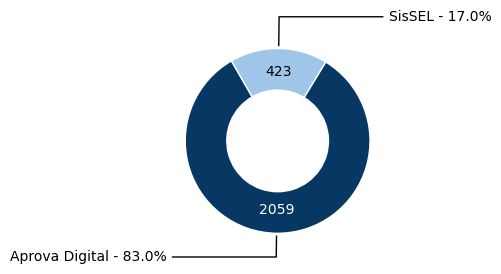

In [97]:
#dados = resid_param['block_placement']['bloco_main_fontes']['data']
def graph_main_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_main_fontes.png', dpi=300)

dados = resid_param['block_placement'].get('bloco_main_fontes').get('data')
if dados:
    graph_main_fontes('resid', dados)

##### Grafico main comparativo

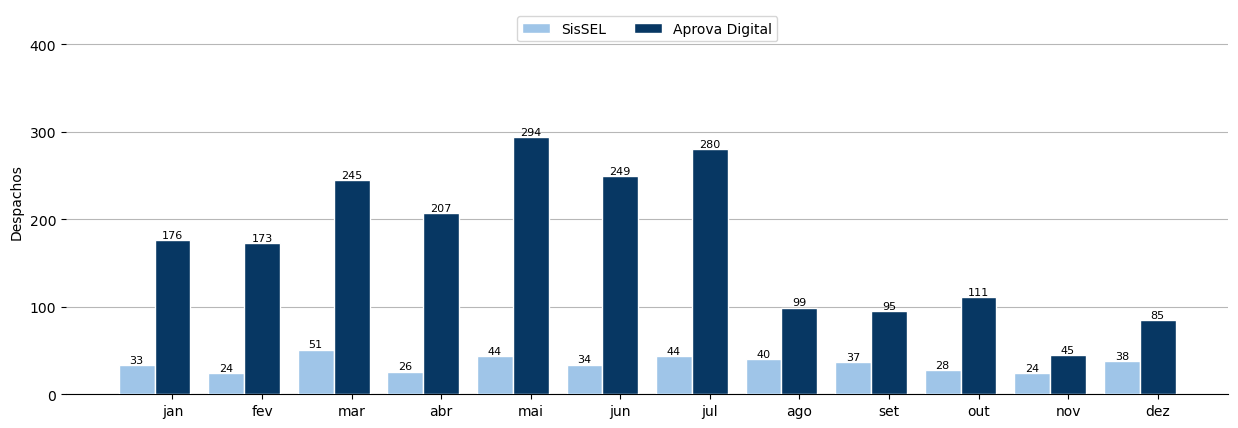

In [98]:
def graph_main_comparativo(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]

    plt.savefig(f'pdf_test/img/{coord}_main_comparativo.png', dpi=300)

dados = resid_param['block_placement'].get('bloco_main_comparativo').get('data')
if dados:
    main_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo('resid', main_comparativo)

##### Grafico main comparativo comuniqueses

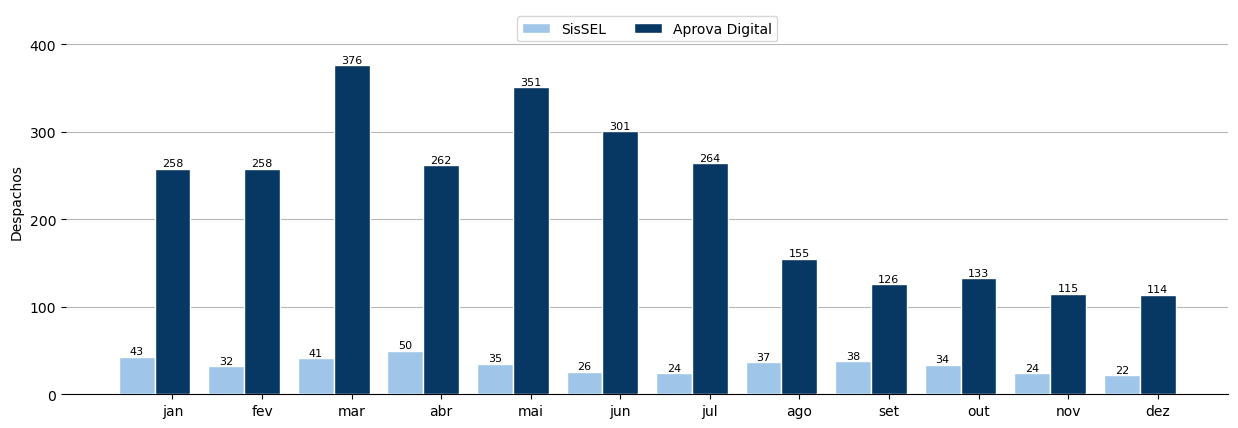

In [99]:
def graph_main_comparativo_comun(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)

    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height() #+ 10
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]
    plt.savefig(f'pdf_test/img/{coord}_main_comparativo_comun.png', dpi=300)

dados = resid_param['block_placement'].get('bloco_main_comparativo_comun').get('data')
if dados:
    main_comparativo_comun = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo_comun('resid', main_comparativo_comun)

##### Gráfico main comuniqueses

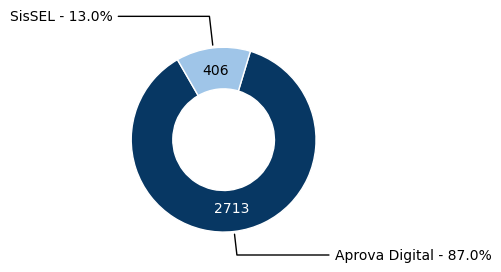

In [100]:
def graph_main_comun(coord, dados):
    
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_main_comun.png', dpi=300)
    
dados = resid_param['block_placement'].get('bloco_main_comuniqueses').get('data')
if dados:
    graph_main_comun('resid', dados)

##### Gráfico main Autuacoes

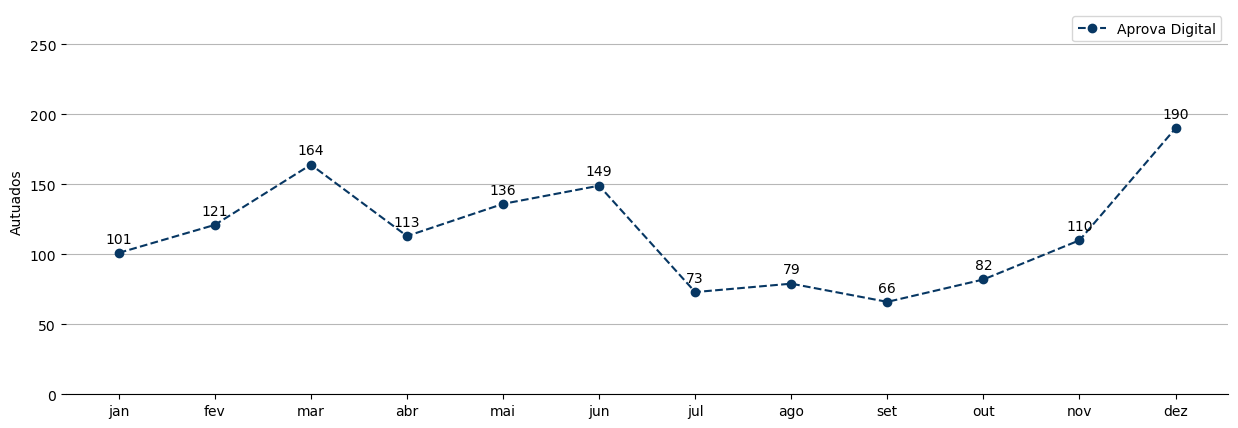

In [101]:
def graph_main_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='--', color='#073763', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 250  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 50))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_main_autuados.png', dpi=300)

main_aut = resid_param['block_placement'].get('bloco_main_autuacoes').get('data').get('Aprova Digital')
if main_aut:
    graph_main_aut('resid', main_aut)

#### Aprova Digital

##### Gráfico ad fontes

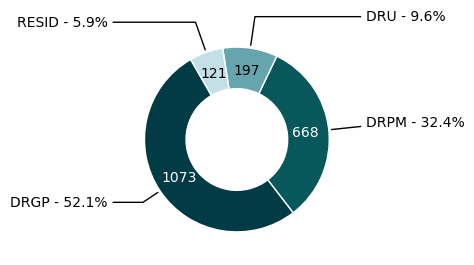

In [102]:

def graph_ad_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    green_pallete = ['#003b46','#07575b','#66a5ad','#c4dfe6',]

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=green_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_ad_fontes.png', dpi=300)
    
ad_fontes = resid_param['block_placement'].get('bloco_ad_fontes').get('data')
if ad_fontes:
    graph_ad_fontes('resid', ad_fontes)

##### Gráfico AD comparativo

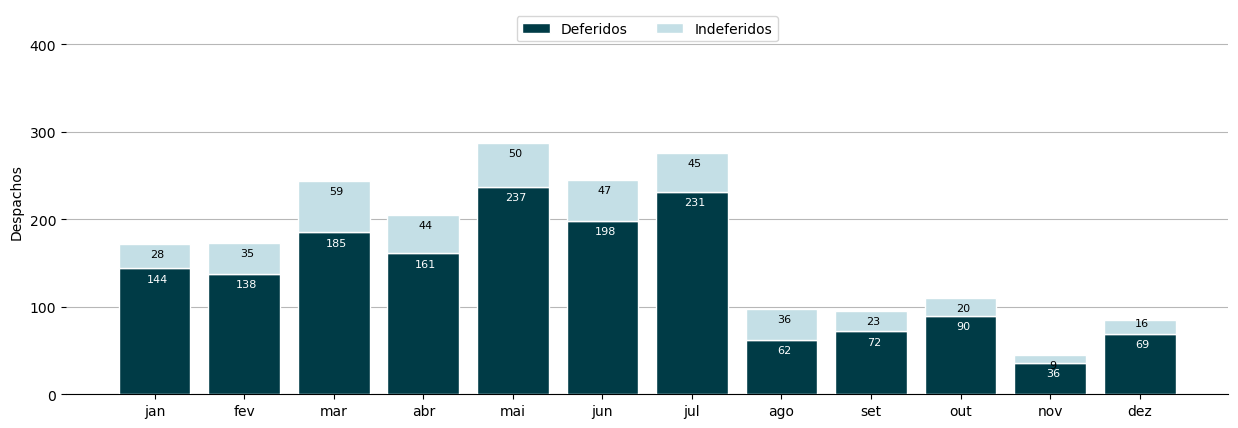

In [103]:
def graph_ad_comparativo(coord, dados):
    green_pallete = ['#c4dfe6', '#003b46']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=green_pallete[1],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=green_pallete[0], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 12
        ajuste_indef = 12
        if i == 11:
            ajuste_indef = 4
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_test/img/{coord}_ad_comparativo.png', dpi=300)
    

ad_comparativo = resid_param['block_placement'].get('bloco_ad_comparativo').get('data')
if ad_comparativo:
    df_ad_comparativo = pd.DataFrame(ad_comparativo, index=lista_meses)
    graph_ad_comparativo('resid', df_ad_comparativo)

##### Grafico ad comuniqueses

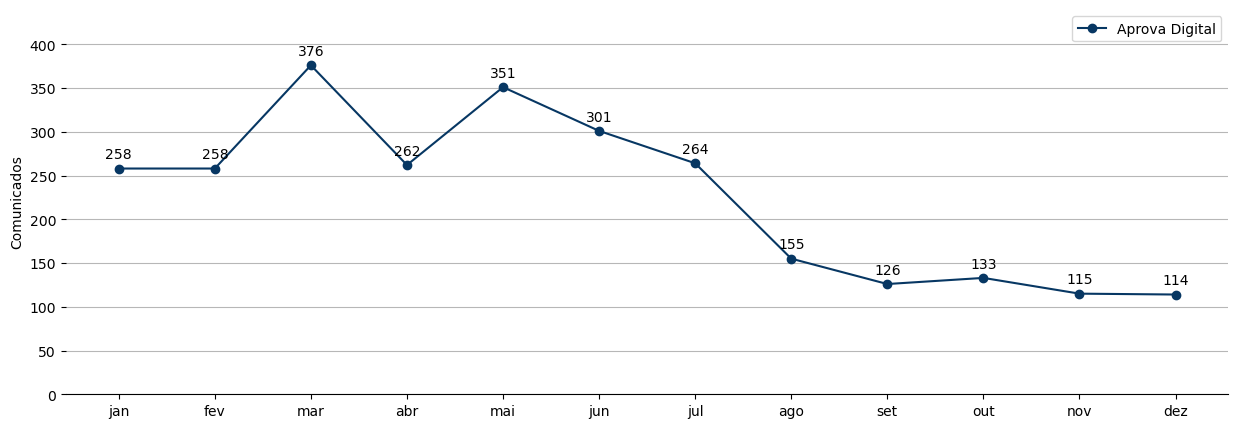

In [104]:
def graph_ad_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#073763', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Comunicados')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 50))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_ad_comun.png', dpi=300)
    
ad_comun = resid_param['block_placement'].get('bloco_ad_comuniqueses').get('data')
if ad_comun:
    graph_ad_comun('resid', ad_comun)

##### Grafico ad Autuados

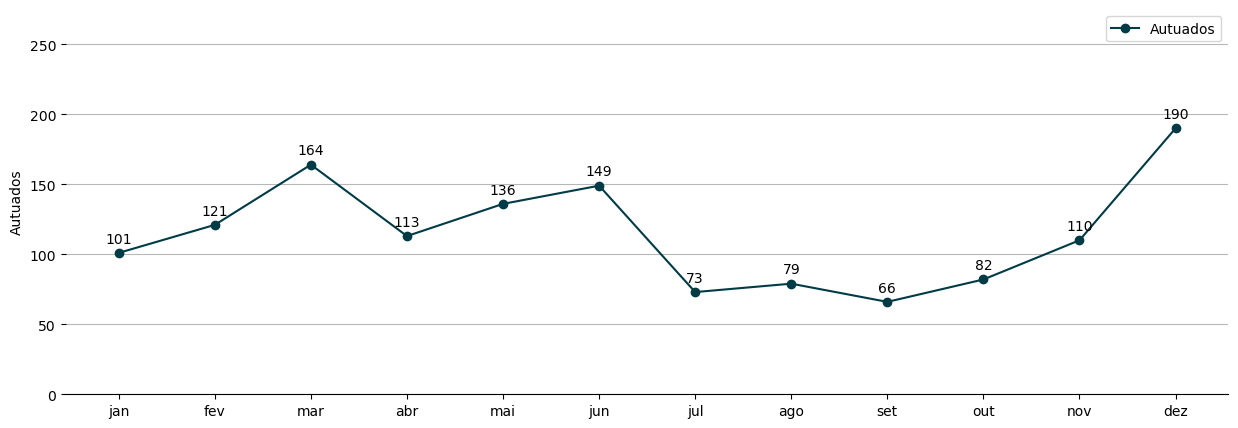

In [105]:
def graph_ad_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4


    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Autuados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 250  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 50))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_ad_autuados.png', dpi=300)

ad_aut = resid_param['block_placement'].get('bloco_ad_autuacoes').get('data')
if ad_aut:
    graph_ad_aut('resid', ad_aut)

#### SisSEL

##### Grafico sissel fontes

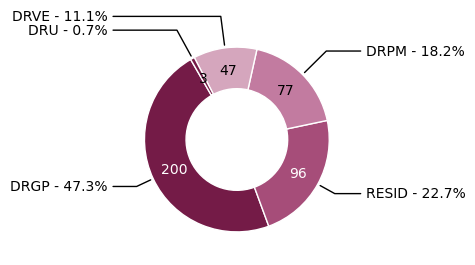

In [106]:
def graph_sissel_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    pink_pallete = ['#741b47','#a64d79','#c27ba0','#d5a6bd']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=pink_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_sissel_fontes.png', dpi=300)

dados = resid_param['block_placement'].get('bloco_sissel_fontes').get('data')
if dados:
    graph_sissel_fontes('resid', dados)

##### Grafico sissel comaprativo

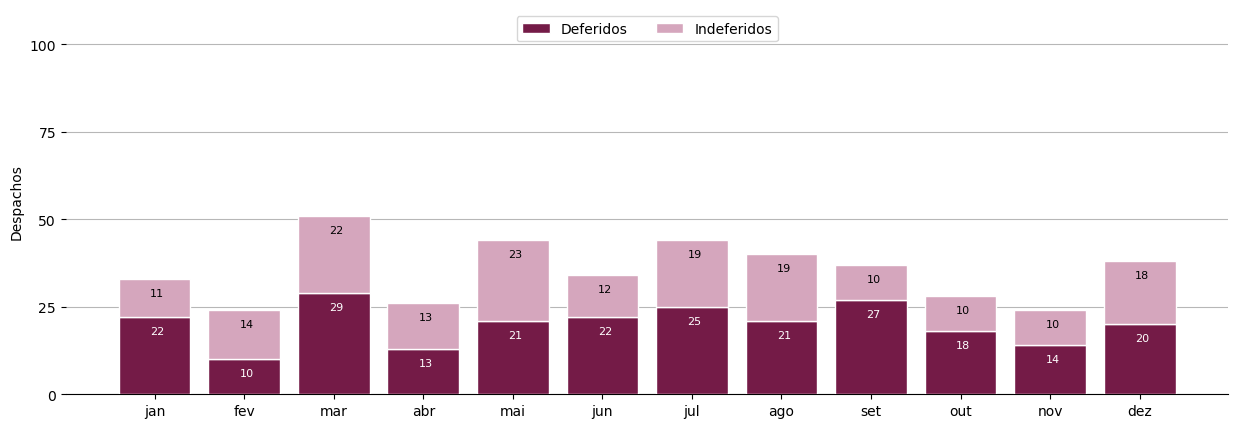

In [107]:
def graph_sissel_comparativo(coord, dados):
    pink_pallete = ['#741b47', '#d5a6bd']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=pink_pallete[0],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=pink_pallete[1], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 4
        ajuste_indef = 4
        if i == 11:
            ajuste_indef = 4
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_test/img/{coord}_sissel_comparativo.png', dpi=300)

dados = resid_param['block_placement'].get('bloco_sissel_comparativo').get('data')
if dados:
    df_dados = pd.DataFrame(dados, index=lista_meses)
    graph_sissel_comparativo('resid', df_dados)

##### Grafico sissel comuniqueses

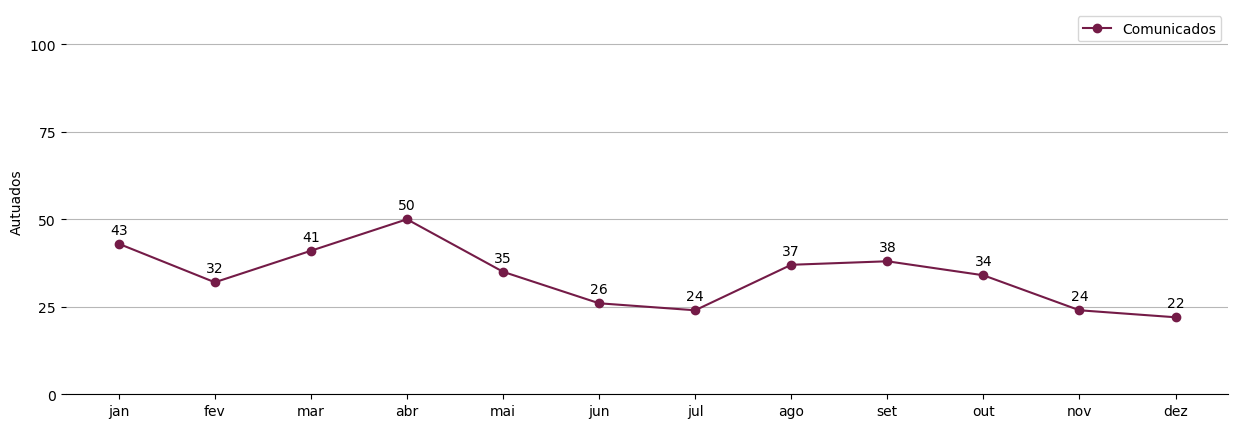

In [108]:
def graph_sissel_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4


    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#741b47', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_sissel_comun.png', dpi=300)
    
dados_com = resid_param['block_placement'].get('bloco_sissel_comuniqueses').get('data')
if dados_com:
    graph_sissel_comun('resid', dados_com)

##### grafico sissel autuados

### SERVIN

#### Geral

##### Grafico main fontes

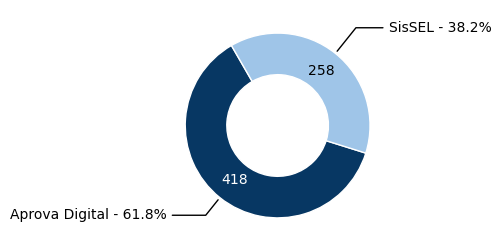

In [109]:
#dados = servin_param['block_placement']['bloco_main_fontes']['data']
def graph_main_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_main_fontes.png', dpi=300)

dados = servin_param['block_placement'].get('bloco_main_fontes').get('data')
if dados:
    graph_main_fontes('servin', dados)

##### Grafico main comparativo

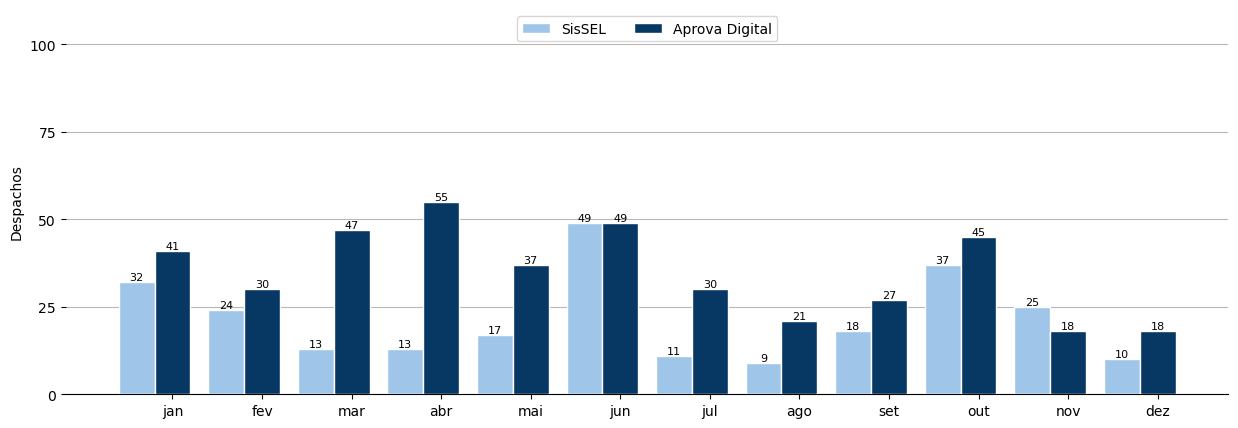

In [110]:
def graph_main_comparativo(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]

    plt.savefig(f'pdf_test/img/{coord}_main_comparativo.png', dpi=300)

dados = servin_param['block_placement'].get('bloco_main_comparativo').get('data')
if dados:
    main_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo('servin', main_comparativo)

##### Grafico main comparativo comuniqueses

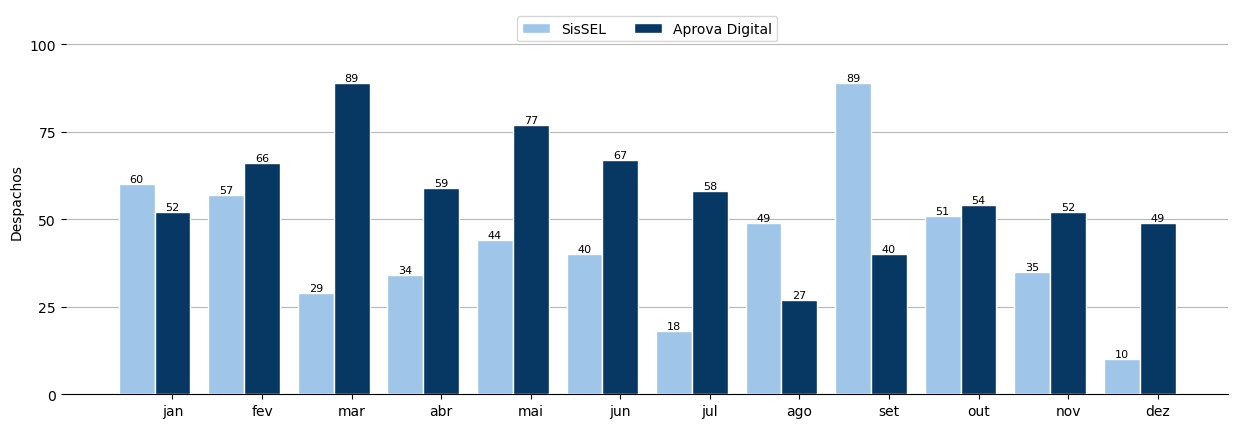

In [111]:
def graph_main_comparativo_comun(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)

    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height() #+ 10
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]
    plt.savefig(f'pdf_test/img/{coord}_main_comparativo_comun.png', dpi=300)

dados = servin_param['block_placement'].get('bloco_main_comparativo_comun').get('data')
if dados:
    main_comparativo_comun = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo_comun('servin', main_comparativo_comun)

##### Gráfico main comuniqueses

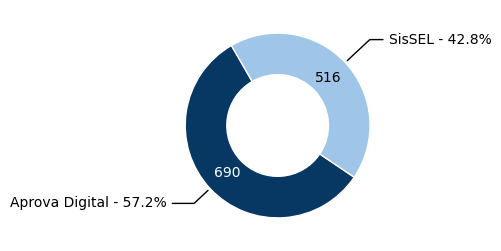

In [112]:
def graph_main_comun(coord, dados):
    
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_main_comun.png', dpi=300)
    
dados = servin_param['block_placement'].get('bloco_main_comuniqueses').get('data')
if dados:
    graph_main_comun('servin', dados)

##### Gráfico main Autuacoes

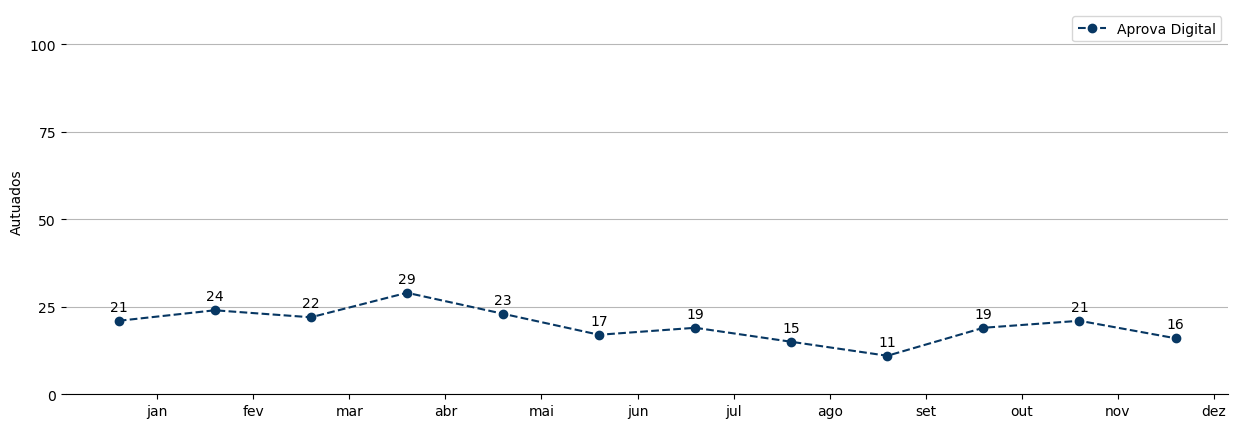

In [113]:
def graph_main_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='--', color='#073763', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_main_autuados.png', dpi=300)

main_aut = servin_param['block_placement'].get('bloco_main_autuacoes').get('data').get('Aprova Digital')
if main_aut:
    graph_main_aut('servin', main_aut)

#### Aprova Digital

##### Gráfico ad fontes

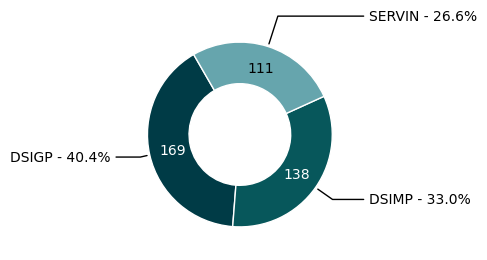

In [114]:
def graph_ad_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    green_pallete = ['#003b46','#07575b','#66a5ad','#c4dfe6',]

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=green_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_ad_fontes.png', dpi=300)
    
ad_fontes = servin_param['block_placement'].get('bloco_ad_fontes').get('data')
if ad_fontes:
    graph_ad_fontes('servin', ad_fontes)

##### Gráfico AD comparativo

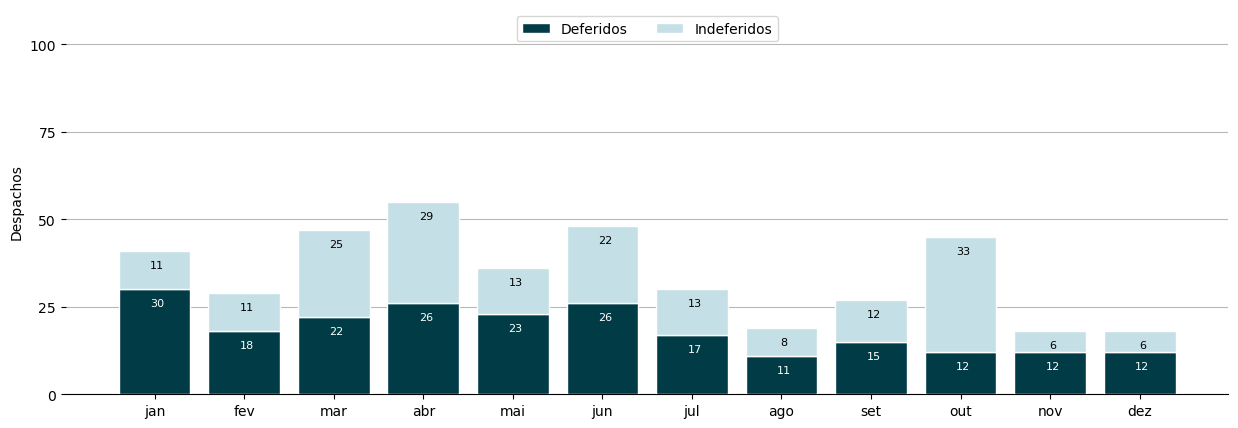

In [115]:
def graph_ad_comparativo(coord, dados):
    green_pallete = ['#c4dfe6', '#003b46']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=green_pallete[1],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=green_pallete[0], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 4
        ajuste_indef = 4
        if i == 11:
            ajuste_indef = 4
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_test/img/{coord}_ad_comparativo.png', dpi=300)
    
dados = servin_param['block_placement'].get('bloco_ad_comparativo').get('data')
if dados:
    ad_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_ad_comparativo('servin', ad_comparativo)

##### Grafico ad comuniqueses

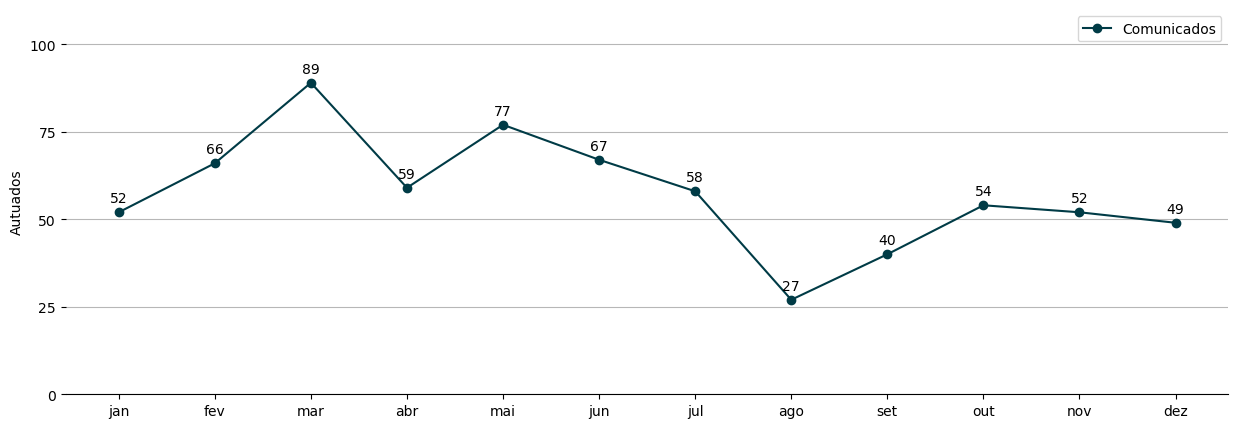

In [116]:
def graph_ad_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_ad_comun.png', dpi=300)
    
ad_comun = servin_param['block_placement'].get('bloco_ad_comuniqueses').get('data')
if ad_comun:
    graph_ad_comun('servin', ad_comun)

##### Grafico ad Autuados

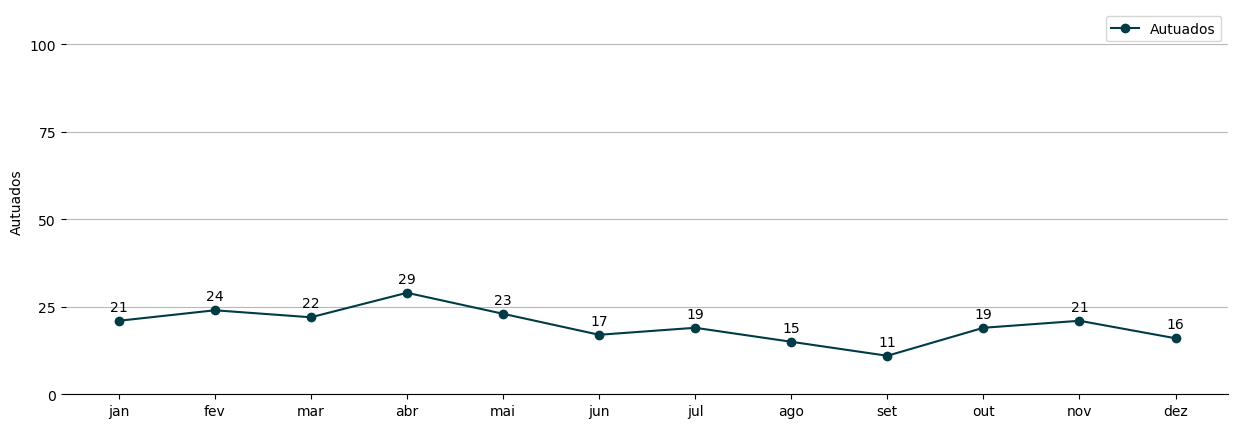

In [117]:
def graph_ad_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Autuados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_ad_autuados.png', dpi=300)

ad_aut = servin_param['block_placement'].get('bloco_ad_autuacoes').get('data')
if ad_aut:
    graph_ad_aut('servin', ad_aut)

#### SisSEL

##### Grafico sissel fontes

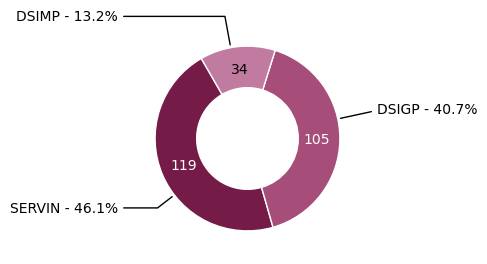

In [118]:
def graph_sissel_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    pink_pallete = ['#741b47','#a64d79','#c27ba0','#d5a6bd']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=pink_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/1.7 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_sissel_fontes.png', dpi=300)

dados = servin_param['block_placement'].get('bloco_sissel_fontes').get('data')
if dados:
    graph_sissel_fontes('servin', dados)

##### Grafico sissel comaprativo

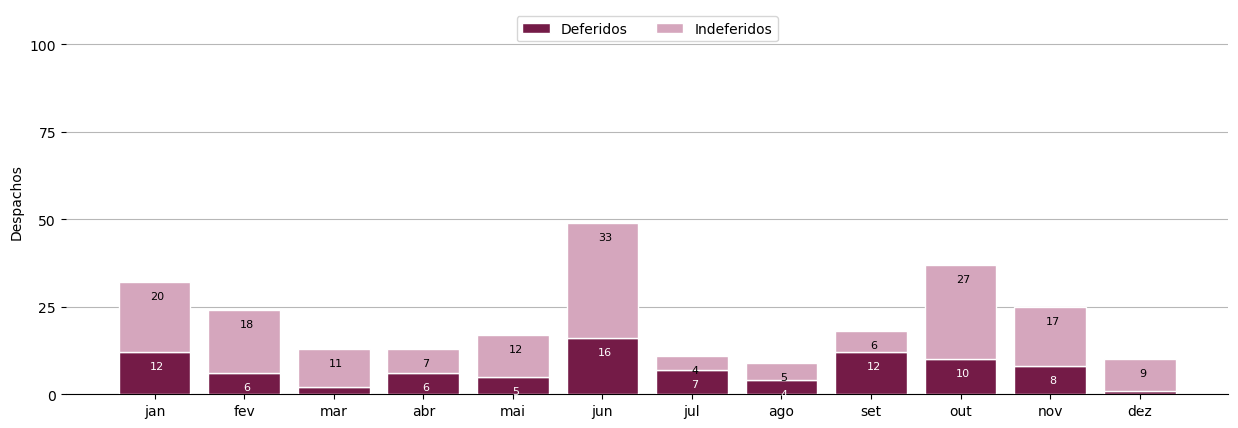

In [119]:
def graph_sissel_comparativo(coord, dados):
    pink_pallete = ['#741b47', '#d5a6bd']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=pink_pallete[0],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=pink_pallete[1], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 4
        ajuste_indef = 4
        if i == 11:
            ajuste_indef = 4
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_test/img/{coord}_sissel_comparativo.png', dpi=300)

dados = servin_param['block_placement'].get('bloco_sissel_comparativo').get('data')
if dados:
    df_dados = pd.DataFrame(dados, index=lista_meses)
    graph_sissel_comparativo('servin', df_dados)

##### Grafico sissel comuniqueses

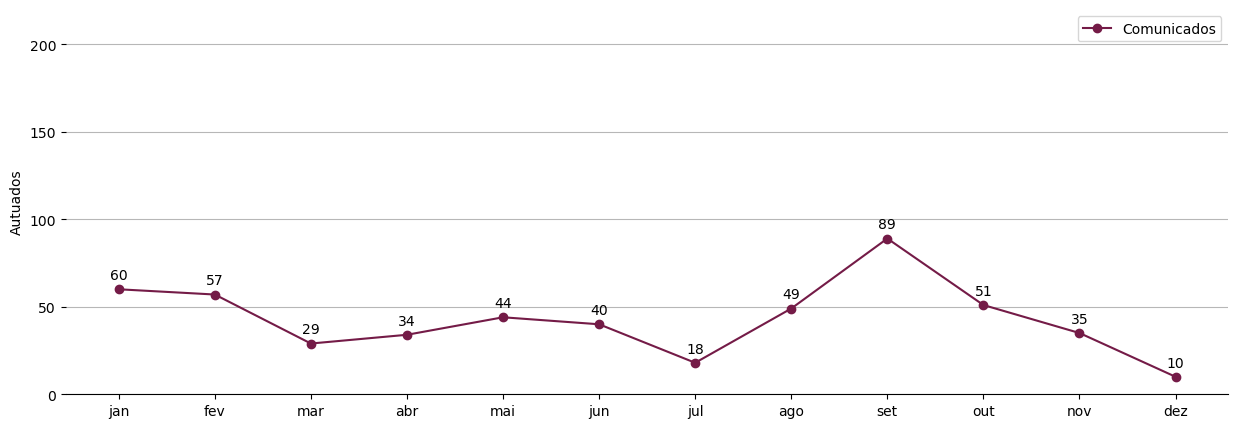

In [120]:
def graph_sissel_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#741b47', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 200  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 50))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_sissel_comun.png', dpi=300)
    
dados_com = servin_param['block_placement'].get('bloco_sissel_comuniqueses').get('data')
if dados_com:
    graph_sissel_comun('servin', dados_com)

##### grafico sissel autuados

### COMIN

#### Geral

##### Grafico main fontes

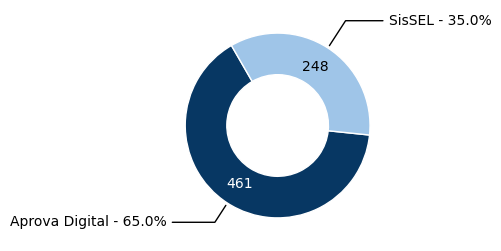

In [121]:
def graph_main_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_main_fontes.png', dpi=300)

dados = comin_param['block_placement'].get('bloco_main_fontes').get('data')
if dados:
    graph_main_fontes('comin', dados)

##### Grafico main comparativo

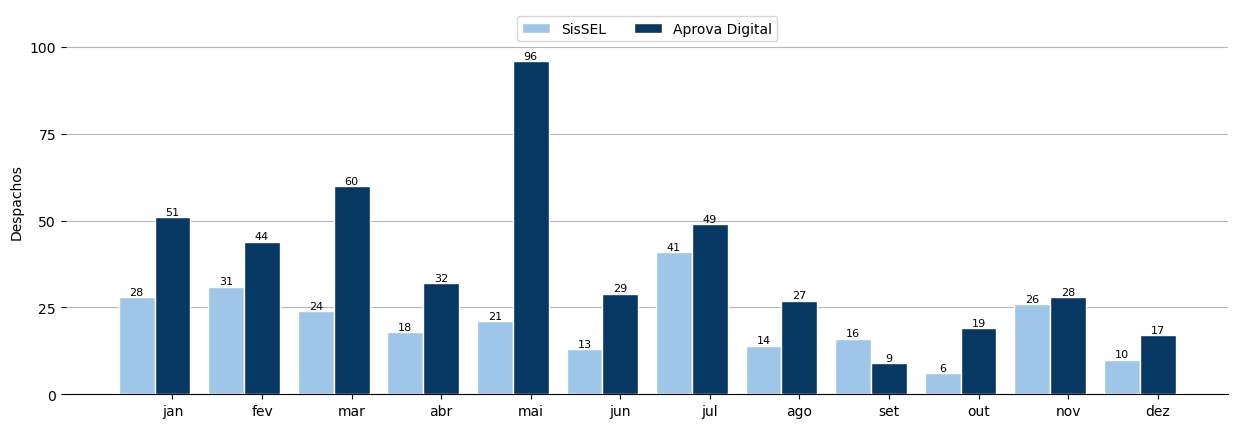

In [122]:
def graph_main_comparativo(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]

    plt.savefig(f'pdf_test/img/{coord}_main_comparativo.png', dpi=300)

dados = comin_param['block_placement'].get('bloco_main_comparativo').get('data')
if dados:
    main_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo('comin', main_comparativo)

##### Grafico main comparativo comuniqueses

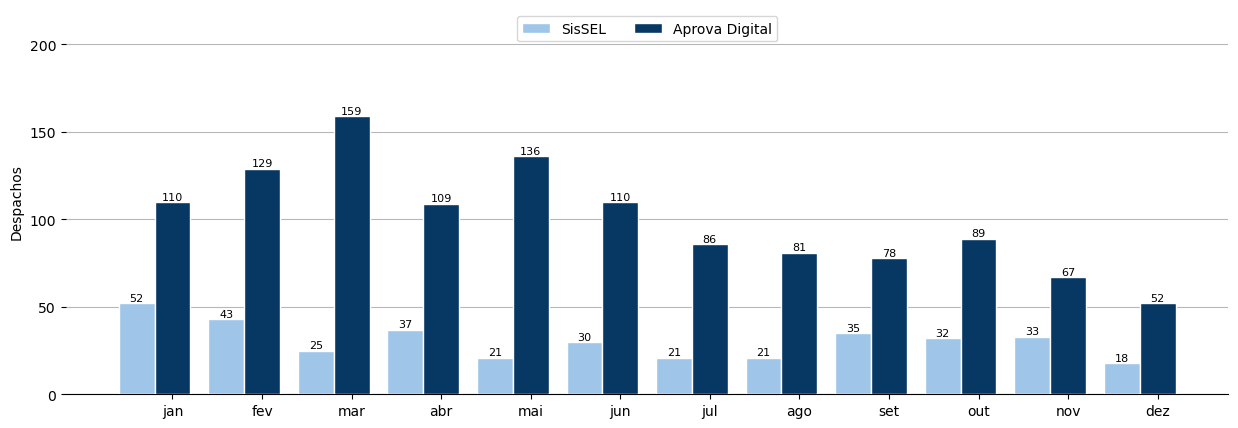

In [123]:
def graph_main_comparativo_comun(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)

    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height() #+ 10
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 200  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 50))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]
    plt.savefig(f'pdf_test/img/{coord}_main_comparativo_comun.png', dpi=300)

dados = comin_param['block_placement'].get('bloco_main_comparativo_comun').get('data')
if dados:
    main_comparativo_comun = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo_comun('comin', main_comparativo_comun)

##### Gráfico main comuniqueses

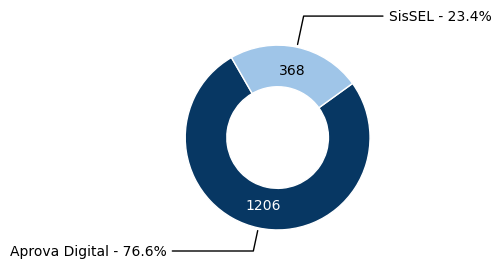

In [124]:
def graph_main_comun(coord, dados):
    
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_main_comun.png', dpi=300)
    
dados = comin_param['block_placement'].get('bloco_main_comuniqueses').get('data')
if dados:
    graph_main_comun('comin', dados)

##### Gráfico main Autuacoes

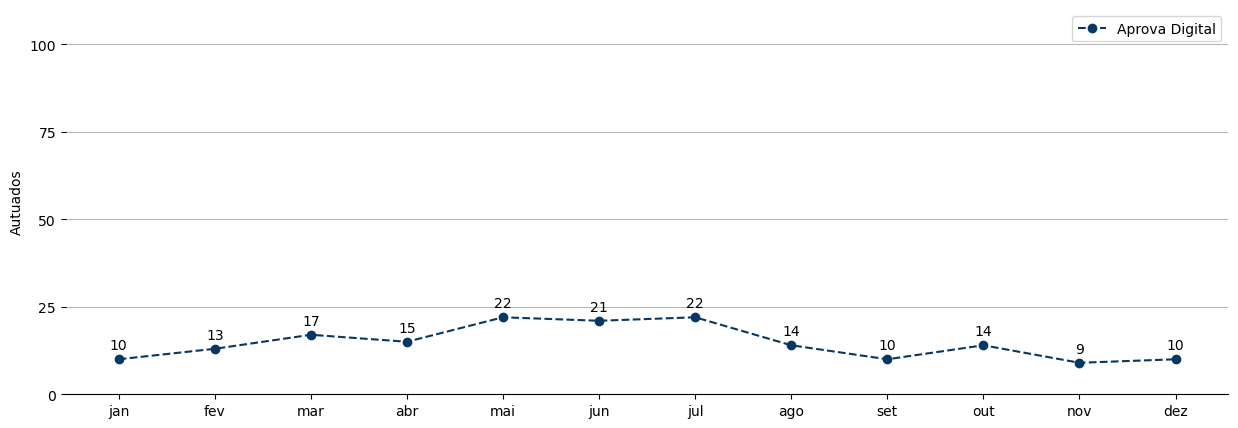

In [125]:
def graph_main_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='--', color='#073763', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_main_autuados.png', dpi=300)

main_aut = comin_param['block_placement'].get('bloco_main_autuacoes').get('data').get('Aprova Digital')
if main_aut:
    graph_main_aut('comin', main_aut)

#### Aprova Digital

##### Gráfico ad fontes

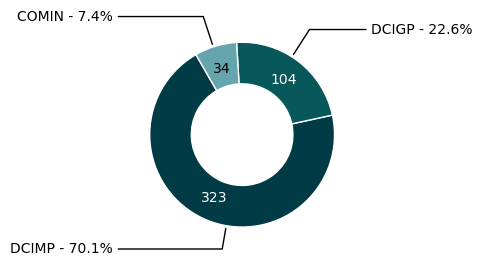

In [126]:
def graph_ad_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    green_pallete = ['#003b46','#07575b','#66a5ad','#c4dfe6',]

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=green_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/1.8 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_ad_fontes.png', dpi=300)
    
ad_fontes = comin_param['block_placement'].get('bloco_ad_fontes').get('data')
if ad_fontes:
    graph_ad_fontes('comin', ad_fontes)

##### Gráfico AD comparativo

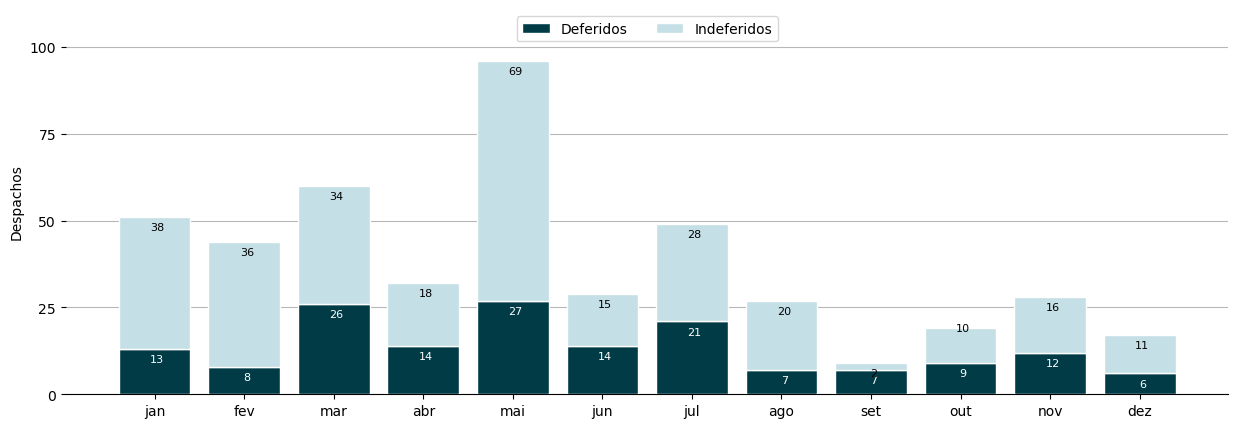

In [127]:
def graph_ad_comparativo(coord, dados):
    green_pallete = ['#c4dfe6', '#003b46']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=green_pallete[1],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=green_pallete[0], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 3
        ajuste_indef = 3
        if i == 9:
            ajuste_indef = 0
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_test/img/{coord}_ad_comparativo.png', dpi=300)
    
dados = comin_param['block_placement'].get('bloco_ad_comparativo').get('data')
if dados:
    ad_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_ad_comparativo('comin', ad_comparativo)

##### Grafico ad comuniqueses

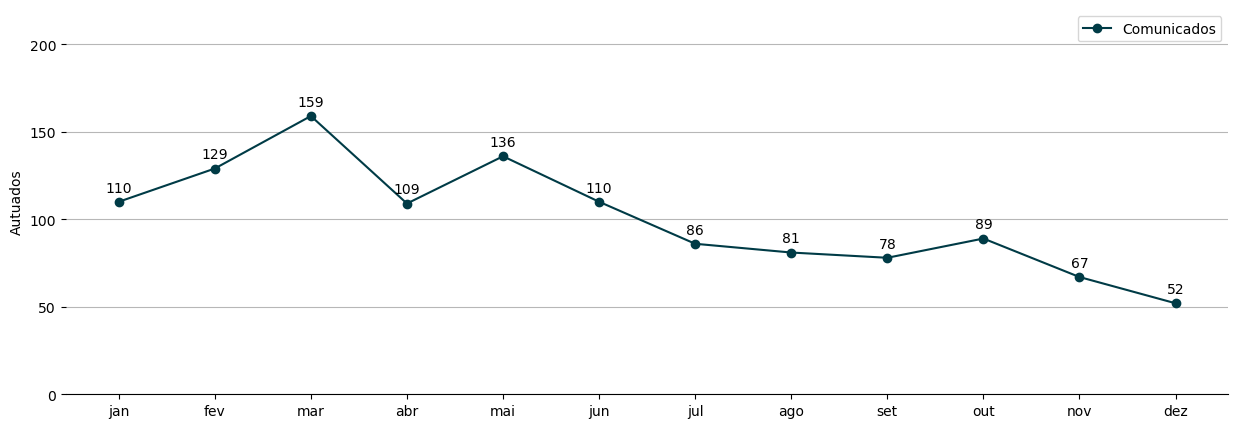

In [128]:
def graph_ad_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 200  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 50))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_ad_comun.png', dpi=300)
    
ad_comun = comin_param['block_placement'].get('bloco_ad_comuniqueses').get('data')
if ad_comun:
    graph_ad_comun('comin', ad_comun)

##### Grafico ad Autuados

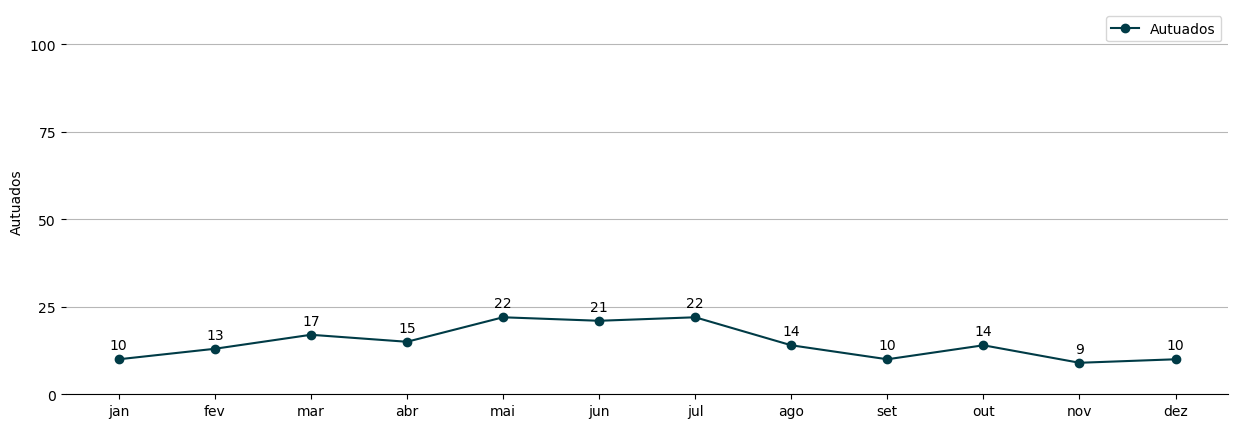

In [129]:
def graph_ad_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Autuados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_ad_autuados.png', dpi=300)

ad_aut = comin_param['block_placement'].get('bloco_ad_autuacoes').get('data')
if ad_aut:
    graph_ad_aut('comin', ad_aut)

#### SisSEL

##### Grafico sissel fontes

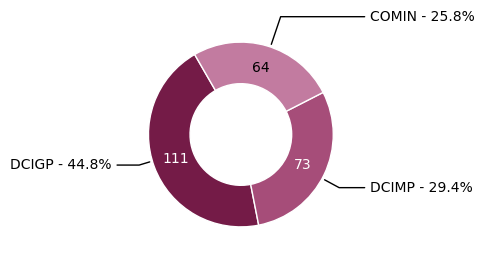

In [130]:
def graph_sissel_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    pink_pallete = ['#741b47','#a64d79','#c27ba0','#d5a6bd']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=pink_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2.1 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_sissel_fontes.png', dpi=300)

dados = comin_param['block_placement'].get('bloco_sissel_fontes').get('data')
if dados:
    graph_sissel_fontes('comin', dados)

##### Grafico sissel comaprativo

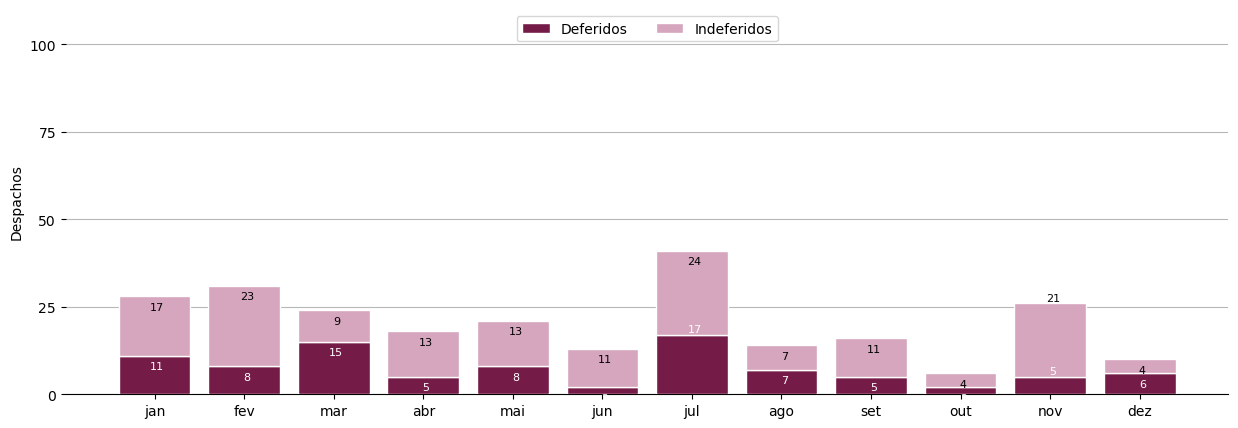

In [131]:
def graph_sissel_comparativo(coord, dados):
    pink_pallete = ['#741b47', '#d5a6bd']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=pink_pallete[0],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=pink_pallete[1], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 3
        ajuste_indef = 3
        if i == 6 or i == 10:
            ajuste_def = -1.5
        if i == 10:
            ajuste_indef = -1.5
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_test/img/{coord}_sissel_comparativo.png', dpi=300)


dados = comin_param['block_placement'].get('bloco_sissel_comparativo').get('data')
if dados:
    df_dados = pd.DataFrame(dados, index=lista_meses)
    graph_sissel_comparativo('comin', df_dados)

##### Grafico sissel comuniqueses

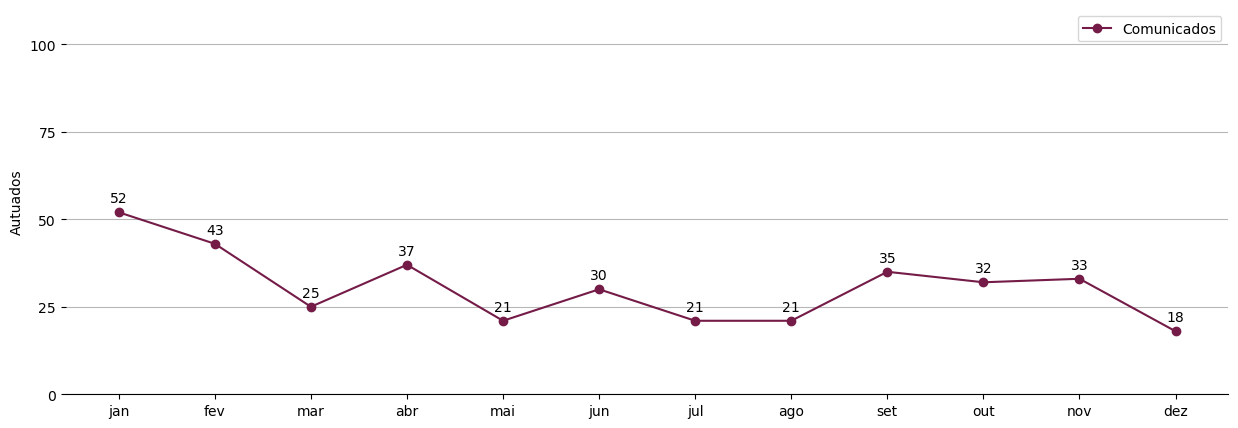

In [132]:
def graph_sissel_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#741b47', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_sissel_comun.png', dpi=300)
    
dados_com = comin_param['block_placement'].get('bloco_sissel_comuniqueses').get('data')
if dados_com:
    graph_sissel_comun('comin', dados_com)

##### grafico sissel autuados

### PARHIS

#### Geral

##### Grafico main fontes

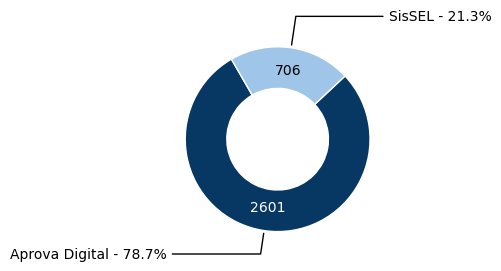

In [133]:
def graph_main_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_main_fontes.png', dpi=300)

dados = parhis_param['block_placement'].get('bloco_main_fontes').get('data')
if dados:
    graph_main_fontes('parhis', dados)

##### Grafico main comparativo

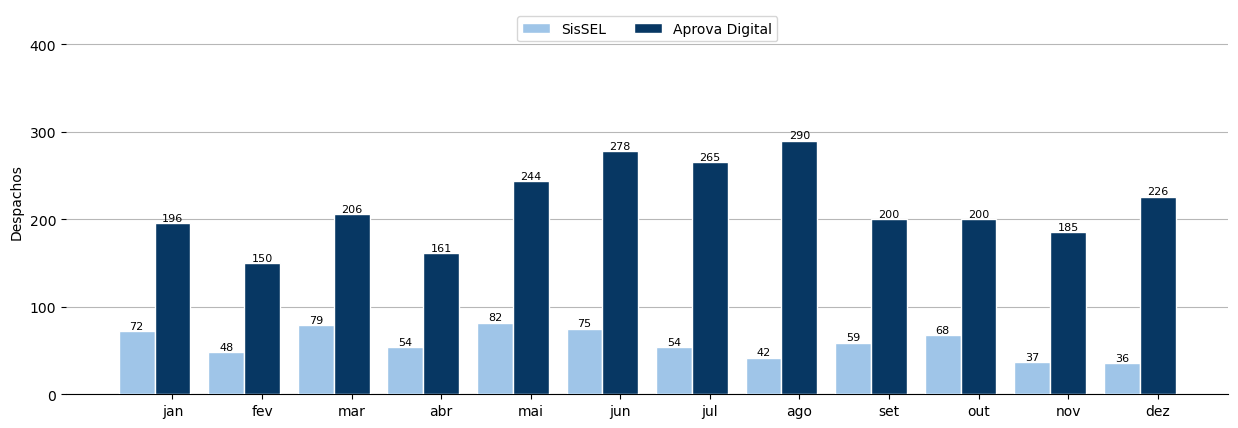

In [134]:
def graph_main_comparativo(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]

    plt.savefig(f'pdf_test/img/{coord}_main_comparativo.png', dpi=300)

dados = parhis_param['block_placement'].get('bloco_main_comparativo').get('data')
if dados:
    main_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo('parhis', main_comparativo)

##### Grafico main comparativo comuniqueses

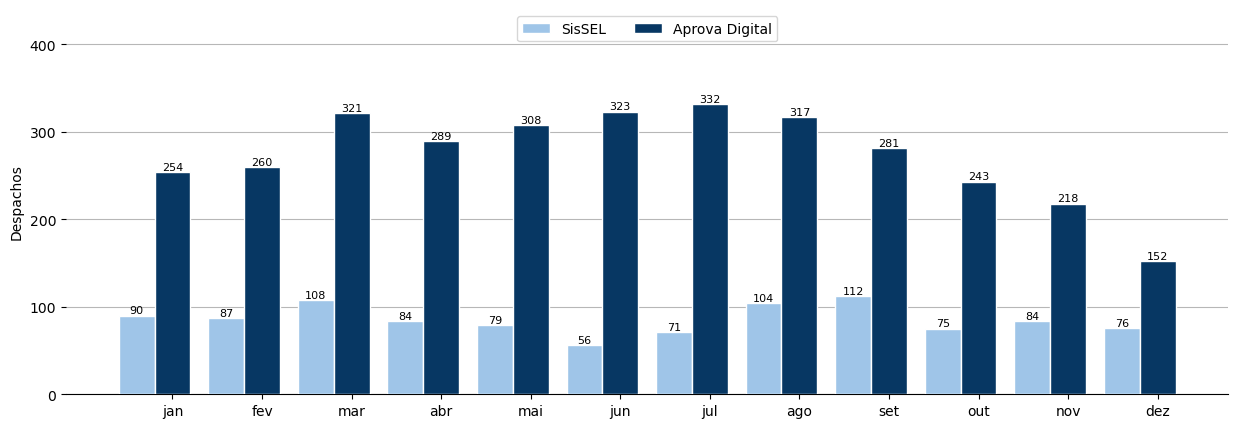

In [135]:
def graph_main_comparativo_comun(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)

    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height() #+ 10
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]
    plt.savefig(f'pdf_test/img/{coord}_main_comparativo_comun.png', dpi=300)

dados = parhis_param['block_placement'].get('bloco_main_comparativo_comun').get('data')
if dados:
    main_comparativo_comun = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo_comun('parhis', main_comparativo_comun)

##### Gráfico main comuniqueses

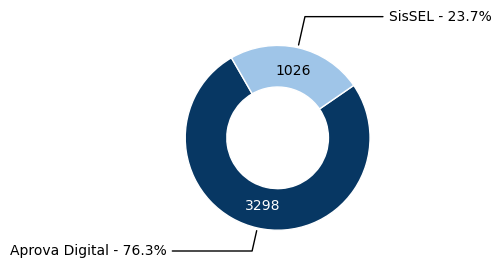

In [136]:
def graph_main_comun(coord, dados):
    
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_main_comun.png', dpi=300)
    
dados = parhis_param['block_placement'].get('bloco_main_comuniqueses').get('data')
if dados:
    graph_main_comun('parhis', dados)

##### Gráfico main Autuacoes

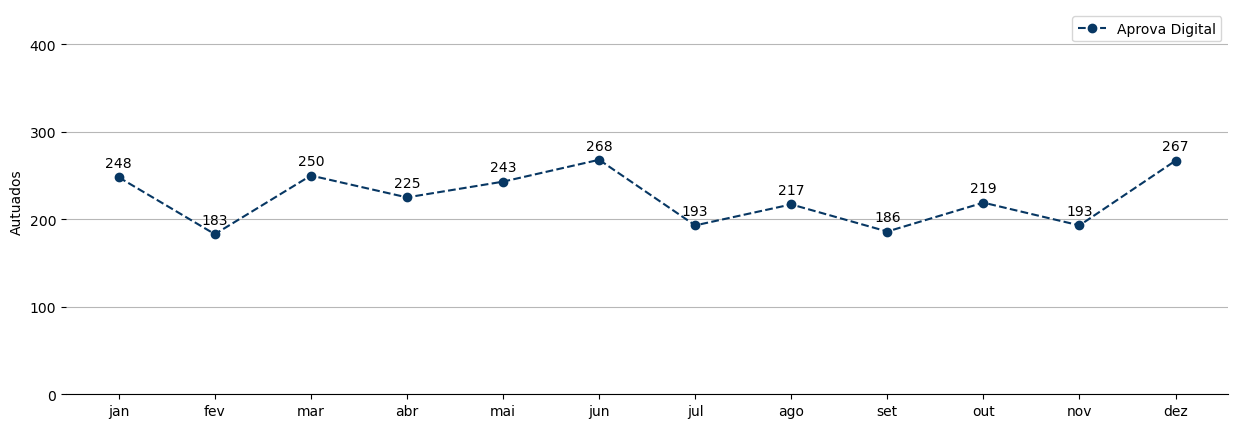

In [137]:
def graph_main_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='--', color='#073763', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_main_autuados.png', dpi=300)

main_aut = parhis_param['block_placement'].get('bloco_main_autuacoes').get('data').get('Aprova Digital')
if main_aut:
    graph_main_aut('parhis', main_aut)

#### Aprova Digital

##### Gráfico ad fontes

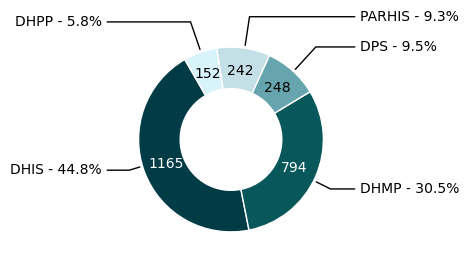

In [138]:
def graph_ad_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    green_pallete = ['#003b46','#07575b','#66a5ad','#c4dfe6', '#d8f3fa']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=green_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2.1 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_ad_fontes.png', dpi=300)
    
ad_fontes = parhis_param['block_placement'].get('bloco_ad_fontes').get('data')
if ad_fontes:
    graph_ad_fontes('parhis', ad_fontes)

##### Gráfico AD comparativo

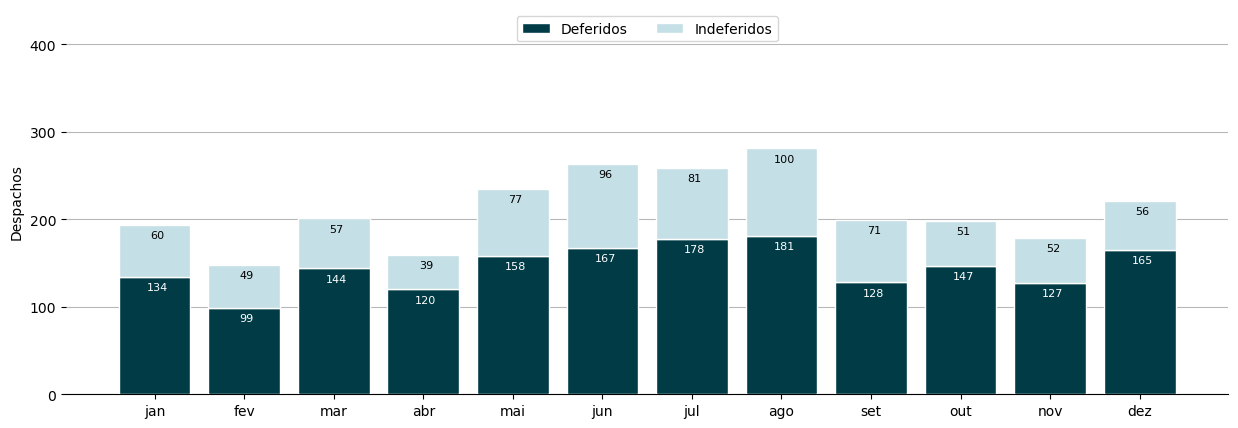

In [139]:
def graph_ad_comparativo(coord, dados):
    green_pallete = ['#c4dfe6', '#003b46']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=green_pallete[1],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=green_pallete[0], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 12
        ajuste_indef = 12
        #if i == 9:
            #ajuste_indef = 0
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_test/img/{coord}_ad_comparativo.png', dpi=300)
    
dados = parhis_param['block_placement'].get('bloco_ad_comparativo').get('data')
if dados:
    ad_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_ad_comparativo('parhis', ad_comparativo)

##### Grafico ad comuniqueses

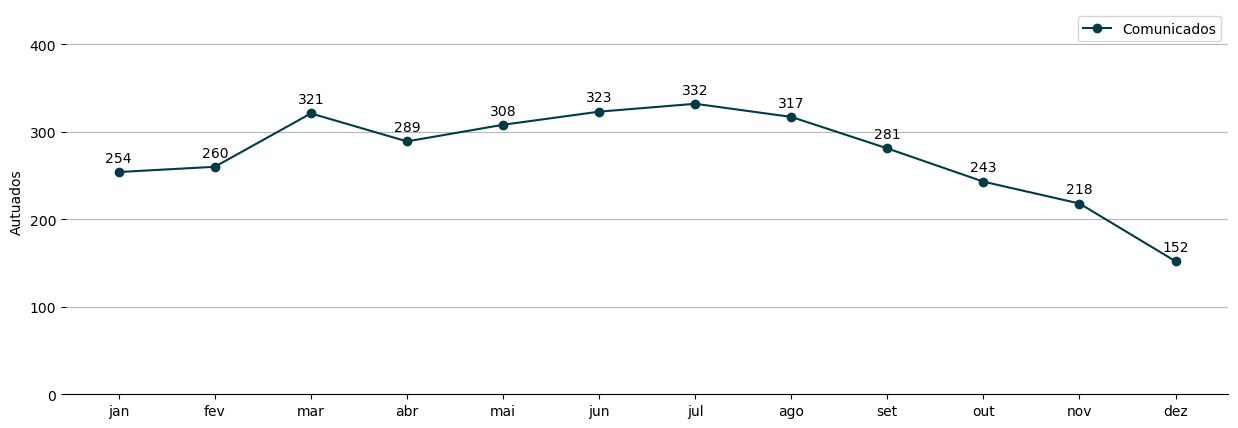

In [140]:
def graph_ad_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_ad_comun.png', dpi=300)
    
ad_comun = parhis_param['block_placement'].get('bloco_ad_comuniqueses').get('data')
if ad_comun:
    graph_ad_comun('parhis', ad_comun)

##### Grafico ad Autuados

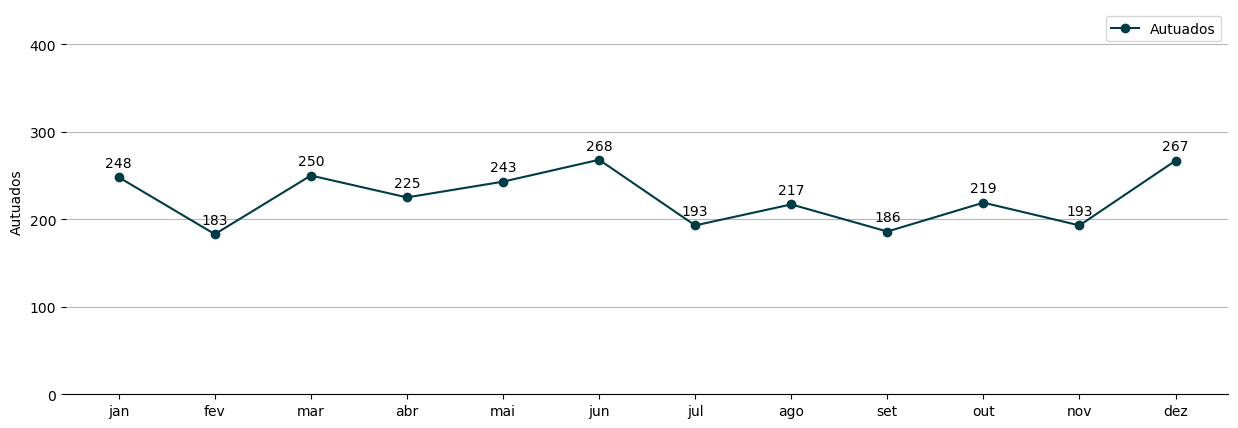

In [141]:
def graph_ad_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Autuados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_ad_autuados.png', dpi=300)

ad_aut = parhis_param['block_placement'].get('bloco_ad_autuacoes').get('data')
if ad_aut:
    graph_ad_aut('parhis', ad_aut)

#### SisSEL

##### Grafico sissel fontes

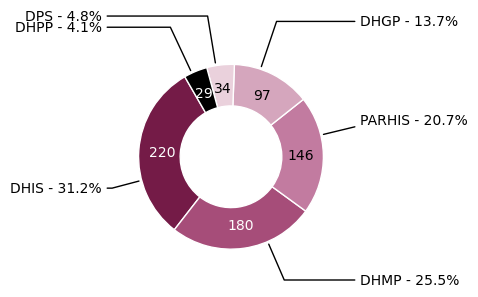

In [142]:
def graph_sissel_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    pink_pallete = ['#741b47','#a64d79','#c27ba0','#d5a6bd', '#ead1dc', '#000000']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=pink_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbbbw')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/1.5 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.5*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_sissel_fontes.png', dpi=300)

dados = parhis_param['block_placement'].get('bloco_sissel_fontes').get('data')
if dados:
    graph_sissel_fontes('parhis', dados)

##### Grafico sissel comaprativo

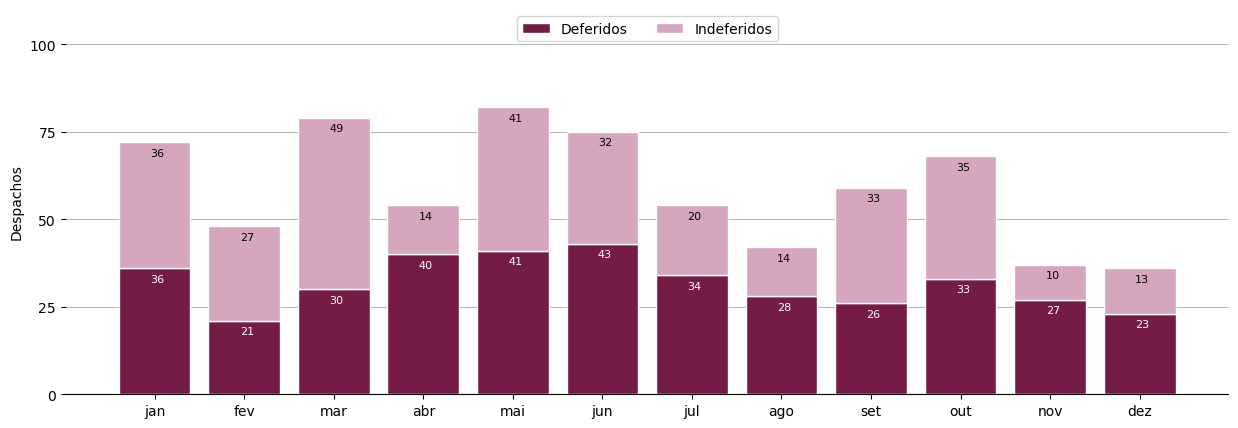

In [143]:
def graph_sissel_comparativo(coord, dados):
    pink_pallete = ['#741b47', '#d5a6bd']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=pink_pallete[0],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=pink_pallete[1], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 3
        ajuste_indef = 3
        #if i == 6 or i == 10:
        #    ajuste_def = -1.5
        #if i == 10:
        #    ajuste_indef = -1.5
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_test/img/{coord}_sissel_comparativo.png', dpi=300)

dados = parhis_param['block_placement'].get('bloco_sissel_comparativo').get('data')
if dados:
    df_dados = pd.DataFrame(dados, index=lista_meses)
    graph_sissel_comparativo('parhis', df_dados)

##### Grafico sissel comuniqueses

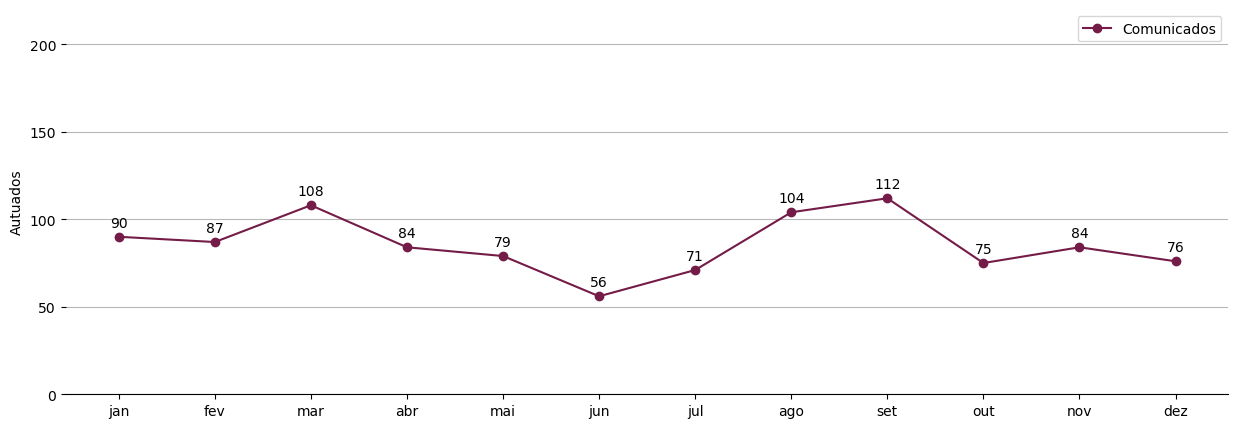

In [144]:
def graph_sissel_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#741b47', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 200  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 50))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_sissel_comun.png', dpi=300)
    
dados_com = parhis_param['block_placement'].get('bloco_sissel_comuniqueses').get('data')
if dados_com:
    graph_sissel_comun('parhis', dados_com)

##### grafico sissel autuados

### CONTRU

#### Geral

##### Grafico main fontes

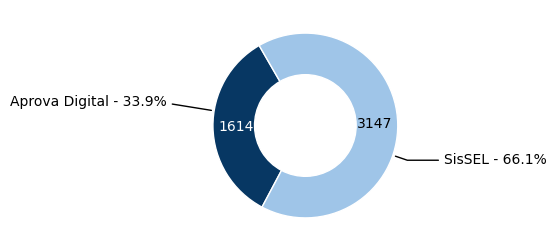

In [145]:
def graph_main_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2.4 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.5*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_main_fontes.png', dpi=300)

dados = contru_param['block_placement'].get('bloco_main_fontes').get('data')
if dados:
    graph_main_fontes('contru', dados)

##### Grafico main comparativo

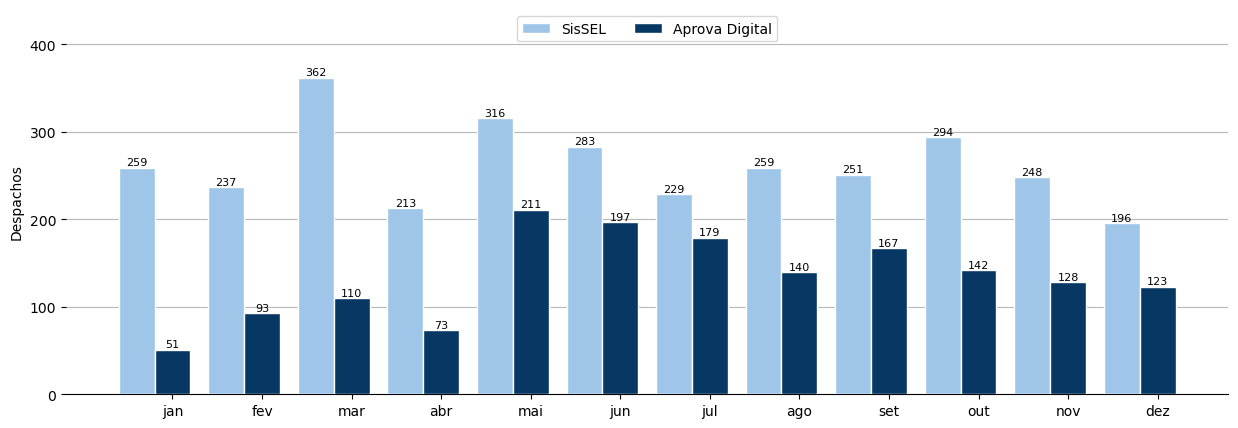

In [146]:
def graph_main_comparativo(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]

    plt.savefig(f'pdf_test/img/{coord}_main_comparativo.png', dpi=300)

dados = contru_param['block_placement'].get('bloco_main_comparativo').get('data')
if dados:
    main_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo('contru', main_comparativo)

##### Grafico main comparativo comuniqueses

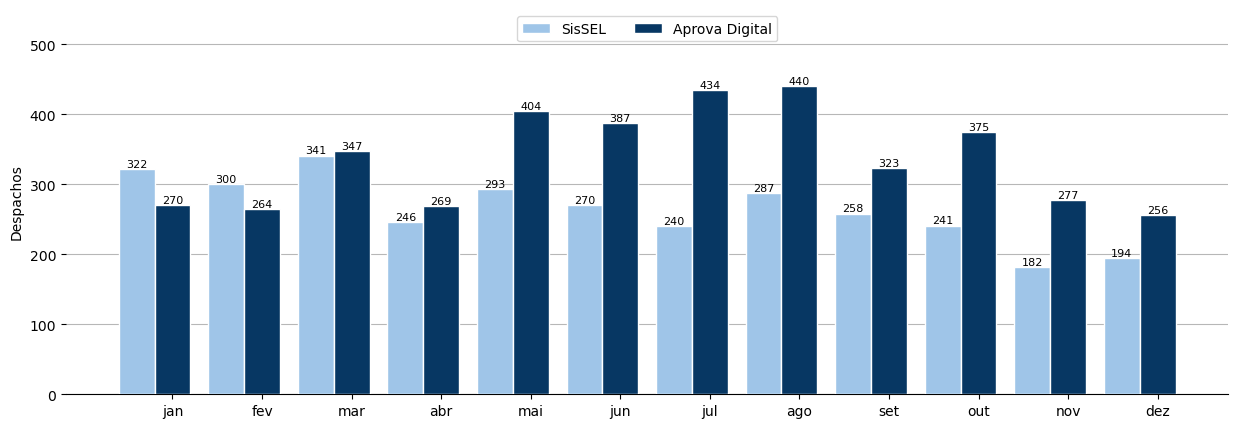

In [147]:
def graph_main_comparativo_comun(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6', ]

    categories = list(dados.index)

    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar3 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar3:
        yval = bar.get_height() #+ 10
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 500  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]
    plt.savefig(f'pdf_test/img/{coord}_main_comparativo_comun.png', dpi=300)

dados = contru_param['block_placement'].get('bloco_main_comparativo_comun').get('data')
if dados:
    main_comparativo_comun = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo_comun('contru', main_comparativo_comun)

##### Gráfico main comuniqueses

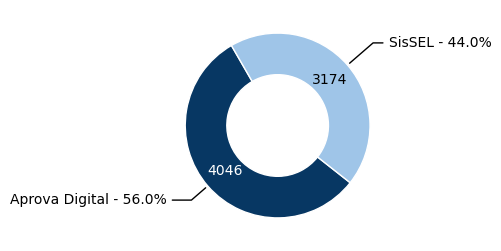

In [148]:
def graph_main_comun(coord, dados):
    
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8']#, '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_main_comun.png', dpi=300)
    
dados = contru_param['block_placement'].get('bloco_main_comuniqueses').get('data')
if dados:
    graph_main_comun('contru', dados)

##### Gráfico main Autuacoes

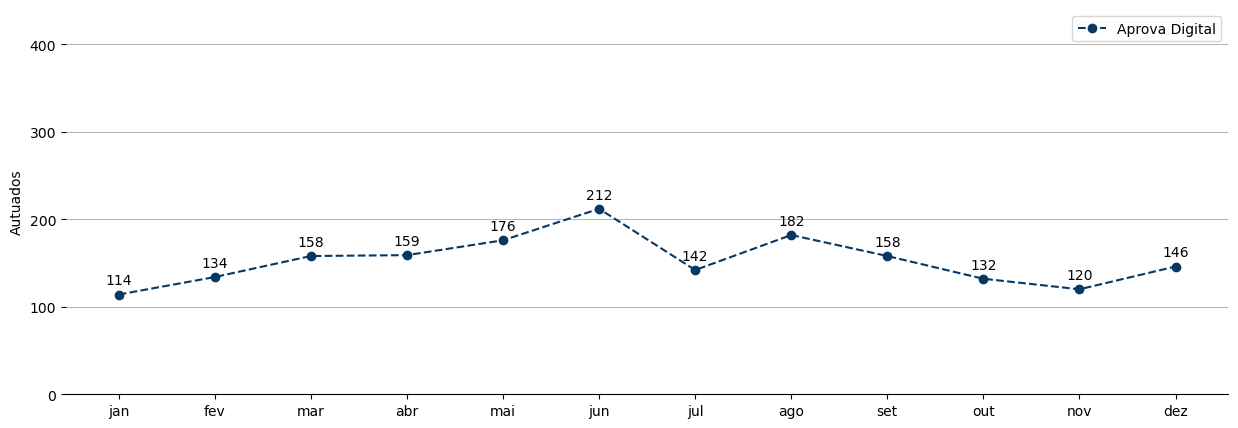

In [149]:
def graph_main_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='--', color='#073763', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_main_autuados.png', dpi=300)

main_aut = contru_param['block_placement'].get('bloco_main_autuacoes').get('data').get('Aprova Digital')
if main_aut:
    graph_main_aut('contru', main_aut)

#### Aprova Digital

##### Gráfico ad fontes

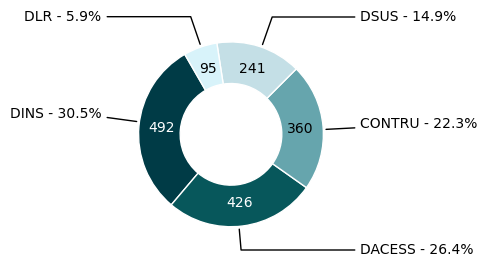

In [150]:
def graph_ad_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    green_pallete = ['#003b46','#07575b','#66a5ad','#c4dfe6', '#d8f3fa']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=green_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2.1 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_ad_fontes.png', dpi=300)
    
ad_fontes = contru_param['block_placement'].get('bloco_ad_fontes').get('data')
if ad_fontes:
    graph_ad_fontes('contru', ad_fontes)

##### Gráfico AD comparativo

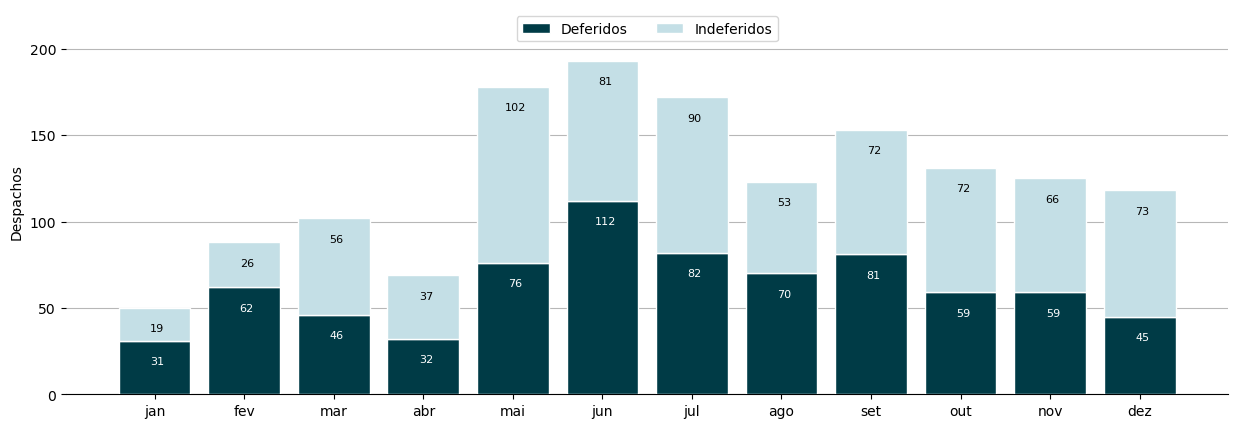

In [151]:
def graph_ad_comparativo(coord, dados):
    green_pallete = ['#c4dfe6', '#003b46']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=green_pallete[1],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=green_pallete[0], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 12
        ajuste_indef = 12
        #if i == 9:
            #ajuste_indef = 0
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 200  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 50))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_test/img/{coord}_ad_comparativo.png', dpi=300)
    
dados = contru_param['block_placement'].get('bloco_ad_comparativo').get('data')
if dados:
    ad_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_ad_comparativo('contru', ad_comparativo)

##### Grafico ad comuniqueses

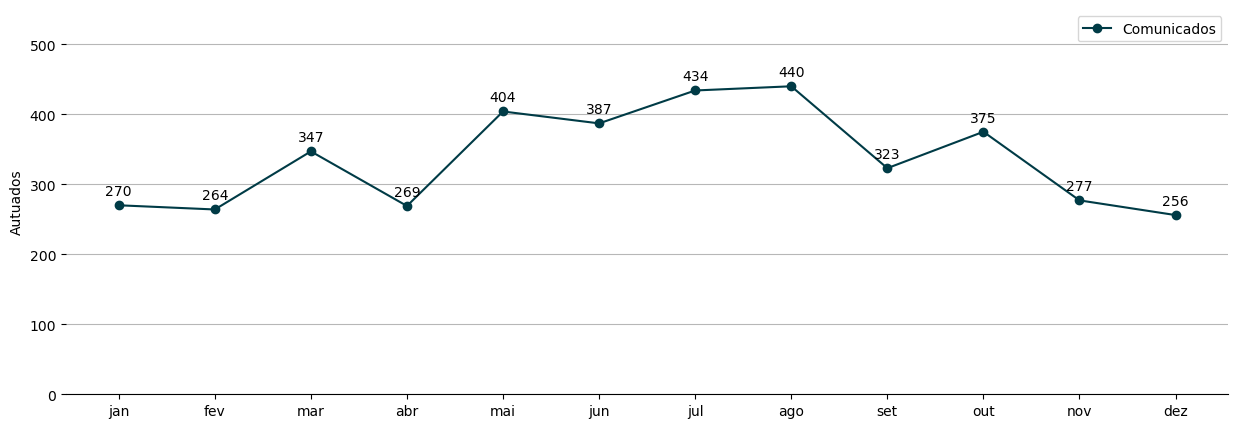

In [152]:
def graph_ad_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 500  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_ad_comun.png', dpi=300)
    
ad_comun = contru_param['block_placement'].get('bloco_ad_comuniqueses').get('data')
if ad_comun:
    graph_ad_comun('contru', ad_comun)

##### Grafico ad Autuados

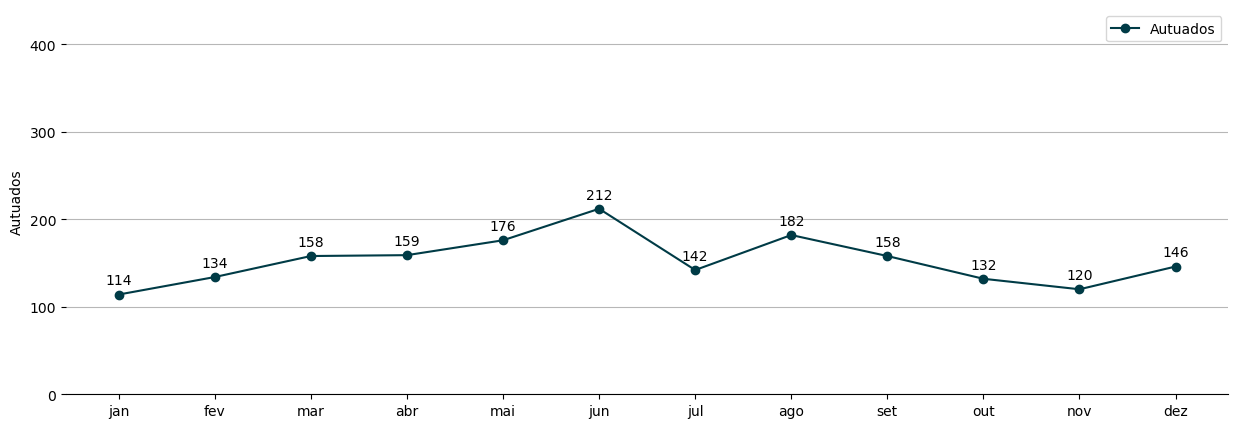

In [153]:
def graph_ad_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Autuados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_ad_autuados.png', dpi=300)

ad_aut = contru_param['block_placement'].get('bloco_ad_autuacoes').get('data')
if ad_aut:
    graph_ad_aut('contru', ad_aut)

#### SisSEL

##### Grafico sissel fontes

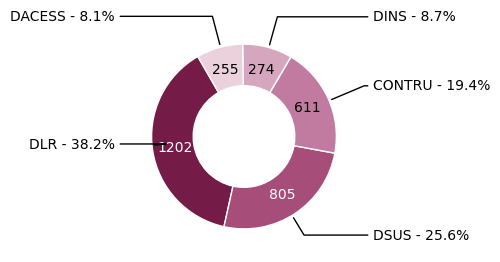

In [154]:
def graph_sissel_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    pink_pallete = ['#741b47','#a64d79','#c27ba0','#d5a6bd', '#ead1dc']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=pink_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwbbb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2.1 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_sissel_fontes.png', dpi=300)

dados = contru_param['block_placement'].get('bloco_sissel_fontes').get('data')
if dados:
    graph_sissel_fontes('contru', dados)

##### Grafico sissel comaprativo

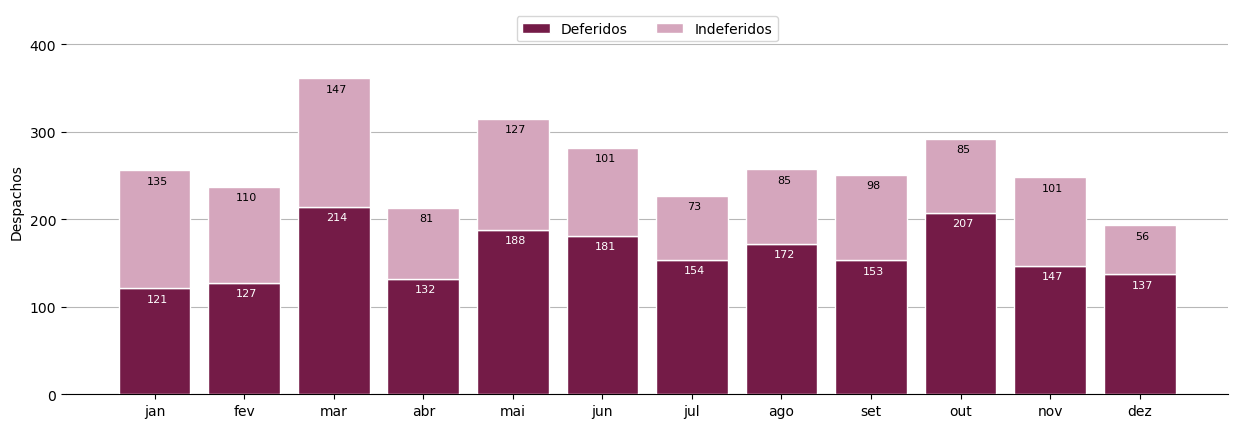

In [155]:
def graph_sissel_comparativo(coord, dados):
    pink_pallete = ['#741b47', '#d5a6bd']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=pink_pallete[0],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=pink_pallete[1], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 12
        ajuste_indef = 12
        #if i == 6 or i == 10:
        #    ajuste_def = -1.5
        #if i == 10:
        #    ajuste_indef = -1.5
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_test/img/{coord}_sissel_comparativo.png', dpi=300)

dados = contru_param['block_placement'].get('bloco_sissel_comparativo').get('data')
if dados:
    df_dados = pd.DataFrame(dados, index=lista_meses)
    graph_sissel_comparativo('contru', df_dados)

##### Grafico sissel comuniqueses

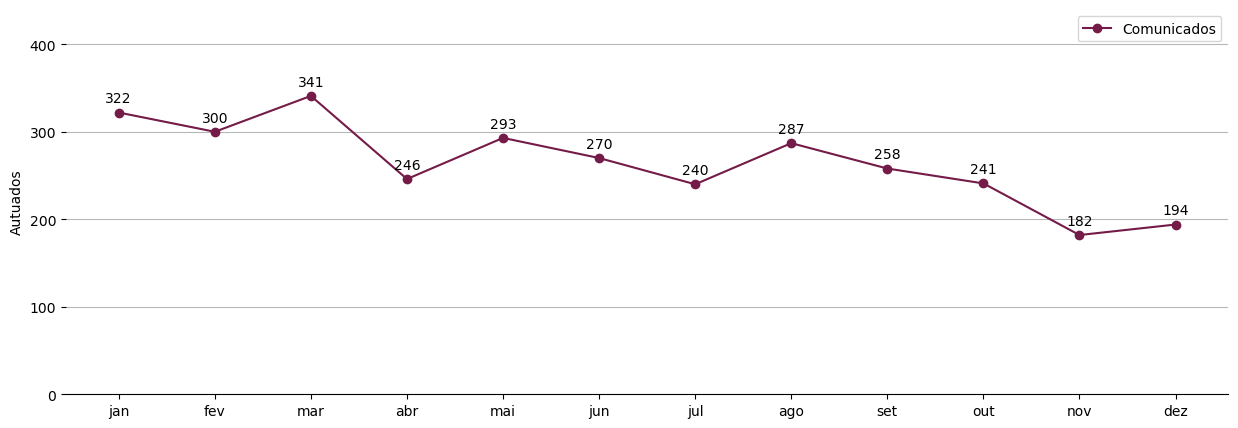

In [156]:
def graph_sissel_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#741b47', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_sissel_comun.png', dpi=300)
    
dados_com = contru_param['block_placement'].get('bloco_sissel_comuniqueses').get('data')
if dados_com:
    graph_sissel_comun('contru', dados_com)

##### grafico sissel autuados

### CAEPP

#### Geral

##### Grafico main fontes

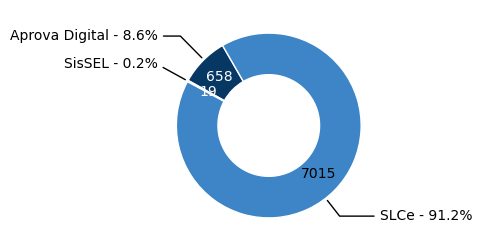

In [157]:
#dados = caepp_param['block_placement']['bloco_main_fontes']['data']
def graph_main_fontes(coord, dados):
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#073763', '#9fc5e8', '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('wwb')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2.1 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)

    plt.savefig(f'pdf_test/img/{coord}_main_fontes.png', dpi=300)

dados = caepp_param['block_placement'].get('bloco_main_fontes').get('data')
if dados:
    graph_main_fontes('caepp', dados)

##### Grafico main comparativo

{'SisSEL': [0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 7, 6],
 'Aprova Digital': [0, 0, 0, 0, 0, 0, 0, 49, 116, 146, 168, 179],
 'SLCe': [578, 517, 703, 800, 939, 615, 668, 463, 412, 457, 449, 414],
 'Total': [578, 517, 703, 800, 939, 615, 668, 512, 529, 608, 624, 599]}

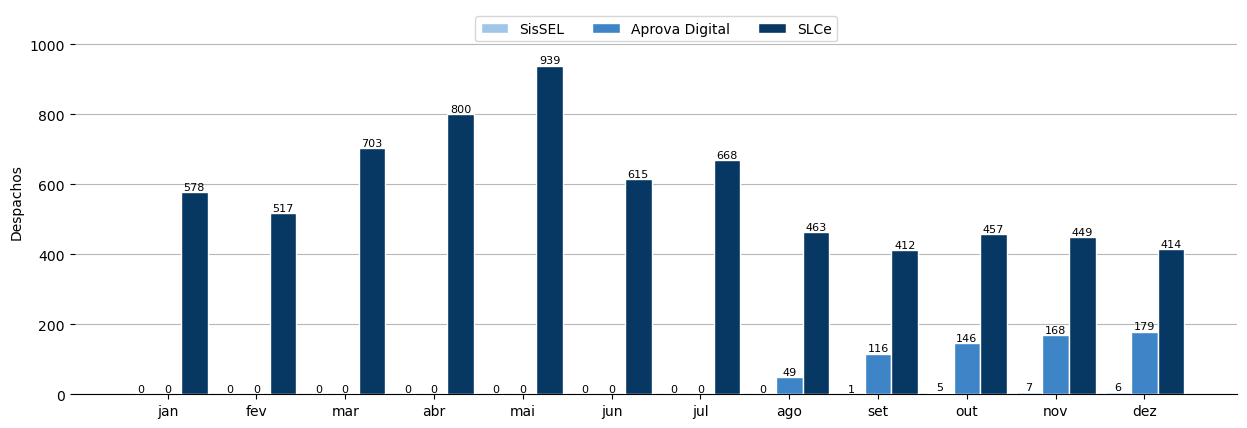

In [158]:
def graph_main_comparativo(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8', '#3d85c6']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.3

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar2 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[2], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)
    bar3 = plt.bar(r3, dados['SLCe'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='SLCe', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')
    
    # Escrevendo valos dentro das barras
    for bar in bar1 + bar2 + bar3 :
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 1000  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 200))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar2, bar3], loc='upper center', ncol=3) # total_line[0]

    plt.savefig(f'pdf_test/img/{coord}_main_comparativo.png', dpi=300)

dados = caepp_param['block_placement'].get('bloco_main_comparativo').get('data')
if dados:
    main_comparativo = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo('caepp', main_comparativo)
dados

##### Grafico main comparativo comuniqueses

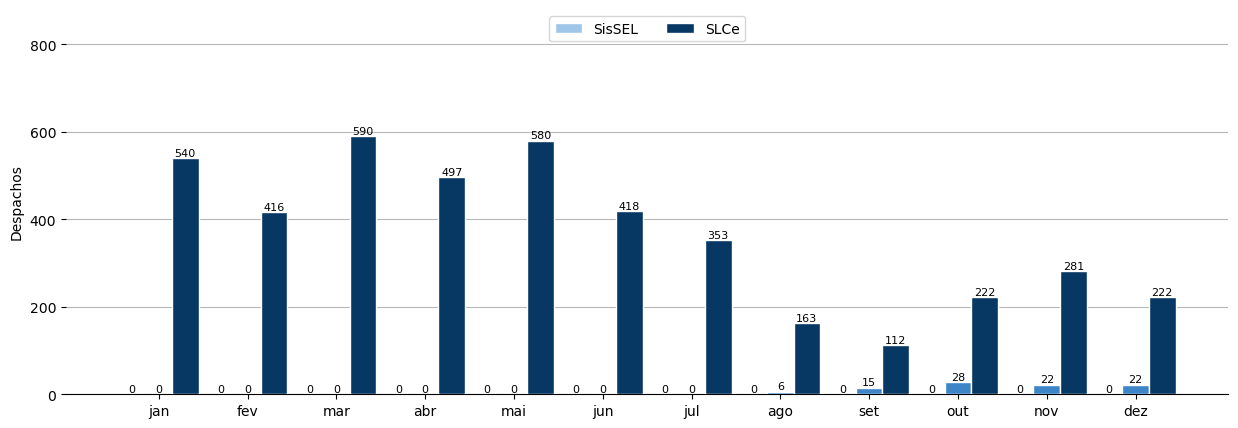

In [159]:
def graph_main_comparativo_comun(coord, dados):
    blue_pallete = ['#073763', '#9fc5e8', '#3d85c6', ]

    categories = list(dados.index)

    # Configurar a largura das barras agrupadas
    bar_width = 0.3

    # Configurar a posição das barras agrupadas
    r1 = range(len(categories))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar1 = plt.bar(r1, dados['SisSEL'], color=blue_pallete[1], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
    bar2 = plt.bar(r2, dados['Aprova Digital'], color=blue_pallete[2], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)
    bar3 = plt.bar(r3, dados['SLCe'], color=blue_pallete[0], width=bar_width, edgecolor='white', label='SLCe', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for bar in bar1 + bar2 + bar3:
        yval = bar.get_height() #+ 10
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 800  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 200))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]
    plt.savefig(f'pdf_test/img/{coord}_main_comparativo_comun.png', dpi=300)

dados = caepp_param['block_placement'].get('bloco_main_comparativo_comun').get('data')
if dados:
    main_comparativo_comun = pd.DataFrame(dados, index=lista_meses)
    graph_main_comparativo_comun('caepp', main_comparativo_comun)

##### Gráfico main comuniqueses

Aprova Digital - 2.1%
SLCe - 97.9%


{'Aprova Digital': 93, 'SLCe': 4394}

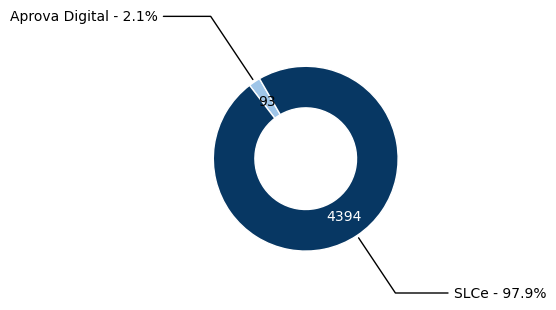

In [160]:
def graph_main_comun(coord, dados):
    
    valores = list(dados.values())
    sistemas = list(dados.keys())
    total = np.sum(valores)  # Total para calcula de porcentagem na mão

    labels = [f'{i} - {round(valores[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)] 
    blue_pallete = ['#9fc5e8', '#073763', '#3d85c6']

    ## Grafico
    def func(pct, allvals):
        absolute = int(np.round(pct/100.*np.sum(allvals)))
        return f"{absolute}"

    fig, ax = plt.subplots(figsize=(7,3)) 
    wedges, texts, autotexts = ax.pie(valores, 
                                      colors=blue_pallete,
                                      autopct=lambda pct: func(pct, valores), 
                                      startangle=120, 
                                      pctdistance=0.75, 
                                      wedgeprops=dict(width=0.45, edgecolor='w'))

    for n, autotext in enumerate(autotexts):
        autotext.set_color(label_color('bw')[n]) 

    kw = dict(arrowprops=dict(arrowstyle="-"))

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.6*np.sign(x), 1.8*y), horizontalalignment=horizontalalignment, **kw)
        print(labels[i])

    plt.savefig(f'pdf_test/img/{coord}_main_comun.png', dpi=300)
    
dados = caepp_param['block_placement'].get('bloco_main_comuniqueses').get('data')
del dados['SisSEL'] # Tirar o sissel por eqntuanto pq é zero
if dados:
    graph_main_comun('caepp', dados)
dados

##### Gráfico main Autuacoes

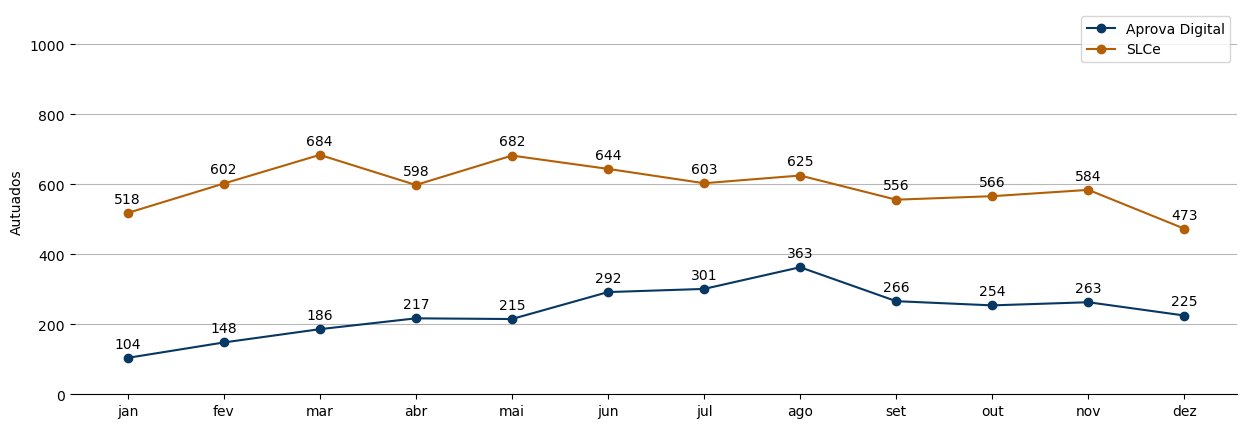

In [161]:
def graph_main_aut(coord, dados_aut):
    dados = dados_aut
    meses = list(dados_aut['Aprova Digital'].keys())
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados['Aprova Digital'].values()), marker='o', linestyle='-', color='#073763', label='Aprova Digital')
    plt.plot(meses, list(dados['SLCe'].values()), marker='o', linestyle='-', color='#b45f06', label='SLCe')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 1000  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 200))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for key, values in dados.items():
        for mes, valor in values.items():
            plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_main_autuados.png', dpi=300)

main_aut = caepp_param['block_placement'].get('bloco_main_autuacoes').get('data')
main_aut
if main_aut:
    graph_main_aut('caepp', main_aut)

#### Aprova Digital

##### Gráfico AD comparativo

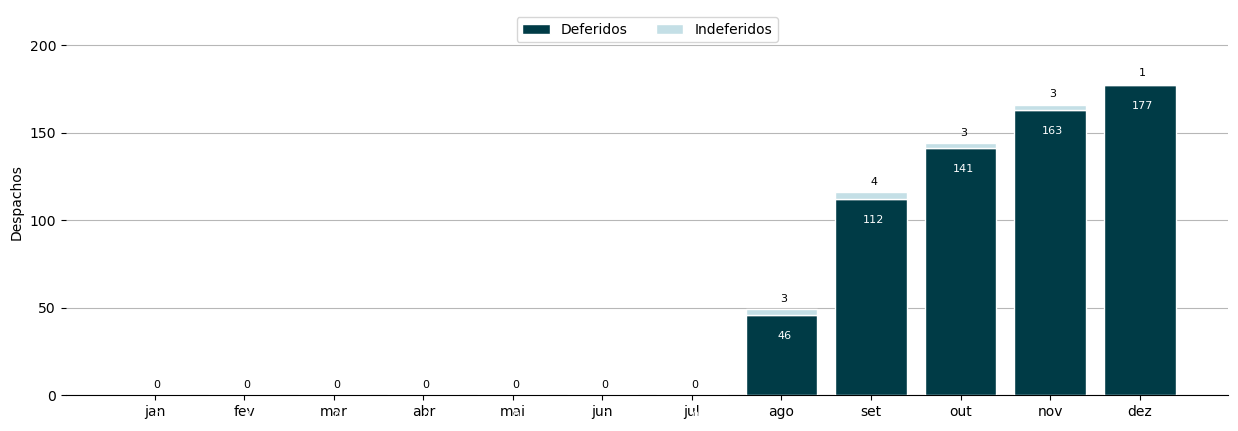

In [162]:
def graph_ad_comparativo(coord, dados):
    green_pallete = ['#c4dfe6', '#003b46']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=green_pallete[1],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=green_pallete[0], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 12
        ajuste_indef = -6
        #if i == 11:
            #ajuste_indef = 4
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 200  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 50))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_test/img/{coord}_ad_comparativo.png', dpi=300)
    

ad_comparativo = caepp_param['block_placement'].get('bloco_ad_comparativo').get('data')
if ad_comparativo:
    df_ad_comparativo = pd.DataFrame(ad_comparativo, index=lista_meses)
    graph_ad_comparativo('caepp', df_ad_comparativo)

##### Grafico ad comuniqueses

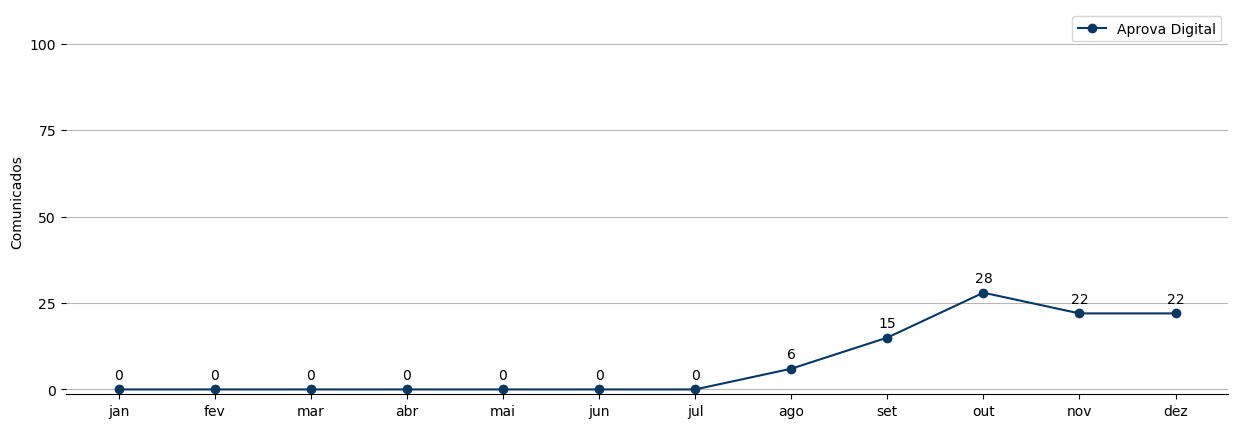

In [163]:
def graph_ad_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#073763', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Comunicados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_ad_comun.png', dpi=300)
    
ad_comun = caepp_param['block_placement'].get('bloco_ad_comuniqueses').get('data')
if ad_comun:
    graph_ad_comun('caepp', ad_comun)

##### Grafico ad Autuados

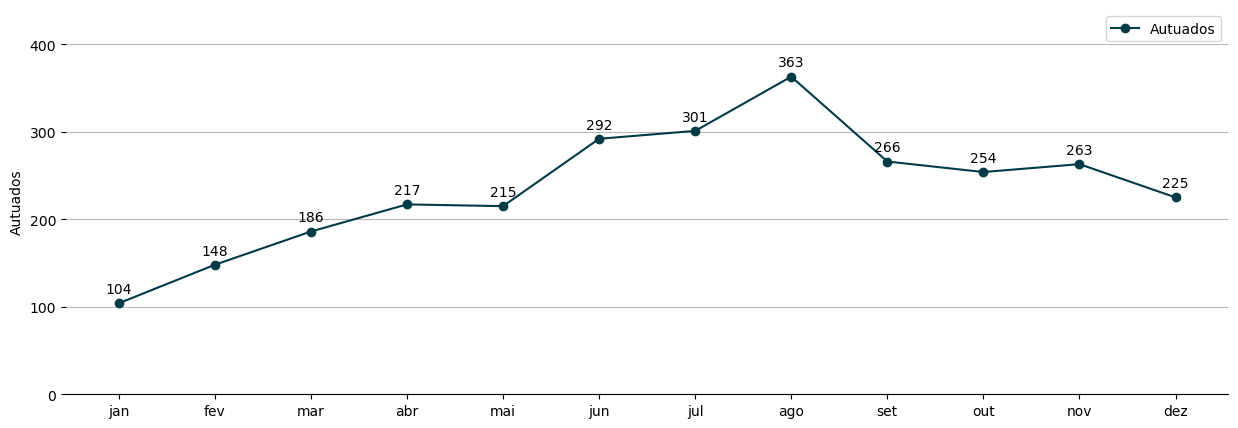

In [164]:
def graph_ad_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4


    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Autuados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 400  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_ad_autuados.png', dpi=300)

ad_aut = caepp_param['block_placement'].get('bloco_ad_autuacoes').get('data')
if ad_aut:
    graph_ad_aut('caepp', ad_aut)

#### SisSEL

##### Grafico sissel comaprativo

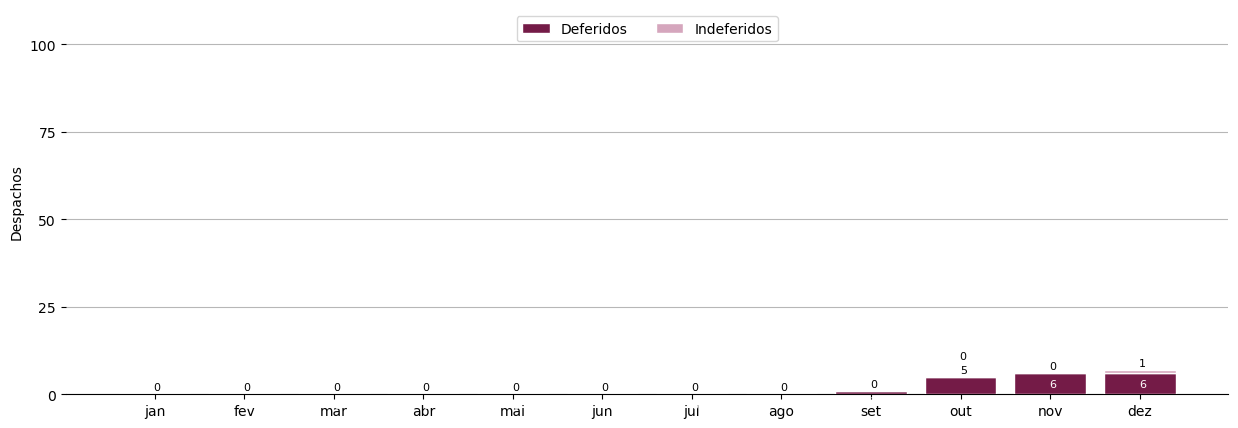

In [165]:
def graph_sissel_comparativo(coord, dados):
    pink_pallete = ['#741b47', '#d5a6bd']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=pink_pallete[0],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=pink_pallete[1], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 3
        ajuste_indef = -2
        color_def = 'white'
        color_indef = 'black'
        if i == 9:
            color_def = 'black'
            ajuste_def = -2
            ajuste_indef = -6
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color=color_def)
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color=color_indef)


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_test/img/{coord}_sissel_comparativo.png', dpi=300)

dados = caepp_param['block_placement'].get('bloco_sissel_comparativo').get('data')
if dados:
    df_dados = pd.DataFrame(dados, index=lista_meses)
    graph_sissel_comparativo('caepp', df_dados)

##### Grafico sissel comuniqueses

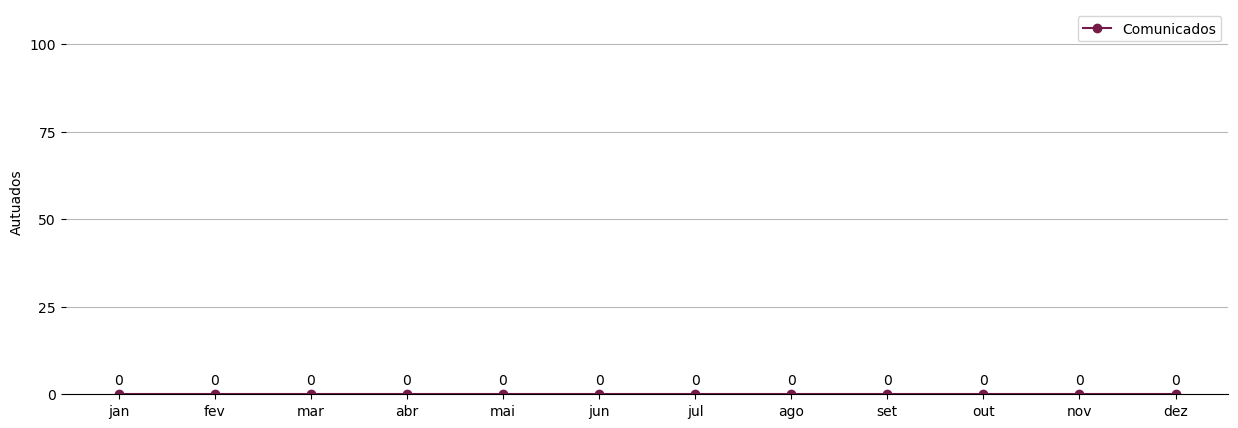

In [166]:
def graph_sissel_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4


    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#741b47', label='Comunicados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 100  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 25))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_sissel_comun.png', dpi=300)
    
dados_com = caepp_param['block_placement'].get('bloco_sissel_comuniqueses').get('data')
if dados_com:
    graph_sissel_comun('caepp', dados_com)

##### grafico sissel autuados

#### SLCe

##### Gráfico slce comparativo

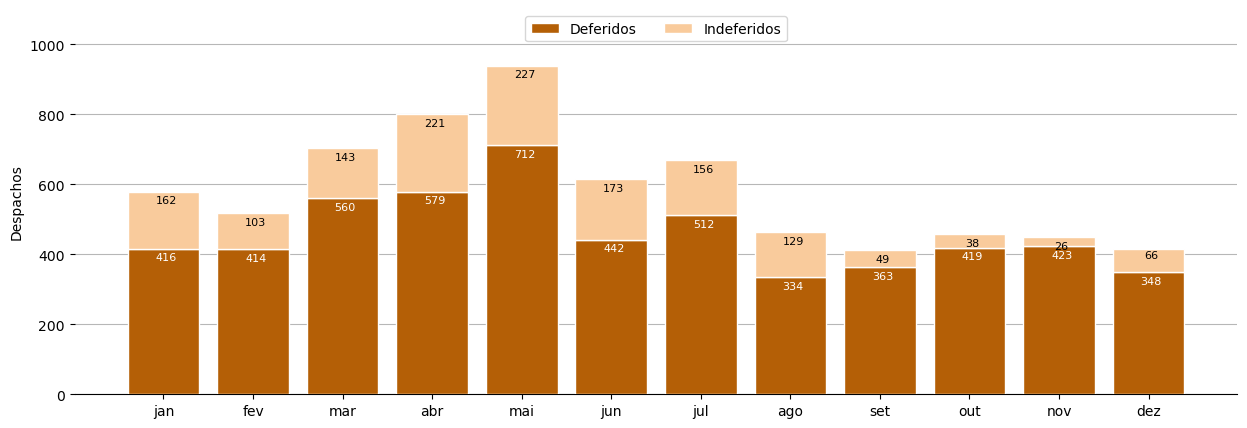

In [167]:
def graph_slce_comparativo(coord, dados):
    green_pallete = ['#b45f06', '#f9cb9c']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=green_pallete[0],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=green_pallete[1], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 25
        ajuste_indef = 25
        if i == 11:
            ajuste_indef = 18
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 1000  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 200))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_test/img/{coord}_slce_comparativo.png', dpi=300)
    

slce_comparativo = caepp_param['block_placement'].get('bloco_slce_comparativo').get('data')
if slce_comparativo:
    df_slce_comparativo = pd.DataFrame(slce_comparativo, index=lista_meses)
    graph_slce_comparativo('caepp', df_slce_comparativo)

##### Grafico slce comuniqueses

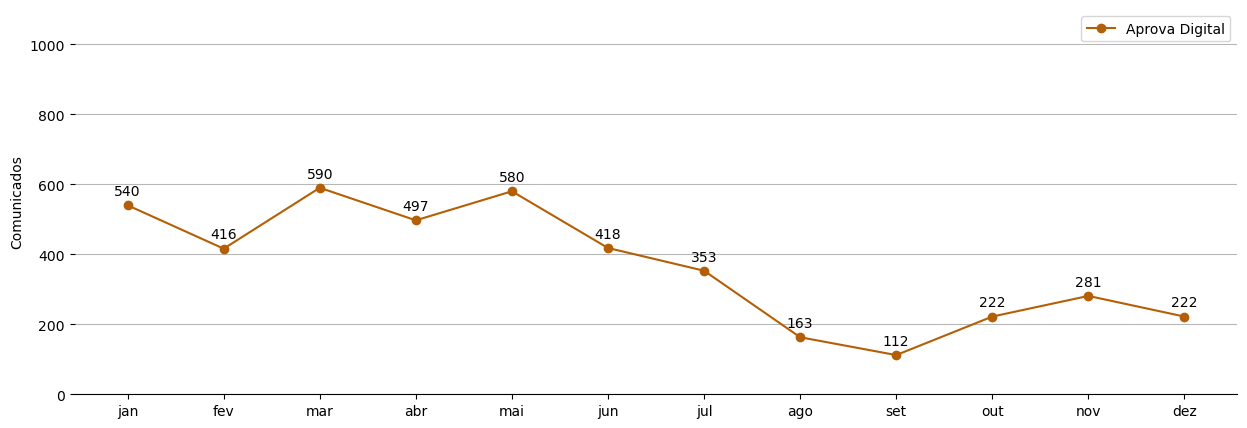

In [168]:
def graph_slce_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#b45f06', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Comunicados')

    # Ajustar margem superior maior
    desired_top_limit = 1000  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 200))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_slce_comun.png', dpi=300)
    
slce_comun = caepp_param['block_placement'].get('bloco_slce_comuniqueses').get('data')
if slce_comun:
    graph_slce_comun('caepp', slce_comun)

##### Grafico slce Autuados

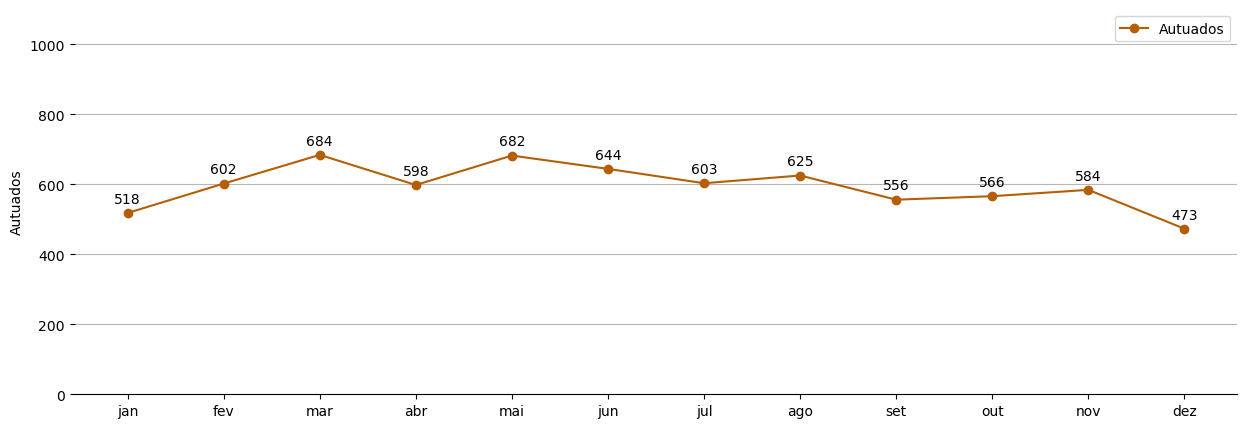

In [169]:
def graph_slce_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4


    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#b45f06', label='Autuados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 1000  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 200))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_slce_autuados.png', dpi=300)

slce_aut = caepp_param['block_placement'].get('bloco_slce_autuacoes').get('data')
if slce_aut:
    graph_slce_aut('caepp', slce_aut)

### Portal

#### Portal do Licenciamento

##### Gráfico AD comparativo

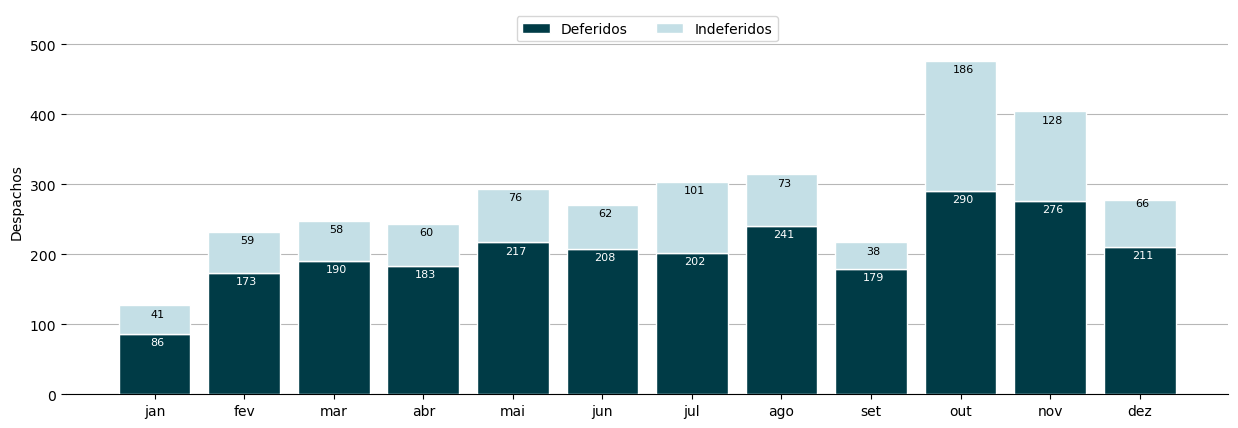

In [170]:
def graph_portal_comparativo(coord, dados):
    green_pallete = ['#c4dfe6', '#003b46']

    categories = list(dados.index)


    # Configurar a largura das barras agrupadas
    bar_width = 0.4

    # Configurar a posição das barras agrupadas
    r = [x - bar_width/2 for x in range(len(categories))]


    fig, ax = plt.subplots(figsize=(15,5))

    # Criar o gráfico de barras agrupadas
    bar_def = plt.bar(r, dados['Deferidos'], color=green_pallete[1],  edgecolor='white', label='Deferidos', zorder=3)
    bar_indef = plt.bar(r, dados['Indeferidos'], color=green_pallete[0], bottom=dados['Deferidos'],  edgecolor='white', label='Indeferidos', zorder=3)

    #linha
    #total_line = plt.plot(dados['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

    for i, (valor_def, valor_indef) in enumerate(zip(dados['Deferidos'], dados['Indeferidos'])):
        ajuste_def = 12
        ajuste_indef = 12
        if i == 11:
            ajuste_indef = 4
        plt.text(i - 0.17, valor_def - ajuste_def, f'{valor_def}', ha='center', va='center', fontsize=8, color='white')
        plt.text(i - 0.17, valor_def + valor_indef - ajuste_indef, f'{valor_indef}', ha='center', va='center', fontsize=8, color='black')


    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    #plt.xticks([r + bar_width for r in range(len(categories))], categories)
    plt.xticks(r, categories)
    plt.ylabel('Despachos')

    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Ajustar margem superior maior
    desired_top_limit = 500  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Legenda customizada
    plt.legend(handles=[bar_def, bar_indef], loc='upper center', ncol=3) # total_line[0]   

    plt.savefig(f'pdf_test/img/{coord}_portal_comparativo.png', dpi=300)
    

portal_comparativo = gtec_param['block_placement'].get('bloco_portal_comparativo').get('data')
if portal_comparativo:
    df_portal_comparativo = pd.DataFrame(portal_comparativo, index=lista_meses)
    graph_portal_comparativo('gtec', df_portal_comparativo)

##### Grafico ad comuniqueses

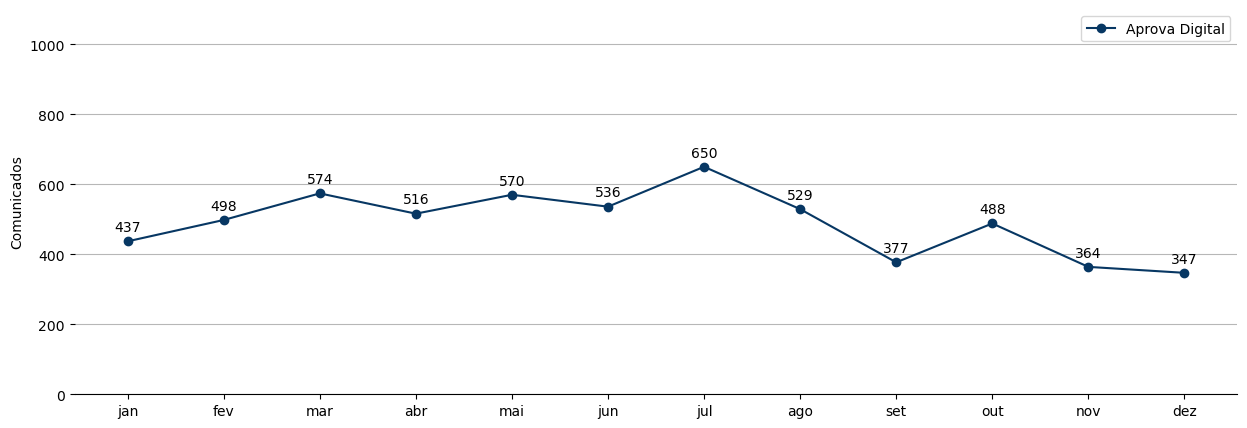

In [171]:
def graph_portal_comun(coord, dados_com):
    dados = dados_com.values()
    meses = dados_com.keys()
    
    categories = meses
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#073763', label='Aprova Digital')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Comunicados')

    # Ajustar margem superior maior
    desired_top_limit = 1000  # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 200))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_portal_comun.png', dpi=300)
    
portal_comun = gtec_param['block_placement'].get('bloco_portal_comuniqueses').get('data')
if portal_comun:
    graph_portal_comun('gtec', portal_comun)

##### Grafico ad Autuados

{'jan': 876,
 'fev': 1055,
 'mar': 1322,
 'abr': 1156,
 'mai': 1336,
 'jun': 1365,
 'jul': 1299,
 'ago': 1519,
 'set': 1286,
 'out': 1485,
 'nov': 1786,
 'dez': 4149}

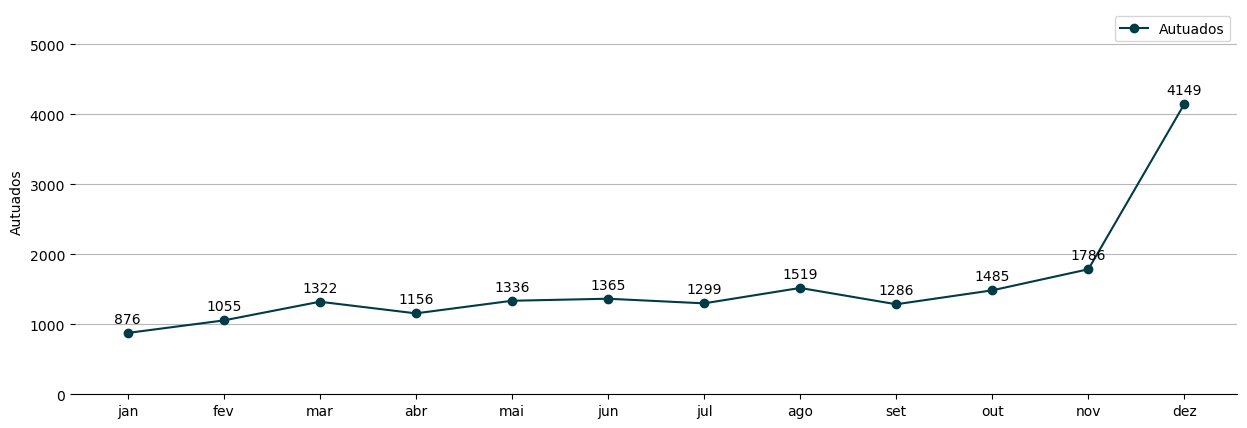

In [172]:
def graph_portal_aut(coord, dados_aut):
    dados = dados_aut.values()
    meses = dados_aut.keys()
    
    categories = meses
    bar_width = 0.4


    fig, ax = plt.subplots(figsize=(15,5))
    # Criar um gráfico de linha
    plt.plot(meses, list(dados), marker='o', linestyle='-', color='#003b46', label='Autuados')

    # Adicionar rótulos
    plt.ylabel('Valores')

    # Personalizar o gráfico
    plt.grid(color='#b7b7b7', axis='y', zorder=0)
    plt.xticks([r + ((bar_width / 2) - 0.2) for r in range(len(categories))], categories)
    plt.ylabel('Autuados')

    # Ajustar margem superior maior
    desired_top_limit = 5000 # Defina o limite superior desejado
    ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 1000))  # Configurar marcadores no eixo Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

    # Adicionar marcadores numéricos acima dos pontos
    for mes, valor in zip(meses, dados):
        plt.annotate(str(valor), xy=(mes, valor), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


    # Remover bordas
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')

    # Adicionar uma legenda
    plt.legend()

    plt.savefig(f'pdf_test/img/{coord}_portal_autuados.png', dpi=300)

portal_aut = gtec_param['block_placement'].get('bloco_portal_autuacoes').get('data')
if portal_aut:
    graph_portal_aut('gtec', portal_aut)
portal_aut

## des

##### Modelo 2

In [173]:
#Teste grafico 2
desp_ad = get_ad_last_12_despachos('CAEPP')['despachos']
desp_ss = get_sissel_last_12_despachos('CAEPP')['despachos']
desp_sl = get_slce_last_12_despachos()['despachos_12']

dados = {'Aprova Digital': list(desp_ad), 'SisSEL': list(desp_ss), 'SLCe': list(desp_sl)}

desp_ad.index

KeyError: 'despachos_12'

In [ ]:
meses = [dict_mes_abrev[i.month] for i in desp_ad.index]
meses

In [ ]:
desp_ad = get_ad_last_12_despachos('CAEPP')['despachos']
desp_ss = get_sissel_last_12_despachos('CAEPP')['despachos']

# Criar um DataFrame a partir das Series
df = pd.concat([desp_ss, desp_ad], axis=1)
df.columns = ['SisSEL', 'Aprova Digital']
df.index = [dict_mes_abrev[i.month] for i in df.index]
df['Total'] = df['SisSEL'] + df['Aprova Digital']
df

In [ ]:
categories = list(df.index)

# Configurar as cores para cada série
blue_pallete3 = ['#9fc5e8', '#3d85c6', '#073763']
green_pallete2 = ['#66a5ad', '#003b46']

# Configurar a largura das barras agrupadas
bar_width = 0.4

# Configurar a posição das barras agrupadas
r1 = range(len(categories))
r2 = [x + bar_width for x in r1]

fig, ax = plt.subplots(figsize=(15,5))

# Criar o gráfico de barras agrupadas
bar1 = plt.bar(r1, df['SisSEL'], color=green_pallete2[0], width=bar_width, edgecolor='white', label='SisSEL', zorder=3)
bar3 = plt.bar(r2, df['Aprova Digital'], color=green_pallete2[1], width=bar_width, edgecolor='white', label='Aprova Digital', zorder=3)

#linha
#total_line = plt.plot(df['Total'], color='#000000', linewidth=1, zorder=3, label='Total')

for bar in bar1 + bar3:
    yval = bar.get_height() + 10
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=8)

# Personalizar o gráfico
plt.grid(color='#b7b7b7', axis='y', zorder=0)
plt.xticks([r + bar_width for r in range(len(categories))], categories)
plt.ylabel('Despachos')

# Remover bordas
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')

# Ajustar margem superior maior
desired_top_limit = 400  # Defina o limite superior desejado
ax.yaxis.set_ticks(range(0, desired_top_limit + 1, 100))  # Configurar marcadores no eixo Y
ax.set_ylim(top=ax.get_ylim()[1] * 1.1) 

# Legenda customizada
plt.legend(handles=[bar1, bar3], loc='upper center', ncol=3) # total_line[0]


plt.savefig('pdf_test/CAEPP_5.png', dpi=300)

##### MODELO 1

In [ ]:
# Gráfico despachos deferidos e indeferidos x fontes
ad = get_ad_despachos('CAEPP')['despachos_mes_referencia']
ss = get_sissel_despachos('CAEPP')['despachos_mes_referencia']
sl = get_slce_despachos()['despachos_mes_referencia']

dados = [ad, ss, sl]  # Valores que serão considerados para formar os wedges do gráfico
total = np.sum(dados)  # Total para calcula de porcentagem na mão

sistemas = ['AD', 'SisSEL', 'SLCe']  # Sistemas integrantes do gráfico

labels = [f'{i} - {round(dados[n] * 100 / total, 1)}%' for n, i in enumerate(sistemas)]  #
blue_pallete3 = ['#073763', '#9fc5e8', '#3d85c6']
green_pallete3 = ['#d8f3fa', '#66a5ad', '#003b46']

labels

In [ ]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{absolute}"

fig, ax = plt.subplots(figsize=(7,3)) 
wedges, texts, autotexts = ax.pie(dados, 
                                  colors=green_pallete3,
                                  autopct=lambda pct: func(pct, dados), 
                                  startangle=120, 
                                  pctdistance=0.75, 
                                  wedgeprops=dict(width=0.45, edgecolor='w'))

for n, autotext in enumerate(autotexts):
    autotext.set_color(label_color('bbw')[n]) 

kw = dict(arrowprops=dict(arrowstyle="-"))

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.3*y), horizontalalignment=horizontalalignment, **kw)
    
plt.savefig('pdf_test/img/CAEPP_ad_fontes.png', dpi=300)

In [ ]:
"""
fig, ax = plt.subplots(figsize=(15,5))
plt.savefig('pdf_test/img/CAEPP_main_comparativo.png', dpi=300)
plt.savefig('pdf_test/img/CAEPP_main_comparativo_comun.png', dpi=300)
plt.savefig('pdf_test/img/CAEPP_main_comun.png', dpi=300)
plt.savefig('pdf_test/img/CAEPP_main_autuacoes.png', dpi=300)
plt.savefig('pdf_test/img/CAEPP_ad_comparativo.png', dpi=300)
plt.savefig('pdf_test/img/CAEPP_ad_comun.png', dpi=300)
plt.savefig('pdf_test/img/CAEPP_ad_autuacoes.png', dpi=300)
plt.savefig('pdf_test/img/CAEPP_sissel_comparativo.png', dpi=300)
plt.savefig('pdf_test/img/CAEPP_sissel_comun.png', dpi=300)
plt.savefig('pdf_test/img/CAEPP_sissel_autuacoes.png', dpi=300)
"""

In [ ]:
"""
fig, ax = plt.subplots(figsize=(7,3)) 
plt.savefig('pdf_test/img/CAEPP_main_fontes.png', dpi=300)
plt.savefig('pdf_test/img/CAEPP_ad_fontes.png', dpi=300)
plt.savefig('pdf_test/img/CAEPP_sissel_fontes.png', dpi=300)
""""""

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Substitua este dicionário de dados pelos seus dados reais
data = {
    'Mês': ['dez', 'jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov'],
    # Adicione seus dados SisSEL aqui
    "SisSEL": [155, 186, 183, 255, 217, 259, 304, 290, 109, 105, 121, 115],
    # Adicione seus dados Aprova Digital aqui
    "Aprova Digital": [41,43 ,34 ,61 ,36 ,54 ,44 ,54 ,59 ,47 ,38, 30]
}

df = pd.DataFrame(data)

# Plotando o gráfico de barras com barras agrupadas
ax = df.plot(x='Mês',
             kind='bar',
             stacked=False,
             color=['skyblue','darkgreen'])

ax.set_ylabel('Despachos')
ax.set_title('Comparação Mensal de Despachos')

plt.show()